# Préparation de données pour un organisme de santé publique
### Une analyse exploratoire du jeu de données fourni par l'agence Santé publique France. Préparation d'un prototype.





### Objectif

* Rendre les données de santé publique plus accessibles, pour qu’elles soient utilisables par les agents de *Santé publique France*.

* Réaliser une exploration et visualisation des données, afin que les agents puissent ensuite s’appuyer sur nos résultats.



### Sommaire

1. Visualisation initiale du jeu de données.
2. Analyse du dataset. Collecte d'informations. Cleaning.
3. Analyses statistiques.
4. Prototype.

## 1. Affichage du jeu de données

In [74]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Fonction qui retourne les modalités d'une variable
def visualize_modal (df, ft) :
        effectifs = df[ft].value_counts()
        modalites = effectifs.index

        # création du tableau à partir des modalités
        tab = pd.DataFrame(modalites, columns = [ft])
        tab["n"] = effectifs.values
        tab["f"] = tab["n"] / len(df)
        return tab

    
# Visualisation de Nutri-Scores avec les boîtes à moustaches
def nutriscore_by_nutriment_boxplot(dataframe, cat_column, num_column, order_values) :
    nb_cols = 3
    nb_lines = int(np.ceil(len(num_column) / nb_cols))


    fig, axes = plt.subplots(nb_lines, nb_cols, figsize=(16,16))
    fig.suptitle('Distribution de variables par Nutri-Score', fontsize=24)

    for i, col in enumerate(num_column):
        plt.axhline(y=0, color='b', linestyle='-', linewidth='1')
        sns.boxplot(
            data=dataframe,
            x=cat_column, 
            y=col,
            order=order_values,
            showmeans=True,
            showfliers=False,
            ax=axes[int(np.floor(i / nb_cols)), i % nb_cols],
        )
    plt.show()

    
# Fonction permettant de visualiser les variables numériques
def value_dispersion (df, ft1, ft2) :
    plt.figure(figsize=(5,5))
    plt.style.use("bmh")
    plt.scatter(x=df[ft1],y=df[ft2],c='Green', alpha=0.5)
    plt.title(f"Dispersion de variables '{ft1}' vs '{ft2}'", fontsize=12)
    plt.xlabel(ft1)
    plt.ylabel(ft2)

### 1.1 Visualisation initiale du jeu de données.

In [75]:
df=pd.read_csv('openfoodfacts_products.csv', delimiter="\t")
df.head()

/home/sylwia/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

In [76]:
df.shape

(320772, 162)

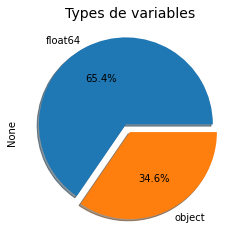

In [77]:
explode=[0.1,0]
df.dtypes.value_counts().plot.pie(explode=explode,shadow=True,autopct='%1.1f%%')
plt.title("Types de variables", fontsize=14)
plt.show()

### 1.2 Distinction de données qualitatives et quantitatives.

**Classification de variables du dataset selon le type de données :**

In [78]:
data=df.copy()

In [79]:
# Liste des variables de type quantitatif
var_quantitative = data.select_dtypes(include=np.number).columns.tolist()
print("Voici les colonnes contenant les variables numériques : ",'\n\n',var_quantitative,'\n\n')

# Liste des variables de type qualitatif
var_qualitative = data.select_dtypes(exclude=np.number).columns.tolist()
print("Voici les colonnes contenant les variables catégorielles : ",'\n\n',var_qualitative,'\n')

Voici les colonnes contenant les variables numériques :  

 ['no_nutriments', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-a

### 1.3 Estimation du taux de données manquantes.

In [80]:
data.isna().sum().sum()

39608589

In [81]:
taux_nan=data.isna().sum()*100/data.shape[0]
round(taux_nan.sort_values(),2).head(30)

last_modified_t                             0.00
last_modified_datetime                      0.00
creator                                     0.00
created_t                                   0.00
created_datetime                            0.00
code                                        0.01
url                                         0.01
states                                      0.01
states_tags                                 0.01
states_fr                                   0.01
countries_fr                                0.09
countries                                   0.09
countries_tags                              0.09
product_name                                5.54
brands                                      8.86
brands_tags                                 8.86
energy_100g                                18.60
proteins_100g                              18.97
salt_100g                                  20.35
sodium_100g                                20.36
ingredients_text    

Essayons de visualiser les valeurs de type NaN :

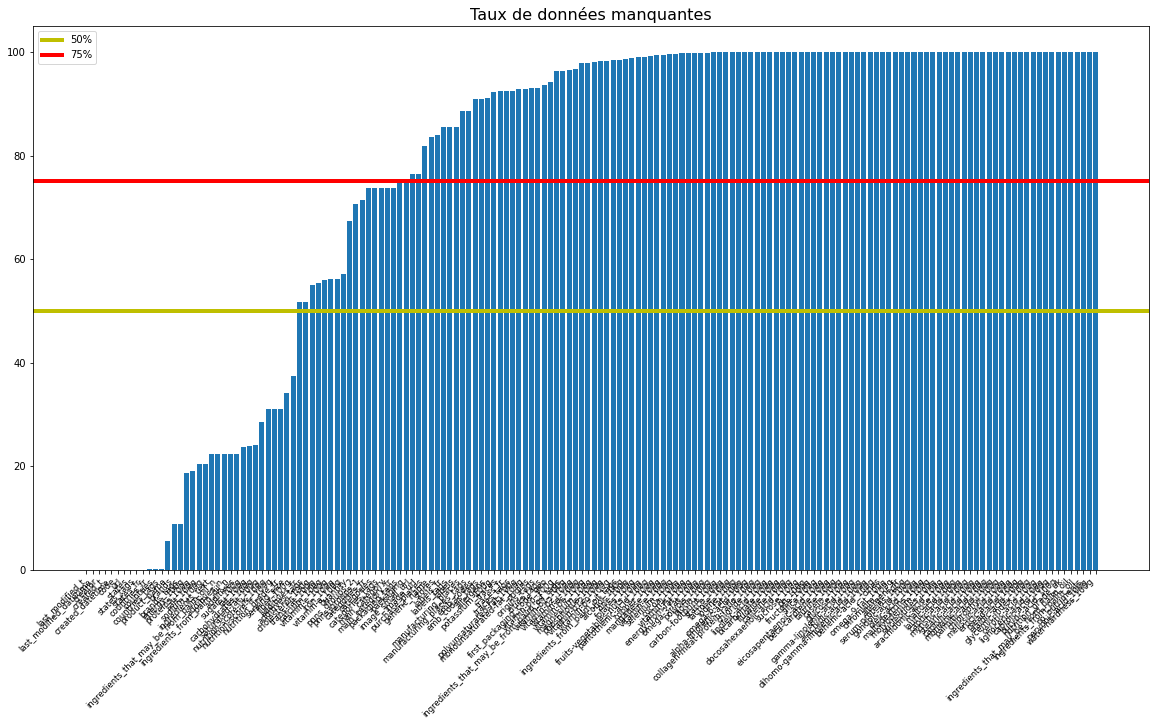

In [82]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation=45, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='small')

plt.bar(x=taux_nan.sort_values().index,
       height=taux_nan.sort_values().values)

plt.axhline(y=50, color='y', linestyle='-', linewidth='4', label='50%')
plt.axhline(y=75, color='r', linestyle='-', linewidth='4', label='75%')
plt.title("Taux de données manquantes", fontsize=16)
plt.legend()
plt.show()

Nous voyons que le taux de données manquantes est très elévé - la ligne jaune des 50% est largement dépassée. Nous allons garder pour notre analyse uniquement avec les features qui contiennent au moins 50% de valeurs remplies.


Mettons en place une fonction permettant d'identifier les variables avec plus de 50% de NaN. Par la suite, nous allons passer en revue les variables du dataset : d'abord les numériques, ensuite les catégorielles.

In [83]:
#col_type=data.select_dtypes(include=np.number).isna().sum()/data.shape[0]


def identify_col_nan(col_type, x) :

    # Identification de variables avec plus de 50% de NaN
    col_nan=col_type>0.5
    nb=col_type[col_nan].count()
    print("\nAu total",nb,f"variables {x} sont à supprimer.\n")
    #print("Ci-dessous les variables avec un taux de NaN supérieur à 0.5:\n\n",col_type[col_nan],"\n")
    
    
    fig=plt.figure(figsize=(25,10))
    plt.xticks(rotation=45, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='small')

    plt.bar(x=col_type[col_nan].sort_values().index,
            height=col_type[col_nan].sort_values().values,
            color="salmon")

    plt.xlabel('Taux de Nan')
    plt.ylabel(f'Variables {x} numériques')
    plt.title(f'Les variables {x} à supprimer')
    plt.show()

#### 1.3.1 Variables numériques.

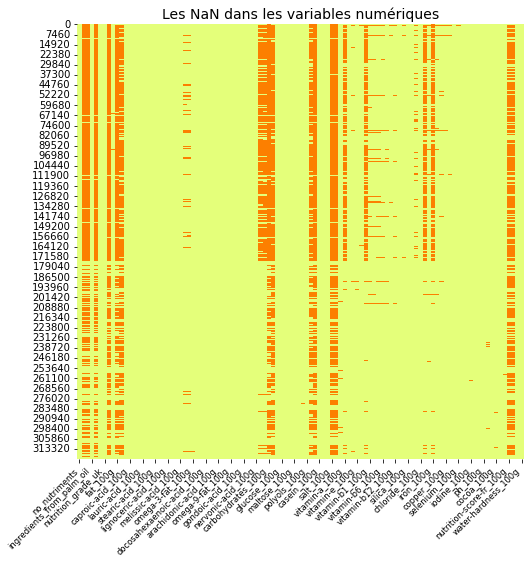

In [84]:
#Visualisation globale des NaN à l'aide d'une heatmap
plt.figure(figsize=(8,8))
sns.heatmap(data.select_dtypes(include=np.number).isna(),
            #square=True, # make cells square
            #cbar_kws={'fraction' : 0.01}, # shrink colour bar
            cmap='Wistia_r',
            #linewidth=1, # space between cells
            cbar=False)
plt.xticks(rotation=45, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='small')
plt.title("Les NaN dans les variables numériques", fontsize=14)
plt.show()

**Identification de variables numériques à plus de 50% de NaN**


Au total 92 variables numériques sont à supprimer.



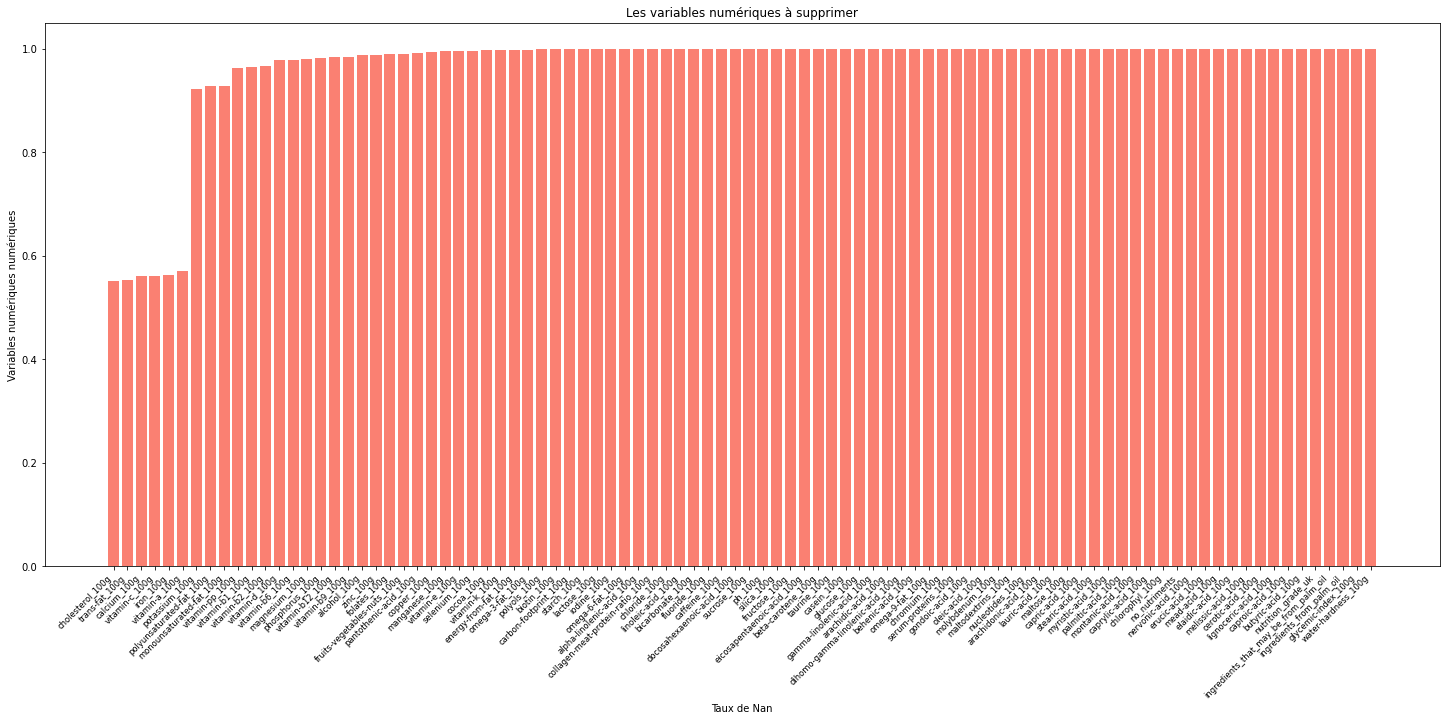

In [85]:
col_type=data.select_dtypes(include=np.number).isna().sum()/data.shape[0]
x="numériques"
identify_col_nan(col_type,x)

#### 1.3.2 Variables catégorielles.

**Visualisation globale des NaN**

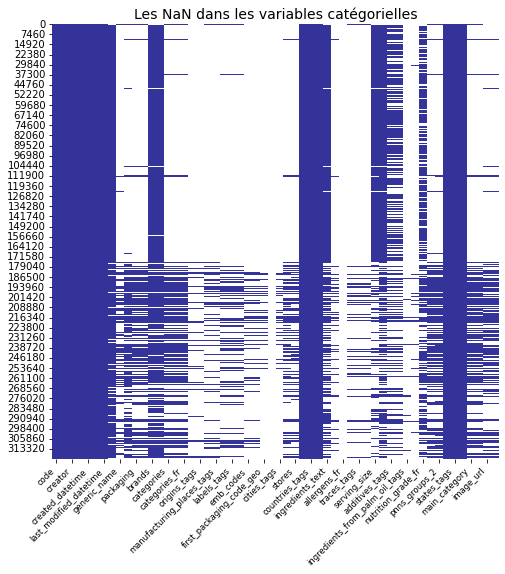

In [86]:
plt.figure(figsize=(8,8))
sns.heatmap(data.select_dtypes(exclude=np.number).isna(),
            #square=True, # make cells square
            #cbar_kws={'fraction' : 0.01}, # shrink colour bar
            cmap='terrain', # use orange/red colour map
            #linewidth=1, # space between cells
            cbar=False)
plt.xticks(rotation=45, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='small')
plt.title("Les NaN dans les variables catégorielles", fontsize=14)
plt.show()

**Identification de variables catégorielles à plus de 50% de NaN**


Au total 36 variables catégorielles sont à supprimer.



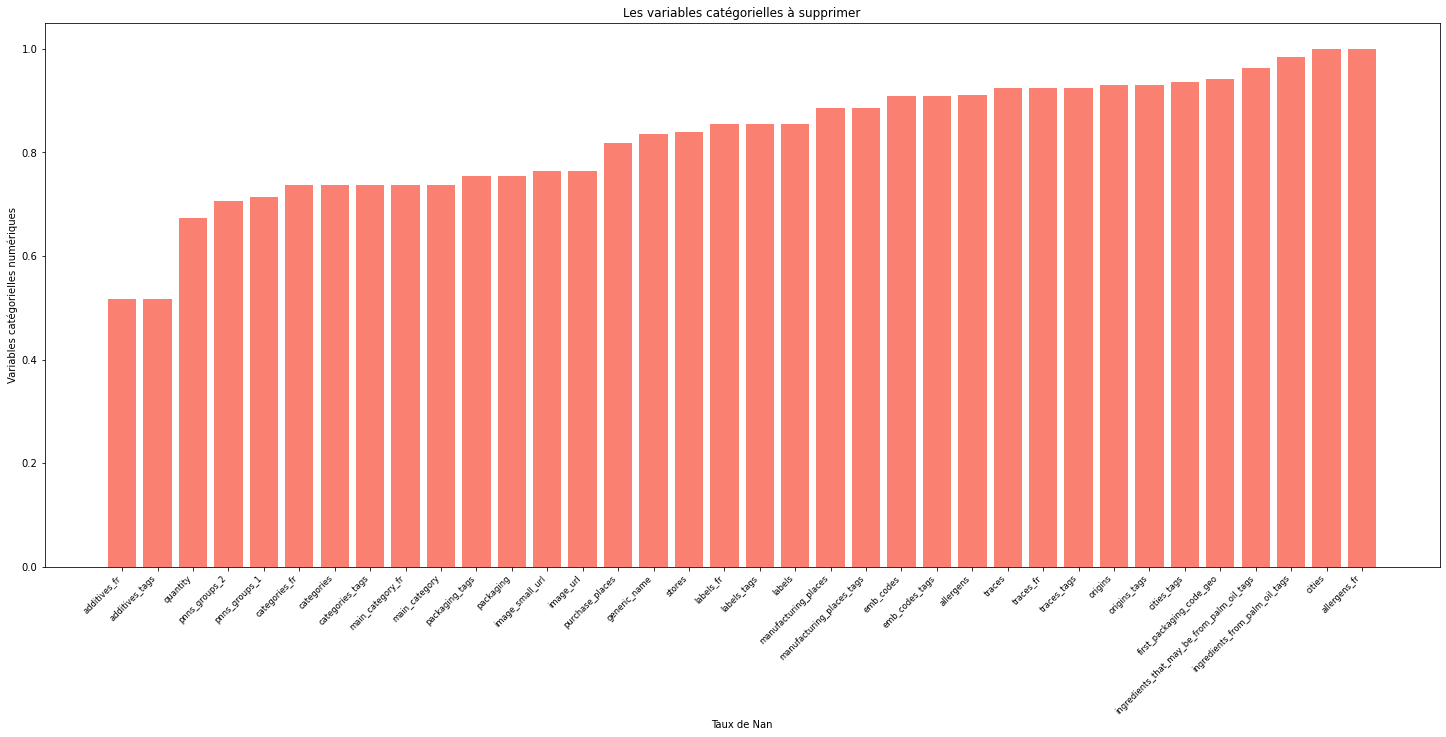

In [87]:
# Identification de variables avec plus de 50% de NaN
col_type=data.select_dtypes(exclude=np.number).isna().sum()/data.shape[0]
x="catégorielles"
identify_col_nan(col_type,x)

## 2. Filtrage du dataset.

Cette partie de l'analyse a pour objectif d'identifier les variables indispensables pour les analyses à venir, et par conséquent se séparer de celles peu pertinentes.

### 2.1 Suppression de variables peu renseignées.

Un grand nombre de variables vides rend un dataset inexploitable. Nous allons donc enlever les features identifiées plus haut :

In [88]:
def delete_col_nan(col_type) :
        col_nan=col_type>0.5
        col_nb=col_nan.count()
        col_to_delete=col_type[col_nan].index.to_list()
        data.drop(col_to_delete, inplace=True, axis=1)
        print("Liste de variables à supprimer :\n\n",col_to_delete)
        print("\nProcessing...\n")
        print(col_nb, "variables viennent d'être supprimées.")

In [89]:
col_type=data.isna().sum()/data.shape[0]
delete_col_nan(col_type)

Liste de variables à supprimer :

 ['generic_name', 'quantity', 'packaging', 'packaging_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'no_nutriments', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'energy-from-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_1

In [90]:
data.shape

(320772, 34)

### 2.2 Identification de doublons.

Attention, au vu de la nomenclature de certaines variables et en analysant le ([document annexe](https://static.openfoodfacts.org/data/data-fields.txt)), nous constatons que certaines features représentent la même donnée :

- 'countries',
- 'countries_tags',
- 'countries_fr',


- 'created_t',
- 'created_datetime',
- 'last_modified_t',
- 'last_modified_datetime',


- 'states'
- 'states_tags'
- 'states_fr'
 

- 'brands',
- 'brands_tags'

Nous allons garder uniquement les variables "propres" et avec le moindre taux de NaN.

In [91]:
def show_content(col_name):
        for i in col_name :
            result=i.unique()
            print("\n\n", result)

In [92]:
col_name=[
    data['countries'],
    data['countries_tags'],
    data['countries_fr'],

    data['created_t'],
    data['created_datetime'],
    data['last_modified_t'],
    data['last_modified_datetime'],

    data['states'],
    data['states_tags'],
    data['states_fr'],

    data['brands'],
    data['brands_tags'],
    
    data['nutrition-score-fr_100g'],
    data['nutrition-score-uk_100g']
]
show_content(col_name)



 ['en:FR' 'US' 'France' ... 'Malaisie' 'en:HK, en:france' 'Hong Kong,China']


 ['en:france' 'en:united-states' 'en:united-kingdom'
 'en:france,en:united-states' 'en:canada' 'en:switzerland' 'en:spain'
 'en:germany' 'en:slovenia' 'en:italy' 'en:romania' 'en:australia'
 'en:portugal' 'en:france,en:united-kingdom'
 'en:belgium,en:france,en:netherlands,en:united-kingdom' 'en:guadeloupe'
 nan 'en:united-kingdom,en:united-states' 'en:canada,en:united-states'
 'en:netherlands' 'en:australia,en:france'
 'en:canada,en:france,en:switzerland,en:united-states'
 'en:france,en:united-states,en:etats-unis' 'en:ireland'
 'en:france,en:reunion' 'en:taiwan' 'en:australia,en:switzerland'
 'en:france,en:germany' 'en:brazil' 'en:belgium,en:france'
 'en:dominican-republic' 'en:united-states,en:australie' 'en:saudi-arabia'
 'en:united-arab-emirates' 'en:iraq' 'en:kuwait' 'en:moldova' 'en:belgium'
 'en:new-caledonia' 'en:singapore' 'en:finland'
 'en:australia,en:united-states' 'en:france,en:switzerland'
 '



 ['2016-09-17T09:17:46Z' '2017-03-09T14:32:37Z' '2017-03-09T10:35:31Z' ...
 '2017-03-27T16:14:59Z' '2015-01-24T11:36:17Z' '2017-04-16T10:54:49Z']


 [1474103893 1489069957 1489055731 ... 1491244498 1491244499 1492340089]


 ['2016-09-17T09:18:13Z' '2017-03-09T14:32:37Z' '2017-03-09T10:35:31Z' ...
 '2017-04-03T18:34:58Z' '2017-04-03T18:34:59Z' '2017-04-16T10:54:49Z']


 ['en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded'
 'en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-

**Suppression de doublons**

In [93]:
data.drop([
    "countries","countries_tags",
    "last_modified_t","created_t",
    "states","states_tags",
    "brands_tags",
    "nutrition-score-uk_100g"], inplace=True, axis=1)

In [94]:
data.shape

(320772, 26)

**Sauvegarde du dataset**

In [95]:
data_spf=data.copy()

### 2.3 Sélection de variables indispensables pour l'analyse exploratoire

Après réflexion, pour les futures analyses nous allons garder principalement les données liées au calcul du Nutri Score ([cf l'attribution du Nutri Score](https://www.santepubliquefrance.fr/determinants-de-sante/nutrition-et-activite-physique/articles/nutri-score)) :

In [96]:
# Récapitualif de variables à garder :

# Infos générales :
'code', 'url', 'product_name', 'main_category', 'last_modified_datetime',
# Additifs :
'additives','additives_n',
# Nutri-Score
'nutrition_grade_fr', 'nutrition-score-fr_100g',
# Nutriments à limiter :
'energy_100g', 'fat_100', 'saturated-fat_100g', 
'carbohydrates_100g', 
'sugars_100g', 'salt_100g','sodium_100g',
# Nutriments à favoriser :
'fruits-vegetables-nuts_100g', 'fiber_100g', 'proteins_100g'



#Suppression d'autres colonnes inutiles :
useless_cols = [
    "creator","created_datetime","ingredients_text","serving_size","states_fr","countries_fr",
    'ingredients_that_may_be_from_palm_oil_n','ingredients_from_palm_oil_n'
]
data_spf.drop(useless_cols, inplace=True, axis=1)

# Vérification de la volumétrie
data_spf.info()

#Affichage du jeu de données
data_spf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     320749 non-null  object 
 1   url                      320749 non-null  object 
 2   last_modified_datetime   320772 non-null  object 
 3   product_name             303010 non-null  object 
 4   brands                   292360 non-null  object 
 5   additives_n              248939 non-null  float64
 6   additives                248905 non-null  object 
 7   nutrition_grade_fr       221210 non-null  object 
 8   energy_100g              261113 non-null  float64
 9   fat_100g                 243891 non-null  float64
 10  saturated-fat_100g       229554 non-null  float64
 11  carbohydrates_100g       243588 non-null  float64
 12  sugars_100g              244971 non-null  float64
 13  fiber_100g               200886 non-null  float64
 14  prot

code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

  last_modified_datetime                    product_name           brands  \
0   2016-09-17T09:18:13Z              Farine de blé noir  Ferme t'y R'nao   
1   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)              NaN   
2   2017-03-09T14:32:37Z                         Peanuts   Torn & Glasser   
3   2017-03-09T10:35:31Z          Organic Salted Nut Mix        Grizzlies   
4   2017-03-09T10:34:13Z                 Organic Polenta   Bob's Red Mill   

   additives_n                                          additives  \
0          NaN                                                NaN   
1          0.0   [ bananas -> en:bananas  ]  [ vegetable-oil -...   
2          0.0   [ peanuts -> en:peanuts  ]  [ wheat-flour -> ...   
3          0.0   [ organic-hazelnuts -> en:organic-hazelnuts  ...   
4          0.0   [ organic-polenta -> en:organic-polenta  ]  [...   

  nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                NaN          NaN       NaN                 NaN   
1                  d       2243.0     28.57               28.57   
2                  b       1941.0     17.86                0.00   
3                  d       2540.0     57.14                5.36   
4                NaN       1552.0      1.43                 NaN   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                 NaN          NaN         NaN            NaN        NaN   
1               64.29        14.29         3.6           3.57    0.00000   
2               60.71        17.86         7.1          17.86    0.63500   
3               17.86         3.57         7.1          17.86    1.22428   
4               77.14          NaN         5.7           8.57        NaN   

   sodium_100g  nutrition-score-fr_100g  
0          NaN                      NaN  
1        0.000                     14.0  
2        0.250                      0.0  
3        0.482                     12.0  
4          NaN                      NaN

Il serait également intéressant de garder les informations sur les types de produits. Nous allons rajouter les variables `pnns_groups_1` et `pnns_groups_2` qui fournissent l'information sur les catégories ainsi que les sous-catégories de produits :

In [97]:
data_spf['cat_1'] = df['pnns_groups_1']
data_spf['cat_2'] = df['pnns_groups_2']

In [98]:
data_spf.cat_1.unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [99]:
data_spf.cat_2.unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes', 'Bread',
       'Legumes', 'Pizza pies and quiche', 'Meat', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'vegetables', 'Soups',
       'Chocolate products', 'Alcoholic beverages', 'Fruits', 'Sandwich',
       'Cereals', 'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers',
       'Nuts', 'Breakfast cereals', 'Artificially sweetened beverages',
       'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts',
       'Fruit nectars', 'pastries', 'Tripe dishes', 'fruits',
       'Salty and fatty products', 'cereals', 'legumes', 'nuts'],
      dtype=object)

L'affichage du contenu de nouvelles features dévoile quelques incohérences nécessitant une passe de nettoyage : 
* suppression des doublons (`Salty snacks` - `salty-snacks`, `Cereals and potatoes` - `cereals-and-potatoes`, `Fruits` - `fruits`)
* suppression de la modalité `unknown` qui risque de fausser les futurs calculs

In [100]:
# Remplacement de la modalité "unknown" par "NaN"
data_spf.loc[:, "cat_1"] = data_spf["cat_1"].replace("unknown", np.nan)
data_spf.loc[:, "cat_2"] = data_spf["cat_2"].replace("unknown", np.nan)

In [101]:
for item in ["cat_1", "cat_2"]:
    data_spf[item] = data_spf[item].transform(lambda x: x.str.replace("-", " ").str.capitalize())

**Vérification des résultats :**

In [102]:
data_spf.cat_1.unique()

array([nan, 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish meat eggs',
       'Beverages', 'Fat and sauces', 'Milk and dairy products',
       'Salty snacks'], dtype=object)

In [103]:
data_spf.cat_2.unique()

array([nan, 'Vegetables', 'Biscuits and cakes', 'Bread', 'Legumes',
       'Pizza pies and quiche', 'Meat', 'Sweets', 'Non sugared beverages',
       'Sweetened beverages', 'Dressings and sauces', 'One dish meals',
       'Soups', 'Chocolate products', 'Alcoholic beverages', 'Fruits',
       'Sandwich', 'Cereals', 'Milk and yogurt', 'Fats', 'Cheese',
       'Appetizers', 'Nuts', 'Breakfast cereals',
       'Artificially sweetened beverages', 'Fruit juices', 'Eggs',
       'Fish and seafood', 'Dried fruits', 'Ice cream', 'Processed meat',
       'Potatoes', 'Dairy desserts', 'Fruit nectars', 'Pastries',
       'Tripe dishes', 'Salty and fatty products'], dtype=object)

In [104]:
data_spf.head(5)

code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

  last_modified_datetime                    product_name           brands  \
0   2016-09-17T09:18:13Z              Farine de blé noir  Ferme t'y R'nao   
1   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)              NaN   
2   2017-03-09T14:32:37Z                         Peanuts   Torn & Glasser   
3   2017-03-09T10:35:31Z          Organic Salted Nut Mix        Grizzlies   
4   2017-03-09T10:34:13Z                 Organic Polenta   Bob's Red Mill   

   additives_n                                          additives  \
0          NaN                                                NaN   
1          0.0   [ bananas -> en:bananas  ]  [ vegetable-oil -...   
2          0.0   [ peanuts -> en:peanuts  ]  [ wheat-flour -> ...   
3          0.0   [ organic-hazelnuts -> en:organic-hazelnuts  ...   
4          0.0   [ organic-polenta -> en:organic-polenta  ]  [...   

  nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                NaN          NaN       NaN                 NaN   
1                  d       2243.0     28.57               28.57   
2                  b       1941.0     17.86                0.00   
3                  d       2540.0     57.14                5.36   
4                NaN       1552.0      1.43                 NaN   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                 NaN          NaN         NaN            NaN        NaN   
1               64.29        14.29         3.6           3.57    0.00000   
2               60.71        17.86         7.1          17.86    0.63500   
3               17.86         3.57         7.1          17.86    1.22428   
4               77.14          NaN         5.7           8.57        NaN   

   sodium_100g  nutrition-score-fr_100g cat_1 cat_2  
0          NaN                      NaN   NaN   NaN  
1        0.000                     14.0   NaN   NaN  
2        0.250                      0.0   NaN   NaN  
3        0.482                     12.0   NaN   NaN  
4          NaN                      NaN   NaN   NaN

Les nouvelles features s'affichent correctement dans le jeu de données.

## 3. Nettoyage

### 3.1 Valeurs aberrantes

#### 3.1.1 Analyse des indicateurs statistiques.

Examinons à présent la distribution des variables numériques.

In [105]:
data_spf.select_dtypes(include=np.number).describe().T

count         mean          std     min       25%  \
additives_n              248939.0     1.936024     2.502019    0.00    0.0000   
energy_100g              261113.0  1141.914605  6447.154093    0.00  377.0000   
fat_100g                 243891.0    12.730379    17.578747    0.00    0.0000   
saturated-fat_100g       229554.0     5.129932     8.014238    0.00    0.0000   
carbohydrates_100g       243588.0    32.073981    29.731719    0.00    6.0000   
sugars_100g              244971.0    16.003484    22.327284  -17.86    1.3000   
fiber_100g               200886.0     2.862111    12.867578   -6.70    0.0000   
proteins_100g            259922.0     7.075940     8.409054 -800.00    0.7000   
salt_100g                255510.0     2.028624   128.269454    0.00    0.0635   
sodium_100g              255463.0     0.798815    50.504428    0.00    0.0250   
nutrition-score-fr_100g  221210.0     9.165535     9.055903  -15.00    1.0000   

                                50%         75%         max  
additives_n                 1.00000     3.00000       31.00  
energy_100g              1100.00000  1674.00000  3251373.00  
fat_100g                    5.00000    20.00000      714.29  
saturated-fat_100g          1.79000     7.14000      550.00  
carbohydrates_100g         20.60000    58.33000     2916.67  
sugars_100g                 5.71000    24.00000     3520.00  
fiber_100g                  1.50000     3.60000     5380.00  
proteins_100g               4.76000    10.00000      430.00  
salt_100g                   0.58166     1.37414    64312.80  
sodium_100g                 0.22900     0.54100    25320.00  
nutrition-score-fr_100g    10.00000    16.00000       40.00

**Conclusions :**

1. Indicateur **min** :

* Les valeurs minimales ne doivent pas être négatives
* La valeur minimale de la variable `nutrition-score-fr_100g` ne doit pas dépasser -15 :
    * *Les résultats du calcul donnent une valeur comprise entre –15 et +40.*
    * *La couleur verte correspondant à une valeur comprise entre –15 et –2, le vert clair de –1 à +3, le jaune de +4 à +11, l'orange de +12 à +16 et le rouge de +17 à +408.* ([en savoir plus sur le NutriScore](https://fr.wikipedia.org/wiki/Nutri-score)).
* Les valeurs 0 ne sont pas des valeurs aberrantes. Un zéro signifie l'absence d'un nutriment et doit être gardé en l'état (exemple : les fibres, présentes dans très peu de produits).

2. Indicateur **max** :

* Certaines valeurs sont trop élevées :
    * Les valeurs de 100g (excepté `energy_100g` qui est en kJ) ne devrait pas dépasser les... 100g.
    * La valeur maximale de l'énergie au 100g ne devrait pas dépasser les 3700kJ ([en savoir plus](https://fr.wikipedia.org/wiki/Valeur_%C3%A9nerg%C3%A9tique)).
    
    
Nous allons par la suite :
1. Enlever les valeurs de la variable `energy_100` supérieures à 3700kJ par des NaN.
2. Enlever les valeurs négatives.
3. Enlever les quantités dépassant les 100g (méthode IQR).

#### 3.1.2 Recherche des outliers pour la variable `energy_100`.

In [106]:
# Affichage des valeurs hors norme pour la variable 'energy_100'
# Interact with specification of arguments
#interact
def show_articles_more_than(column=['energy_100g'], x=(3700, 4000, 10)):
    return data_spf.loc[data_spf[column] > x]

Nous pouvons constater en analysant le tableau ci-dessus que les produits contenant entre 3700kJ et 3900kJ sont quasiment que des huiles ou graisses contenant 100% de matières grasses, nous allons donc les laisser en l'état. Par conséquent, la limite sera fixée à 3900kJ.

**Détection de valeurs supérieures à 3900kJ au niveau de la variable 'energy_100g' :**

In [107]:
#Combien de produits supérieurs à 3900
energy_max =  data_spf["energy_100g"] > 3900
energy_max.sum()

165

Etant donné la norme, il s'agit clairement de valeurs aberrantes qu'on doit remplacer par des NaN.

In [108]:
# Fonction pour remplacer les valeurs aberrantes
def replace_aberr_value(ft):
    if ft > 3900 :
        print(f'- "{ft}" est une donnée invalide et sera remplacée par "NaN".')
        return np.NaN
    return ft

In [109]:
# Application de la fonction :
data_spf['energy_100g'] = data_spf['energy_100g'].apply(replace_aberr_value)

- "4435.0" est une donnée invalide et sera remplacée par "NaN".
- "5690.0" est une donnée invalide et sera remplacée par "NaN".
- "4335.0" est une donnée invalide et sera remplacée par "NaN".
- "5439.0" est une donnée invalide et sera remplacée par "NaN".
- "4184.0" est une donnée invalide et sera remplacée par "NaN".
- "4184.0" est une donnée invalide et sera remplacée par "NaN".
- "10757.0" est une donnée invalide et sera remplacée par "NaN".
- "4707.0" est une donnée invalide et sera remplacée par "NaN".
- "6975.0" est une donnée invalide et sera remplacée par "NaN".
- "6276.0" est une donnée invalide et sera remplacée par "NaN".
- "13213.0" est une donnée invalide et sera remplacée par "NaN".
- "6694.0" est une donnée invalide et sera remplacée par "NaN".
- "6694.0" est une donnée invalide et sera remplacée par "NaN".
- "14644.0" est une donnée invalide et sera remplacée par "NaN".
- "3916.0" est une donnée invalide et sera remplacée par "NaN".
- "4184.0" est une donnée invalide et

In [110]:
#Vérification si présence de produits supérieurs à 3900
energy_max =  data_spf["energy_100g"] > 3900
energy_max.sum()

0

**3.1.3 Identification des outliers : les features indiquant le grammage**.

Comme l'explique le document annexe : *fields that end with _100g correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product*.

Par conséquent, toute valeur dépassant les 100g est aberrante. Les valeurs en dessous de 0g sont également invalides. 



Pour détecter les aberrations, nous appliquerons la **méthodes des interquartiles** :

* IQR = Q3 - Q1
* Limite basse = Q1 - 1.5 * IQR
* Limite haute = Q3 + 1.5 * IQR



Les variables concernées sont les suivantes :

- fat_100g
- saturated-fat_100g
- carbohydrates_100g
- sugars_100g
- fiber_100g
- proteins_100g
- salt_100g
- sodium_100g

Vérifions à présent les indicateurs statistiques des features listées ci-dessus :

In [111]:
data_spf.describe().T

count         mean         std     min       25%  \
additives_n              248939.0     1.936024    2.502019    0.00    0.0000   
energy_100g              260948.0  1123.571046  795.743936    0.00  377.0000   
fat_100g                 243891.0    12.730379   17.578747    0.00    0.0000   
saturated-fat_100g       229554.0     5.129932    8.014238    0.00    0.0000   
carbohydrates_100g       243588.0    32.073981   29.731719    0.00    6.0000   
sugars_100g              244971.0    16.003484   22.327284  -17.86    1.3000   
fiber_100g               200886.0     2.862111   12.867578   -6.70    0.0000   
proteins_100g            259922.0     7.075940    8.409054 -800.00    0.7000   
salt_100g                255510.0     2.028624  128.269454    0.00    0.0635   
sodium_100g              255463.0     0.798815   50.504428    0.00    0.0250   
nutrition-score-fr_100g  221210.0     9.165535    9.055903  -15.00    1.0000   

                                50%         75%       max  
additives_n                 1.00000     3.00000     31.00  
energy_100g              1100.00000  1674.00000   3887.00  
fat_100g                    5.00000    20.00000    714.29  
saturated-fat_100g          1.79000     7.14000    550.00  
carbohydrates_100g         20.60000    58.33000   2916.67  
sugars_100g                 5.71000    24.00000   3520.00  
fiber_100g                  1.50000     3.60000   5380.00  
proteins_100g               4.76000    10.00000    430.00  
salt_100g                   0.58166     1.37414  64312.80  
sodium_100g                 0.22900     0.54100  25320.00  
nutrition-score-fr_100g    10.00000    16.00000     40.00

Une visualisation à l'aide des boxplots nous permettra de mieux comprendre où se situent les outliers :

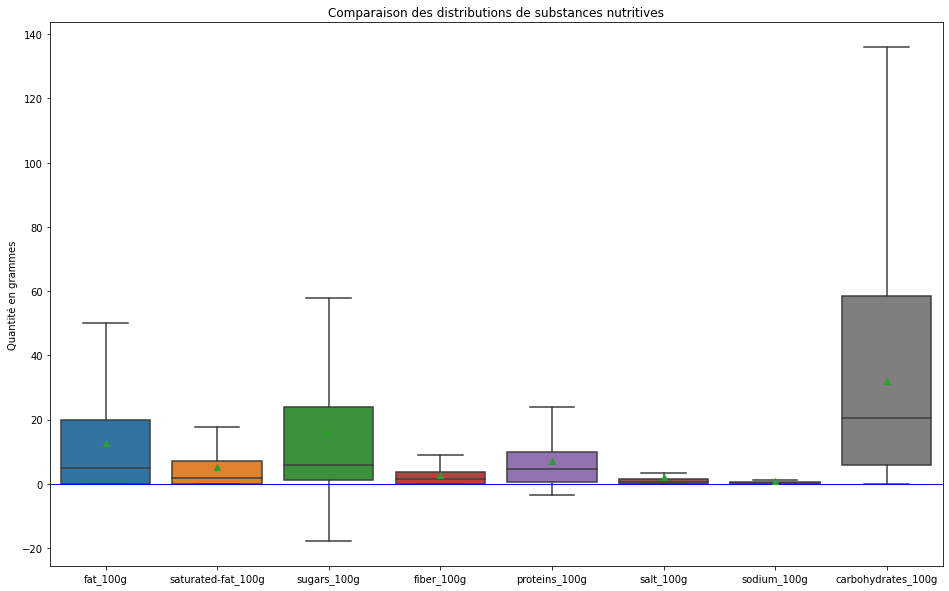

In [112]:
# Définition de variables concernées :

nutri_cols = [
    "fat_100g",
    "saturated-fat_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
    "carbohydrates_100g"]

# Visualisation de données à l'aide de box plots
fig, ax = plt.subplots(figsize=(16, 10))

sns.boxplot(
    data=data_spf[nutri_cols],
    showfliers=False,
    showmeans=True,
    ax=ax
)

plt.axhline(y=0, color='b', linestyle='-', linewidth='1')
ax.set_title("Comparaison des distributions de substances nutritives")
ax.set_ylabel("Quantité en grammes")
plt.show()

**3.1.4 La méthode IQR**

In [113]:
# Fonction pour remplacer les outliers par NaN via la méthode IQR
def remove_outliers(dataframe, columns) :
    
    df = dataframe.copy()

    # recherche de quartiles et des valeurs limites
    quartiles = df[columns].quantile([0.25, 0.75])
    iqr = quartiles.loc[0.75]-quartiles.loc[0.25]
    limits = pd.DataFrame({
        col: [
            quartiles.loc[0.25, col] - 1.5 * iqr[col], # min
            quartiles.loc[0.75, col] + 1.5 * iqr[col], # max
        ] for col in columns
    }, index=['min', 'max'])

    # les valeurs en dehors des limites passent en NaN
    for col in columns:
        df.loc[:,col] = dataframe[col].where(
            limits.loc['min', col] <= dataframe[col]
        ).where(
            dataframe[col] <= limits.loc['max', col]
        )
    print(col)
    return df

In [114]:
# Fonction pour identifier les outliers : méthode IQR.
def identify_outliers (df, column) :
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    
    IQR=Q3-Q1
    IQR
    
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR

    print("\n\n","- Les valeurs limites minimales :\n\n",round(lower_bound,2),
          "\n\n- Les valeurs limites maximales :\n\n",round(upper_bound,2))

identify_outliers(data_spf, nutri_cols)



 - Les valeurs limites minimales :

 fat_100g             -30.00
saturated-fat_100g   -10.71
sugars_100g          -32.75
fiber_100g            -5.40
proteins_100g        -13.25
salt_100g             -1.90
sodium_100g           -0.75
carbohydrates_100g   -72.50
dtype: float64 

- Les valeurs limites maximales :

 fat_100g               50.00
saturated-fat_100g     17.85
sugars_100g            58.05
fiber_100g              9.00
proteins_100g          23.95
salt_100g               3.34
sodium_100g             1.32
carbohydrates_100g    136.82
dtype: float64


**Conclusion** 

La méthode IQR ne fournit pas forcément les bons résultats !


Une suppression en amont serait une erreur, car les valeurs limites maximales indiquées ne correspondent pas à la réalité : la teneur de certains nutriments peut parfaitement atteindre les 100g !

Nous allons devoir les préciser dans une fonction dédiée. Une fois identifiées, nous allons les remplacer par les valeurs "NaN".

**3.1.5 Le traitement des outliers**

In [115]:
# Fonctions pour calculer les features négatives et celles dépassant 100g :
def detect_neg_value(df, ft):
    neg_value =  df[ft] < 0
    return neg_value.sum()

def detect_hundred_value(df, ft):
    hundred_value =  df[ft] > 100
    return hundred_value.sum()

In [116]:
detect_neg_value(data_spf, nutri_cols)

fat_100g              0
saturated-fat_100g    0
sugars_100g           7
fiber_100g            1
proteins_100g         3
salt_100g             0
sodium_100g           0
carbohydrates_100g    0
dtype: int64

In [117]:
detect_hundred_value(data_spf, nutri_cols)

fat_100g                4
saturated-fat_100g      3
sugars_100g            12
fiber_100g              4
proteins_100g           1
salt_100g             158
sodium_100g            34
carbohydrates_100g     19
dtype: int64

Une fois les valeurs hors norme détectées, nous allons les remplacer par les NaN.

**Remplacement des outliers par les NaN**

In [118]:
# Fonction pour remplacer les valeurs négatives par des NaN.

# Fonction définissant les vraies limites (entre 0g et 100g de substance nutritive sur 100g de produit) 
def real_outliers(ft):
    if ft <0 :
        print(f'- "{ft}" est une donnée invalide et sera remplacée par "NaN".')
        return np.NaN
    
    elif ft >100 :
        print(f'- "{ft}" est une donnée invalide et sera remplacée par "NaN".')
        return np.NaN
    return ft

# Fonction permettant d'appliquer la fonction précédente sur un lot de variables
def apply_real_outliers(data, ft):
    data[ft]=data[ft].apply(real_outliers)
    return ft

In [119]:
for feature in nutri_cols :
    print("Mise à jour de la variable => \"",feature,"\" :")
    apply_real_outliers(data_spf, feature)

Mise à jour de la variable => " fat_100g " :
- "714.29" est une donnée invalide et sera remplacée par "NaN".
- "380.0" est une donnée invalide et sera remplacée par "NaN".
- "101.0" est une donnée invalide et sera remplacée par "NaN".
- "105.0" est une donnée invalide et sera remplacée par "NaN".
Mise à jour de la variable => " saturated-fat_100g " :
- "175.38" est une donnée invalide et sera remplacée par "NaN".
- "210.0" est une donnée invalide et sera remplacée par "NaN".
- "550.0" est une donnée invalide et sera remplacée par "NaN".
Mise à jour de la variable => " sugars_100g " :
- "-1.2" est une donnée invalide et sera remplacée par "NaN".
- "-0.8" est une donnée invalide et sera remplacée par "NaN".
- "134.0" est une donnée invalide et sera remplacée par "NaN".
- "-3.57" est une donnée invalide et sera remplacée par "NaN".
- "110.71" est une donnée invalide et sera remplacée par "NaN".
- "-6.67" est une donnée invalide et sera remplacée par "NaN".
- "-6.25" est une donnée invalid

- "266.667" est une donnée invalide et sera remplacée par "NaN".
- "266.667" est une donnée invalide et sera remplacée par "NaN".
- "125.0" est une donnée invalide et sera remplacée par "NaN".
- "238.095" est une donnée invalide et sera remplacée par "NaN".
- "1400.0" est une donnée invalide et sera remplacée par "NaN".
- "1200.0" est une donnée invalide et sera remplacée par "NaN".
- "166.078" est une donnée invalide et sera remplacée par "NaN".
- "25320.0" est une donnée invalide et sera remplacée par "NaN".
- "657.143" est une donnée invalide et sera remplacée par "NaN".
- "400.0" est une donnée invalide et sera remplacée par "NaN".
- "150.0" est une donnée invalide et sera remplacée par "NaN".
- "116.667" est une donnée invalide et sera remplacée par "NaN".
- "109.0" est une donnée invalide et sera remplacée par "NaN".
- "117.165354330709" est une donnée invalide et sera remplacée par "NaN".
- "176.471" est une donnée invalide et sera remplacée par "NaN".
- "366.141732283465" est u

In [120]:
# Vérification :
print(detect_neg_value(data_spf, nutri_cols), "\n\n", detect_hundred_value(data_spf, nutri_cols))

fat_100g              0
saturated-fat_100g    0
sugars_100g           0
fiber_100g            0
proteins_100g         0
salt_100g             0
sodium_100g           0
carbohydrates_100g    0
dtype: int64 

 fat_100g              0
saturated-fat_100g    0
sugars_100g           0
fiber_100g            0
proteins_100g         0
salt_100g             0
sodium_100g           0
carbohydrates_100g    0
dtype: int64


#### 3.1.6 Les outliers de la valeur nutritionnelle.

Un traitement spécial pour la variable `nutrition-score-fr_100g` conformément à la définition :
* *Les résultats du calcul donnent une valeur comprise entre –15 et +40.*
* *La couleur verte correspondant à une valeur comprise entre –15 et –2, le vert clair de –1 à +3, le jaune de +4 à +11, l'orange de +12 à +16 et le rouge de +17 à +408.* ([en savoir plus sur le NutriScore](https://fr.wikipedia.org/wiki/Nutri-score)).

In [121]:
# Indicateurs statistiques de la variable
data_spf["nutrition-score-fr_100g"].describe().loc[['mean','50%','std','min','max']]

mean     9.165535
50%     10.000000
std      9.055903
min    -15.000000
max     40.000000
Name: nutrition-score-fr_100g, dtype: float64

In [122]:
# Suppression de valeurs inférieures à -15 :
def nutri_score_outliers(ft):
    if ft < -15 :
        print(f'- "{ft}" est une donnée invalide et sera remplacée par "NaN".')
        return np.NaN
    return ft

In [123]:
data_spf['nutrition-score-fr_100g'] = data_spf['nutrition-score-fr_100g'].apply(nutri_score_outliers)

In [124]:
# Vérification :
for ft in data_spf["nutrition-score-fr_100g"]:
    if ft <-13 :
        print(ft)

-14.0
-14.0
-14.0
-15.0
-14.0
-14.0


### 3.2 Valeurs dupliquées

Identifions à présent les lignes en double.

In [125]:
# Fonction permettant de détecter les duplicatas
def show_duplicates(df, col):
    duplicates=df.duplicated(col).sum()
    #print(duplicates)
    return duplicates

In [126]:
df = data_spf.columns
for col in df :    
    print(col, "=>", show_duplicates(data_spf, col))

code => 133
url => 22
last_modified_datetime => 140277
product_name => 99424
brands => 261987
additives_n => 320740
additives => 124702
nutrition_grade_fr => 320766
energy_100g => 316901
fat_100g => 317397
saturated-fat_100g => 318577
carbohydrates_100g => 315370
sugars_100g => 316719
fiber_100g => 319760
proteins_100g => 318272
salt_100g => 315260
sodium_100g => 315509
nutrition-score-fr_100g => 320716
cat_1 => 320762
cat_2 => 320735


C'est au niveau des codes barre et noms de produits que nous allons pouvoir identifier les doublons. Les noms de produits seront traités plus bas.

#### Les doublons au niveau du code barre.

In [127]:
# Identification
def find_duplicates (df, ft) :
    duplicates_cb = df.loc[df[ft].duplicated(keep=False),:]
# Affichage
    result=duplicates_cb.astype({ft: str}).sort_values(ft).head(8)
    return result

In [128]:
ft = "code"
find_duplicates(data_spf, ft)

code                                                url  \
174596  10096068983  http://world-fr.openfoodfacts.org/produit/1009...   
1372    10096068983  http://world-fr.openfoodfacts.org/produit/0010...   
174719  11110580382  http://world-fr.openfoodfacts.org/produit/1111...   
2657    11110580382  http://world-fr.openfoodfacts.org/produit/0011...   
2877    11110676177  http://world-fr.openfoodfacts.org/produit/0011...   
438     11110676177  http://world-fr.openfoodfacts.org/produit/0001...   
174721  11110818775  http://world-fr.openfoodfacts.org/produit/1111...   
3397    11110818775  http://world-fr.openfoodfacts.org/produit/0011...   

       last_modified_datetime                 product_name         brands  \
174596   2017-03-09T11:33:49Z          White Vinegar Style  Orlando Greco   
1372     2017-03-09T09:58:21Z          White Style Vinegar  Orlando Greco   
174719   2016-11-07T04:59:48Z      Kroger Parmesan cheese             NaN   
2657     2017-03-09T12:17:31Z      Parmesan Cheese, Romano         Kroger   
2877     2017-03-09T13:25:57Z         Strawberry Preserves         Kroger   
438      2017-03-09T12:15:22Z         Strawberry Preserves         Kroger   
174721   2016-11-07T01:24:19Z  Italian style bread crumbs             NaN   
3397     2017-03-09T12:51:29Z                 Bread Crumbs         Kroger   

        additives_n                                          additives  \
174596          1.0   [ water -> en:water  ]  [ acetic-acid -> en:e...   
1372            1.0   [ water -> en:water  ]  [ acetic-acid -> en:e...   
174719          NaN                                                NaN   
2657            1.0   [ parmesan-cheese -> en:parmesan-cheese  ]  [...   
2877            2.0   [ strawberries -> en:strawberries  ]  [ corn-...   
438             2.0   [ strawberries -> en:strawberries  ]  [ corn-...   
174721          NaN                                                NaN   
3397            9.0   [ enriched-flour -> en:enriched-flour  ]  [ f...   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
174596                  a         50.0      0.00                 0.0   
1372                    a         50.0      0.00                 0.0   
174719                NaN          NaN       NaN                 NaN   
2657                    e       2092.0     30.00                20.0   
2877                  NaN       1046.0      0.00                 NaN   
438                   NaN       1046.0      0.00                 NaN   
174721                NaN          NaN       NaN                 NaN   
3397                    c       1644.0      5.36                 0.0   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
174596                6.25         0.00         0.0           6.25    0.00000   
1372                  6.25         0.00         0.0           6.25    0.00000   
174719                 NaN          NaN         NaN            NaN        NaN   
2657                  0.00         0.00         0.0          40.00    5.08000   
2877                 55.00        50.00         NaN           0.00    0.00000   
438                  55.00        50.00         NaN           0.00    0.00000   
174721                 NaN          NaN         NaN            NaN        NaN   
3397                 67.86         3.57         3.6          14.29    3.90144   

        sodium_100g  nutrition-score-fr_100g cat_1 cat_2  
174596        0.000                     -3.0   NaN   NaN  
1372          0.000                     -3.0   NaN   NaN  
174719          NaN                      NaN   NaN   NaN  
2657          2.000                     26.0   NaN   NaN  
2877          0.000                      NaN   NaN   NaN  
438           0.000                      NaN   NaN   NaN  
174721          NaN                      NaN   NaN   NaN  
3397          1.536                      9.0   NaN   NaN

Nous remarquons que les doublons n'ont pas la même date de mise à jour d'infos. Nous allons donc conserver les entrées les plus récentes.

In [129]:
# Suppression de doublons 
data_spf = data_spf.sort_values("last_modified_datetime").drop_duplicates(subset="code")

### 3.3 Les lignes vides.

Vérifions combien de NaN se trouvent au sein des variables catégorielles :

In [130]:
cat_cols = [
    "code",
    "url",
    "last_modified_datetime",
    "product_name",
    "brands",
    "additives",
    "nutrition_grade_fr",
    "cat_1","cat_2"]
cat_cols_nan = data_spf[cat_cols].describe().T
#Ajout de nouvelle colonne indiquant les valeurs manquantes
cat_cols_nan["missing values"] = data_spf[cat_cols].isna().sum().values
cat_cols_nan

count  unique  \
code                    320638  320638   
url                     320638  320638   
last_modified_datetime  320639  180475   
product_name            302882  221280   
brands                  292258   58771   
additives               248808  196018   
nutrition_grade_fr      221137       5   
cat_1                    68881       9   
cat_2                    71859      36   

                                                                      top  \
code                                                        3700019510497   
url                     http://world-fr.openfoodfacts.org/produit/3700...   
last_modified_datetime                               2015-08-09T17:35:42Z   
product_name                                                    Ice Cream   
brands                                                          Carrefour   
additives                [ extra-virgin-olive-oil -> en:extra-virgin-o...   
nutrition_grade_fr                                                      d   
cat_1                                                       Sugary snacks   
cat_2                                                      One dish meals   

                         freq  missing values  
code                        1               1  
url                         1               1  
last_modified_datetime     33               0  
product_name              410           17757  
brands                   2978           28381  
additives                 397           71831  
nutrition_grade_fr      62733           99502  
cat_1                   12861          251758  
cat_2                    5546          248780

Les variables `code` et `nutrition_grade_fr` sont cruciales car elles nous serviront de référence pour les analyses. Nous allons donc enlever les lignes vides.

In [131]:
# Suppression de lignes vides :
data_spf.dropna(subset=["code","nutrition_grade_fr"], inplace=True)

In [132]:
data_spf.shape

(221137, 20)

### 3.4 Valeurs manquantes

A présent, nous avons à notre disposition des données fiables qui nous permettront de traiter les informations manquantes.

Nous allons créer une copie du dataframe. Ensuite, nous analyserons la répartition de données manquantes par catégorie.

In [133]:
clean_data=data_spf.copy()

#### 3.4.1 Taux de données manquantes

In [134]:
taux_nan=clean_data.isna().sum()*100/clean_data.shape[0]
round(taux_nan.sort_values(),2)

code                        0.00
url                         0.00
last_modified_datetime      0.00
nutrition-score-fr_100g     0.00
nutrition_grade_fr          0.00
saturated-fat_100g          0.09
proteins_100g               0.09
sugars_100g                 0.09
sodium_100g                 0.10
salt_100g                   0.11
energy_100g                 0.15
product_name                1.24
brands                      2.10
fat_100g                    7.90
carbohydrates_100g          7.92
additives_n                11.32
additives                  11.33
fiber_100g                 12.41
cat_2                      77.07
cat_1                      77.12
dtype: float64

Affichons le résultat sur un digramme :

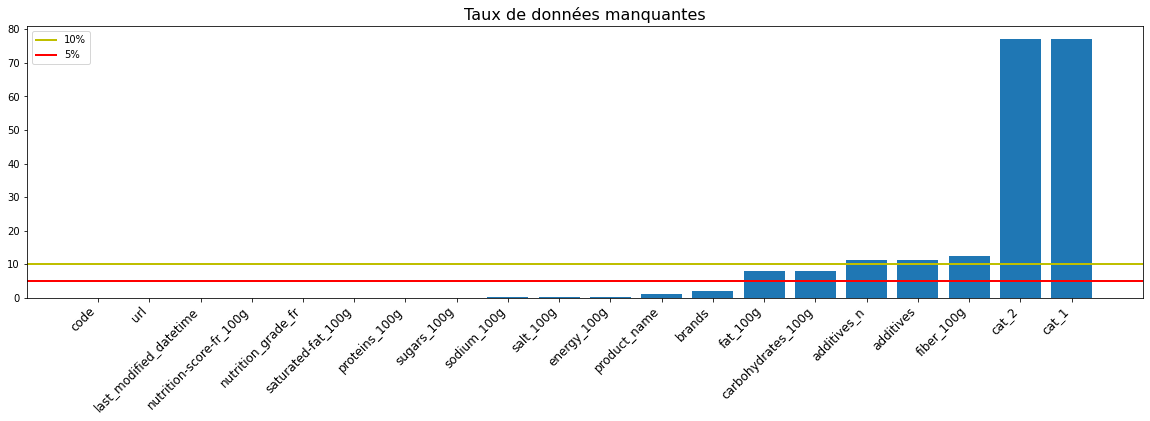

In [135]:
fig=plt.figure(figsize=(20,5))
plt.xticks(rotation=45, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='large')

plt.bar(x=taux_nan.sort_values().index,
       height=taux_nan.sort_values().values)

plt.axhline(y=10, color='y', linestyle='-', linewidth='2', label='10%')
plt.axhline(y=5, color='r', linestyle='-', linewidth='2', label='5%')
plt.title("Taux de données manquantes", fontsize=16)
plt.legend()
plt.show()

**Conclusion**

Les NaN que nous allons remplir se trouvent particulièrement au niveau des variables nutritionnelles :
* saturated-fat_100g ===> 0.09
* proteins_100g ===>      0.09
* sugars_100g ===>        0.09
* sodium_100g ===>        0.10
* salt_100g ===>          0.11
* energy_100g ===>        0.15
* fat_100g ===>  ===> 7.90
* carbohydrates_100g ===> 7.92
* fiber_100g ===>        12.41

#### 3.4.2 Stratégies de remplissage de NaN

Analysons plusieurs techniques de traitement des NaN :
1. **Imputation par un paramètre de tendance centrale (médiane | mode | moyenne)**
    * appliquer uniquement sur les produits dont la distribution est normale
    * pour les variables quantitatives et en cas de symétrie - la moy() ou la mean() conviennent
        * attention, la moyenne est très sensible aux valeurs atypiques / aberrantes !
    * pour les variables qualitatives, imputer le mode ou les valeurs les plus fréquentes
    
2. **Iterative Imputer**
    * appliquer sur des variables corrélées

Prenons un peu de recul. 

Il est indispensable de prendre en compte les facteurs spécifiques au domaine de la nutrition : quels éléments à prendre en compte ? Dans un premier temps, essayons de comprendre comment est calculé le Nutri-Score.

#### 3.4.3 Le Nutri-Score

Le logo est attribué sur la base d’un score prenant en compte pour 100 gr ou 100 mL de produit, la teneur :

* en nutriments et **aliments à favoriser** :
    * fibres, protéines, fruits, légumes, légumineuses, fruits à coques, huile de colza, de noix et d’olive
* et en **nutriments à limiter** :
    * énergie, acides gras saturés, sucres, sel
        
Après calcul, le score obtenu par un produit permet de lui attribuer une lettre et une couleur.

Dans notre dataset, c'est la variable `nutrition_grade_fr` qui représente le Nutri-Score. Le code couleur est attribué aux lettres A, B, C, D ou E :

In [136]:
# Niveaux de Nutri Score
clean_data.nutrition_grade_fr.sort_values().unique()

array(['a', 'b', 'c', 'd', 'e'], dtype=object)

#### 3.4.4 Le scénario à adopter

Après réflexion, il semble judicieux de profiter des données du Nutri-Score afin de remplir les informations manquantes.

Il serait donc intéressant de remplir les NaN des substances nutritives par la valeur moyenne des individus ayant le même niveau de Nutri-Score.

#### 3.4.5 Remplissage de NaN

Il faudrait donc remplacer les valeurs manquantes par la médiane de la variable.

Dans un premier temps, nous allons visualiser la répartition des niveaux de Nutri-Score en fonction de la teneur en substances nutritives :

In [137]:
by_nutrition_grade_median = clean_data.groupby('nutrition_grade_fr').median().T
round(by_nutrition_grade_median,2)

nutrition_grade_fr            a       b       c        d        e
additives_n                0.00    1.00    1.00     2.00     2.00
energy_100g              456.00  322.00  837.00  1464.00  1893.50
fat_100g                   1.40    1.50    5.34    14.29    26.10
saturated-fat_100g         0.00    0.20    1.20     4.29    13.00
carbohydrates_100g        14.54   10.83   21.69    40.00    50.00
sugars_100g                2.40    3.54    4.50    13.33    29.41
fiber_100g                 3.00    0.90    1.70     1.10     0.00
proteins_100g              7.14    3.00    4.88     6.45     6.10
salt_100g                  0.13    0.41    0.88     0.92     0.90
sodium_100g                0.05    0.16    0.35     0.36     0.35
nutrition-score-fr_100g   -3.00    1.00    6.00    14.00    22.00

Nous remarquons que l'attribution du Nutri-Score contient des incohérences :
* energy_100g => 322g classé en B, alors qu'il devrait figurer en position A
* carbohydrates_100g => 10,83g - idem
* fiber_100g => 0,9g - logiquement le score D
* proteins_100g => les chiffres sont en désordre


Observons la distribution de chaque variable par Nutri-Score.

In [138]:
nutri_cols.append('additives_n')
nutri_cols.append('nutrition-score-fr_100g')
nutri_cols.remove('sodium_100g')

NUTRI_GRADES = ('a', 'b', 'c', 'd', 'e')

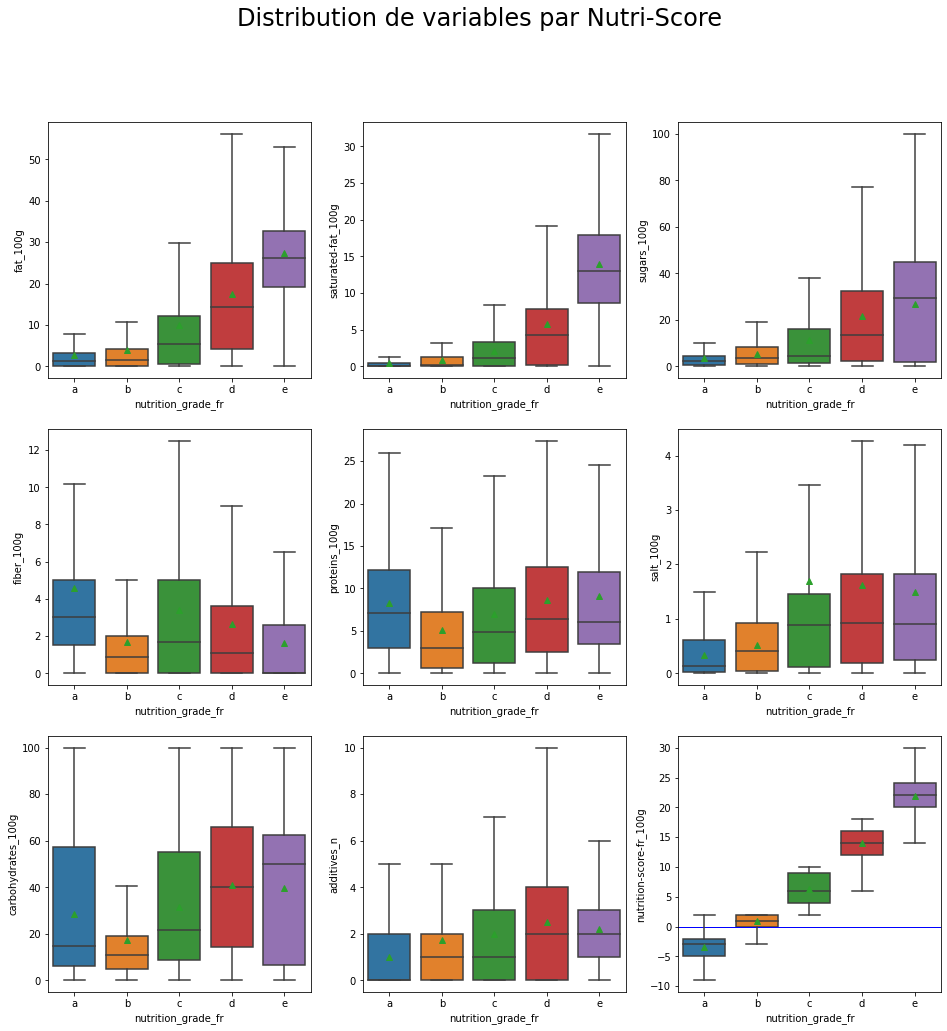

In [139]:
# Visualisation de substances nutritives en fonction du Nutri Score
nutriscore_by_nutriment_boxplot(
    dataframe=clean_data, 
    cat_column='nutrition_grade_fr', 
    num_column=nutri_cols, 
    order_values=NUTRI_GRADES
)

Nous constatons la présence de valeurs qui sembleraient aberrantes.

Peut-on vraiment parler de valeurs aberrantes ? S'agit-il plutôt de valeurs plutôt atypiques ? 

Etant donné que les chiffres rentrent dans le cadre des valeurs limites prédéfinies, nous pouvons émettre une hypothèse selon laquelle il s'agit de valeurs atypique ou normales.

Analysons quelques exemples da valeurs limites pour les variables `salt_100g` et `fiber_100g` :

In [140]:
by_salt = clean_data[
    (clean_data["salt_100g"] ==100)]
by_salt

by_salt.groupby('product_name')['salt_100g'].count()

product_name
Auchan                             1
Basic Zout                         1
Fleur de sel de Guérande           1
Jodsalz mit Fluorid                1
Le saunier de camargue             1
Meersalz mit Jod                   1
Moulin Sel de Guérande             1
Saliere sel fin                    1
Sel Fin de l'Île de Ré             1
Sel de Guérande                    2
Sel fin de Guerande                1
Sel fin de Guérande                1
Sel fin de met iodé                1
Sel fin iodé - sel de mer          1
Varech Croquant Taokaenoi          1
Véritable sel de mer la baleine    1
Name: salt_100g, dtype: int64

In [141]:
# Interact with specification of arguments
@interact
def show_articles_more_than(column=['salt_100g'], x=(90, 100, 10)):
    return clean_data.loc[clean_data[column] > x]

interactive(children=(Dropdown(description='column', options=('salt_100g',), value='salt_100g'), IntSlider(val…

Les produits concernés par notre recherche sont principalement des paquets de sel.
Il est tout à fait normal de retrouver 100g de sel dans un paquet de sel.

En revanche, nous remarquons une anomalie au niveau de la variable `product_name` - *Auchan*. Cette entrée demande un nettoyage.

Effectuons la même expérience pour les fibres. 

Quels produits contiennent 100g de substance nutritive en question sur 100g de produit ? 
S'agit-il de valeurs aberrantes ou atypiques ?

In [142]:
# Interact with specification of arguments
@interact
def show_articles_more_than(column=['fiber_100g'], x=(90, 100, 10)):
    return clean_data.loc[clean_data[column] > x]

interactive(children=(Dropdown(description='column', options=('fiber_100g',), value='fiber_100g'), IntSlider(v…

Le résultat d'extraction dévoile un grand nombre d'erreurs :

1. Les marques non alimentaires sont à enlever (`Sony, Savarez, Blue Ray`).
2. L'eau ne contient pas de fibres, alors qu'ici une `Eau` en contient 100g sur 100G. Cette entrée est à vérifier.
3. La marque `Harry's` est à examiner de plus près : est-ce qu ele produit `Harry Potter & The Deathly Hallows Radcliffe ` est du ressort de l'alimentation ?

Les autres produit se caractérisent par une contenance en fibres tout à fait correcte (Isotonic Sport Drink, Powdered Agar-Agar, Noix sèches).

#### 3.4.6 Nettoyage - deuxième passe...

Mettons en place une fonction permettant de filtrer le dataset suivant le besoin :

In [143]:
def by_domain (data, ft) :
    by_ft = data[
        data[ft].isin(sequence)
    ]
    return by_ft

Ensuite, nous allons analyser les lignes du dataset pour comprendre les anomalies :

In [144]:
#1. Harry Potter
sequence=["Harry Potter"]
by_domain(clean_data, "product_name")

Empty DataFrame
Columns: [code, url, last_modified_datetime, product_name, brands, additives_n, additives, nutrition_grade_fr, energy_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g, sodium_100g, nutrition-score-fr_100g, cat_1, cat_2]
Index: []

In [145]:
sequence=["Harry\'s"]
by_domain(clean_data, "brands")

code                                                url  \
202167  3228850001245  http://world-fr.openfoodfacts.org/produit/3228...   
202241  3228851001053  http://world-fr.openfoodfacts.org/produit/3228...   
202184  3228850003621  http://world-fr.openfoodfacts.org/produit/3228...   
202164  3228850001016  http://world-fr.openfoodfacts.org/produit/3228...   
14047     18053191729  http://world-fr.openfoodfacts.org/produit/0018...   
14062     18053193822  http://world-fr.openfoodfacts.org/produit/0018...   
14053     18053192511  http://world-fr.openfoodfacts.org/produit/0018...   
14066     18053760406  http://world-fr.openfoodfacts.org/produit/0018...   
202220  3228850008251  http://world-fr.openfoodfacts.org/produit/3228...   
202206  3228850004437  http://world-fr.openfoodfacts.org/produit/3228...   
170118   883929140886  http://world-fr.openfoodfacts.org/produit/0883...   
202274  3228857000616  http://world-fr.openfoodfacts.org/produit/3228...   
202259  3228857000197  http://world-fr.openfoodfacts.org/produit/3228...   
202252  3228857000043  http://world-fr.openfoodfacts.org/produit/3228...   

       last_modified_datetime  \
202167   2017-01-31T17:06:17Z   
202241   2017-02-17T16:20:57Z   
202184   2017-02-22T10:20:26Z   
202164   2017-03-03T16:58:05Z   
14047    2017-03-09T21:13:38Z   
14062    2017-03-09T21:14:47Z   
14053    2017-03-10T09:04:31Z   
14066    2017-03-10T09:04:32Z   
202220   2017-03-16T17:19:35Z   
202206   2017-04-05T00:22:41Z   
170118   2017-04-07T13:46:29Z   
202274   2017-04-11T19:42:47Z   
202259   2017-04-12T07:57:55Z   
202252   2017-04-20T06:35:26Z   

                                             product_name   brands  \
202167                            Pain de mie sans croûte  Harry's   
202241                            Américan Sandwich Blanc  Harry's   
202184                          Beau & Bon Éclats de Noix  Harry's   
202164              250G Pain De Mie Extra Brioche Harrys  Harry's   
14047                            Carrot And Ginger Bisque  Harry's   
14062                                   Chocolate Pudding  Harry's   
14053                       Udon Noodle Soup With Chicken  Harry's   
14066                                   Crab Corn Chowder  Harry's   
202220                       HARRYS 100% MIE COMPLET 500G  Harry's   
202206                                       Pain complet  Harry's   
170118  Harry Potter & The Deathly Hallows Radcliffe /...  Harry's   
202274                                      Brioche Dorée  Harry's   
202259                          American Sandwich Complet  Harry's   
202252              Brioche tranchée à la farine complète  Harry's   

        additives_n                                          additives  \
202167          NaN                                                NaN   
202241          NaN                                                NaN   
202184          0.0   [ farine-de-ble-51 -> fr:farine-de-ble-51  ] ...   
202164          NaN                                                NaN   
14047           2.0   [ carrots -> en:carrots  ]  [ sweet-potato-pu...   
14062           0.0   [ milk -> en:milk  ]  [ sugar -> en:sugar  ] ...   
14053           0.0   [ chicken-stock -> en:chicken-stock  ]  [ sto...   
14066           0.0   [ milk -> en:milk  ]  [ crab-stock -> en:crab...   
202220          NaN                                                NaN   
202206          NaN                                                NaN   
170118          NaN                                                NaN   
202274          NaN                                                NaN   
202259          0.0   [ farine-complete-de-ble-38 -> fr:farine-comp...   
202252          2.0   [ farine-complete-de-ble -> fr:farine-complet...   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
202167                  e       1105.0       NaN               34.60   
202241                  b       1151.0       NaN                0.40   
20

La marque `Harry's` semble représenter les produits alimentaires. A laisser en l'état.

In [146]:
# 2. Marques non-alimentaires
sequence=["Sony","Savarez","Blu Ray"]
by_domain(clean_data, "brands")

code                                                url  \
285429  7340055304214  http://world-fr.openfoodfacts.org/produit/7340...   
273543  5051889553625  http://world-fr.openfoodfacts.org/produit/5051...   
127525   698502500571  http://world-fr.openfoodfacts.org/produit/0698...   

       last_modified_datetime  \
285429   2017-02-21T17:48:02Z   
273543   2017-03-24T19:22:13Z   
127525   2017-03-30T19:35:35Z   

                                             product_name   brands  \
285429                              Marshall - Major Noir     Sony   
273543  Le Hobbit : La Bataille Des Cinq Armés - Versi...  Blu Ray   
127525                            Savarez - Jeu De Cordes  Savarez   

        additives_n additives nutrition_grade_fr  energy_100g  fat_100g  \
285429          NaN       NaN                  c         21.0       NaN   
273543          NaN       NaN                  a          4.0       NaN   
127525          NaN       NaN                  a          4.0       NaN   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
285429                 5.0                 NaN          5.0       100.0   
273543                 0.0                 NaN          0.0       100.0   
127525                 0.1                 NaN          0.1       100.0   

        proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g cat_1  \
285429          100.0       50.0    19.685039                     10.0   NaN   
273543          100.0        0.0     0.000000                    -10.0   NaN   
127525          100.0        0.0     0.000000                    -10.0   NaN   

       cat_2  
285429   NaN  
273543   NaN  
127525   NaN

In [147]:
sequence=["Apple"]
by_domain(clean_data, "brands")

code                                                url  \
171242  888462570350  http://world-fr.openfoodfacts.org/produit/0888...   
170692  885909361984  http://world-fr.openfoodfacts.org/produit/0885...   

       last_modified_datetime                            product_name brands  \
171242   2017-04-06T17:37:18Z  Apple Iphone 6S Plus 128 Go Space Gray  Apple   
170692   2017-04-06T17:46:02Z                        Apple Iphone 3GS  Apple   

        additives_n additives nutrition_grade_fr  energy_100g  fat_100g  \
171242          NaN       NaN                  a          4.0       NaN   
170692          NaN       NaN                  a         42.0       NaN   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
171242                 1.0                 NaN          1.0         1.0   
170692                 3.0                 NaN          2.0        50.0   

        proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g cat_1  \
171242            1.0       0.01     0.003937                     -1.0   NaN   
170692            3.0       0.01     0.003937                     -4.0   NaN   

       cat_2  
171242   NaN  
170692   NaN

Les lignes où le `product_name` est un produit non alimentaire sont à supprimer.

In [148]:
# 3. Eau et sa teneur en fibres
sequence=["Eau","Eau gazéifiée","Eau de source","Eau minérale","Eau pétillante", "Eau gazeuse"]
by_domain(clean_data,"product_name")

code                                                url  \
210770  3256223510315  http://world-fr.openfoodfacts.org/produit/3256...   
205321  3250390145769  http://world-fr.openfoodfacts.org/produit/3250...   
283105  6091035082004  http://world-fr.openfoodfacts.org/produit/6091...   
232775  3434890000135  http://world-fr.openfoodfacts.org/produit/3434...   
242506  3564700629185  http://world-fr.openfoodfacts.org/produit/3564...   

       last_modified_datetime    product_name         brands  additives_n  \
210770   2016-08-21T11:05:38Z  Eau pétillante              U          0.0   
205321   2017-01-29T17:43:46Z   Eau de source         Ondine          0.0   
283105   2017-02-21T17:31:44Z             Eau          Vital          NaN   
232775   2017-03-13T12:05:44Z             Eau       Delhaize          NaN   
242506   2017-03-14T09:39:38Z             Eau  Marque Repère          NaN   

                                                additives nutrition_grade_fr  \
210770   [ eau-minerale-naturelle-renforcee-au-gaz-de-...                  a   
205321   [ eau-de-source -> fr:eau-de-source  ]  [ eau...                  a   
283105                                                NaN                  e   
232775                                                NaN                  c   
242506                                                NaN                  b   

        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
210770          0.0       0.0                 0.0                 0.0   
205321          0.0       0.0                 0.0                 0.0   
283105        418.0       NaN               100.0                 NaN   
232775          0.0       NaN                 0.0                 NaN   
242506          0.0       0.0                 0.0                 0.1   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
210770          0.0         0.0            0.0   0.007874     0.003100   
205321          0.0         0.0            0.0   0.000000     0.000000   
283105        100.0       100.0          100.0   2.000000     0.787402   
232775          0.0         0.0            0.0   1.320000     0.519685   
242506          0.1         0.0            0.0   0.007000     0.002756   

        nutrition-score-fr_100g      cat_1                  cat_2  
210770                      0.0  Beverages  Non sugared beverages  
205321                      0.0  Beverages  Non sugared beverages  
283105                     24.0        NaN                    NaN  
232775                      5.0        NaN                    NaN  
242506                      0.0        NaN                    NaN

Un seul cas d'eau contenant les fibres remonte : il s'agit d'une eau révitalisante, un jus de détox. A garder en l'état.

**Suppression de produits non alimentaires**

A présent, nous allons identifier les marques non alimentaires et les supprimer du dataset.

Nous allons regrouper dans une liste les noms de commerçants / produits audio - vidéo qui ne devraient pas figurer dans la colonne `product_name` :

In [149]:
def check_product_names(df, ft) :
    GRANDE_SURFACE = [
        'Carrefour','Auchan','U','Leader Price','Casino','Meijer','Kroger','Picard','Roundy\'s','Cora','Ahold',
        'Great Value','Spartan','Shoprite','Weis','Monoprix','Nestlé','Fleury Michon','Coop','Target Stores',
        'Food Club','Dia','Harris Teeter','Trader Joe\'s','Weis Quality','Alnatura','Lindt','Migros','Goya','Giant',
        'Super U','Franprix','Les Mousquetaires','Marque Repère','Reflets de France','Aldi','Hershey\'s','hershey\'s']


    mask = df[ft].isin(GRANDE_SURFACE)
    grande_surface_rows=df.loc[mask, ft]
    return grande_surface_rows
    print(grande_surface_rows.count())
    # Suppression de lignes erronées :
    index_supermarket_name=grande_surface_rows.index
    df.drop(index_supermarket_name, inplace=True)

In [150]:
check_product_names(clean_data, "product_name")

176023            Giant
275777        Carrefour
209081           Auchan
246024           Auchan
218797           Picard
219002           Picard
292012           Nestlé
277438           Nestlé
245270           Auchan
245851           Auchan
219081           Picard
193525    Fleury Michon
263198         Alnatura
247280           Auchan
224344    Fleury Michon
246693           Auchan
219579           Picard
219521           Picard
246733           Auchan
219645           Picard
200352           Casino
245372           Auchan
219481           Picard
246520           Auchan
201229           Casino
239672        Carrefour
200384           Casino
216024     Leader Price
216566     Leader Price
224346    Fleury Michon
263522         Alnatura
247239           Auchan
193549    Fleury Michon
193484    Fleury Michon
215196     Leader Price
239838        Carrefour
242560    Marque Repère
193380    Fleury Michon
239820        Carrefour
247112           Auchan
216700     Leader Price
193554    Fleury

In [151]:
AUDIO_VIDEO_ELECTRO = [
    # Electroménager
    'Liebherr','Miele','Bosch','Siemens','Aeg','Neff','Brandt','Sauter','De Dietrich','Vedette','Rosières','Airlux','Whirlpool','Electrolux','Smeg','Candy','Faur','Hotpoint','Seb','Moulinex','Calor','Krups','Rowenta','Braun','H. Koenig','Severin','Ariete','Polti','Zanussi','Kitchenaid','Kenwood','Russel Hobbs','Candy','Harper','Dyson',
    # Audio / Vidéo
    'Brandt','Grundig','Hisense','LG','Panasonic','Philips','Proline','Samsung','TCL','Thomson','Toshiba','Savarez','Blu Ray', 'Yamaha', 'Technics', 'Sennheiser', 'Pioneer', 'JBL', 'Bose', 'Sonos', 'Focal', 'Marshall',
    #Téléphonie
    'Apple','Samsung','Huawei','Xiaomi','Oppo','Sony','OnePlus','Honor','Nokia','Wiko','Motorola','HTC','Acer','Alcatel','Archos','Asus','Vivo']

mask = clean_data['brands'].isin(AUDIO_VIDEO_ELECTRO)
audio_video_rows=clean_data.loc[mask, 'brands']
audio_video_rows.count()

21

In [152]:
# Lagrange est à laisser, il s'agit bien de produits alimentaires :
sequence=["Lagrange"]
by_domain(clean_data, "brands")

code                                                url  \
199274  3196203800107  http://world-fr.openfoodfacts.org/produit/3196...   
199273  3196203800022  http://world-fr.openfoodfacts.org/produit/3196...   
199275  3196203800404  http://world-fr.openfoodfacts.org/produit/3196...   
199276  3196203800503  http://world-fr.openfoodfacts.org/produit/3196...   

       last_modified_datetime  \
199274   2016-01-03T20:48:43Z   
199273   2017-02-17T16:46:43Z   
199275   2017-02-27T16:48:15Z   
199276   2017-04-20T17:48:27Z   

                                             product_name    brands  \
199274        Aromatisation pour yaourtière arôme vanille  Lagrange   
199273      Lagrange - Sucre Barbe à Papa Fraise - 380002  Lagrange   
199275     Lagrange - Aromatisation Yaourt Pêche - 380040  Lagrange   
199276  Lagrange - Aromatisation Yaourt Caramel Beurre...  Lagrange   

        additives_n                                          additives  \
199274          0.0   [ sucre -> fr:sucre  ]  [ lait-ecreme-en-poud...   
199273          NaN                                                NaN   
199275          NaN                                                NaN   
199276          NaN                                                NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
199274                  d       1660.0       0.1                 0.1   
199273                  d       1678.0       NaN                 0.1   
199275                  d       1648.0       NaN                 0.1   
199276                  d       1615.0       NaN                 0.1   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
199274                92.0         91.1         NaN            5.4        0.2   
199273                 NaN         99.6         0.0            0.0        0.0   
199275                 NaN         92.0         0.0            5.1        0.2   
199276                 NaN         91.2         0.0            5.0        0.3   

        sodium_100g  nutrition-score-fr_100g cat_1 cat_2  
199274      0.07874                     14.0   NaN   NaN  
199273      0.00000                     15.0   NaN   NaN  
199275      0.07874                     14.0   NaN   NaN  
199276      0.11811                     15.0   NaN   NaN

Nous allons procéder à la suppression des lignes erronées :

In [153]:
index_audio_video=audio_video_rows.index
clean_data.drop(index_audio_video, inplace=True)

In [154]:
clean_data.shape

(221116, 20)

#### 3.4.7 Visualisation des substances nutritives en fonction du Nutri Score

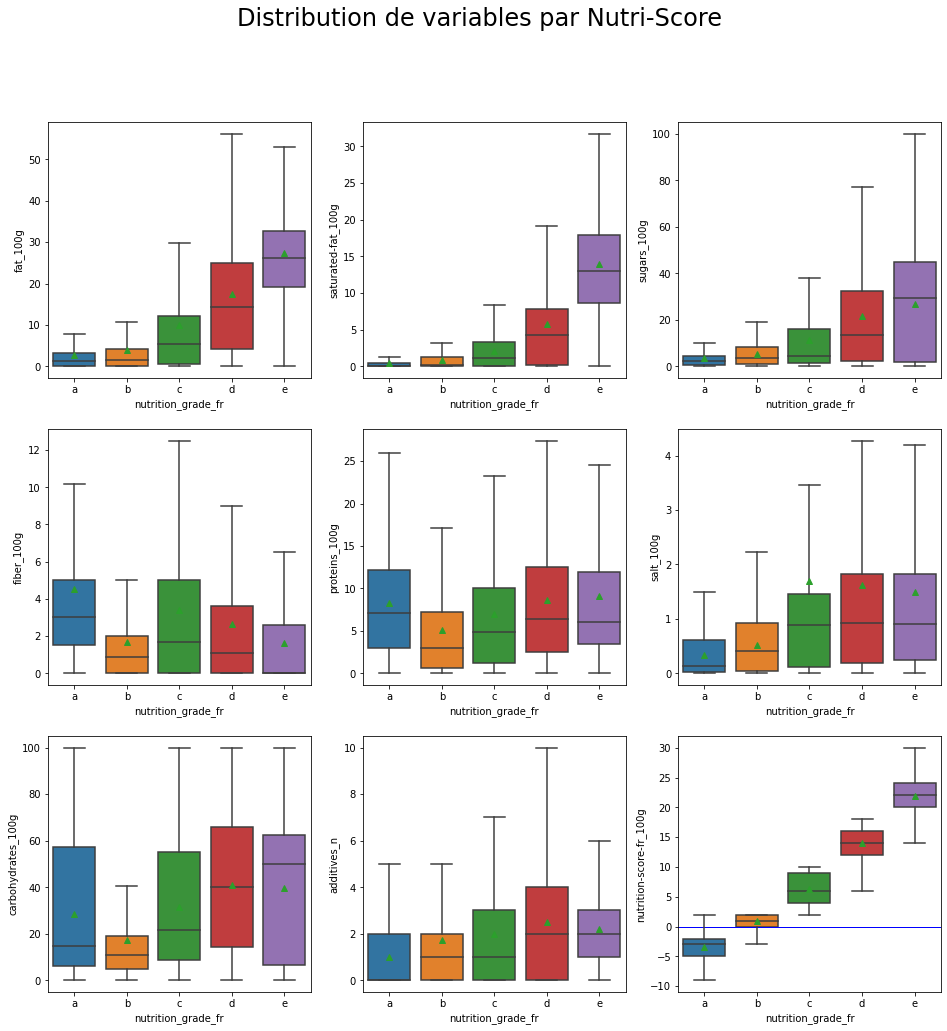

In [155]:
# Check suite à la suppression des lignes fausses.

nutriscore_by_nutriment_boxplot(
    dataframe=clean_data, 
    cat_column='nutrition_grade_fr', 
    num_column=nutri_cols, 
    order_values=NUTRI_GRADES
)

**Conclusion**

A présent, nous avons à notre disposition des données fiables.


Interprétons les résultats affichés ci-dessus : comment évolue le Nutri-Score en fonction des substances nutritives ?

1. Les nutriments à favoriser => nous observons une certaine évolution linéaire décroissante.

- les fibres
- les protéines



2. Les nutriments à limiter => nous observons clairement une évolution linéaire croissante.
- l'énergie
- les graisses
- les acides gras saturés
- les sucres
- le sel


3. Le score de nutrition, quant à lui, progresse de façon parfaitement linéaire.


Vérifions à présent si les indicateurs statistiques confirment nos observations.

In [156]:
by_nutrition_grade_median_bis = clean_data.groupby('nutrition_grade_fr').median().T
round(by_nutrition_grade_median_bis,2)

nutrition_grade_fr            a       b       c        d        e
additives_n                0.00    1.00    1.00     2.00     2.00
energy_100g              456.00  322.00  837.00  1464.00  1894.00
fat_100g                   1.40    1.50    5.34    14.29    26.10
saturated-fat_100g         0.00    0.20    1.20     4.29    13.00
carbohydrates_100g        14.54   10.83   21.69    40.00    50.00
sugars_100g                2.40    3.54    4.50    13.33    29.41
fiber_100g                 3.00    0.90    1.70     1.10     0.00
proteins_100g              7.14    3.00    4.88     6.45     6.10
salt_100g                  0.13    0.41    0.88     0.92     0.90
sodium_100g                0.05    0.16    0.35     0.36     0.35
nutrition-score-fr_100g   -3.00    1.00    6.00    14.00    22.00

Effectivement, les chiffres évoluent (sauf quelques incohérences, sûrement liées aux erreurs dans les valeurs introduites dans la base de données...) de façon croissante ou décroissante en fonction du type de nutriment.

#### 3.4.8 Remplissage de NaN par moyen de la médiane

Nous pouvons passer au traitement de valeurs manquantes. Commençons par un aperçu du taux de valeurs manquantes :

In [157]:
taux_nan=clean_data.isna().sum()*100/clean_data.shape[0]
round(taux_nan.sort_values(),2)

code                        0.00
url                         0.00
last_modified_datetime      0.00
nutrition-score-fr_100g     0.00
nutrition_grade_fr          0.00
saturated-fat_100g          0.09
proteins_100g               0.09
sugars_100g                 0.09
sodium_100g                 0.10
salt_100g                   0.11
energy_100g                 0.15
product_name                1.24
brands                      2.10
fat_100g                    7.90
carbohydrates_100g          7.92
additives_n                11.32
additives                  11.33
fiber_100g                 12.41
cat_2                      77.07
cat_1                      77.12
dtype: float64

La méthode adoptée est le remplissage par la médiane. Si tout va bien, nous verrons les variables de type numérique se remplir.

Dans un premier temps nous allons identifier les médianes. Ensuite, nous allons remplir les NaN par leur valeur :

In [158]:
#Remplissage de valeurs NaN par la médiane

median_all = clean_data.groupby('nutrition_grade_fr').median()

for grade in median_all.index:
    clean_data.loc[clean_data['nutrition_grade_fr'] == grade] = clean_data[clean_data['nutrition_grade_fr'] == grade].fillna(value=median_all.loc[grade])

**Vérification**

Vérifions comment ont évolué les limites suite au traitement des valeurs NaN :

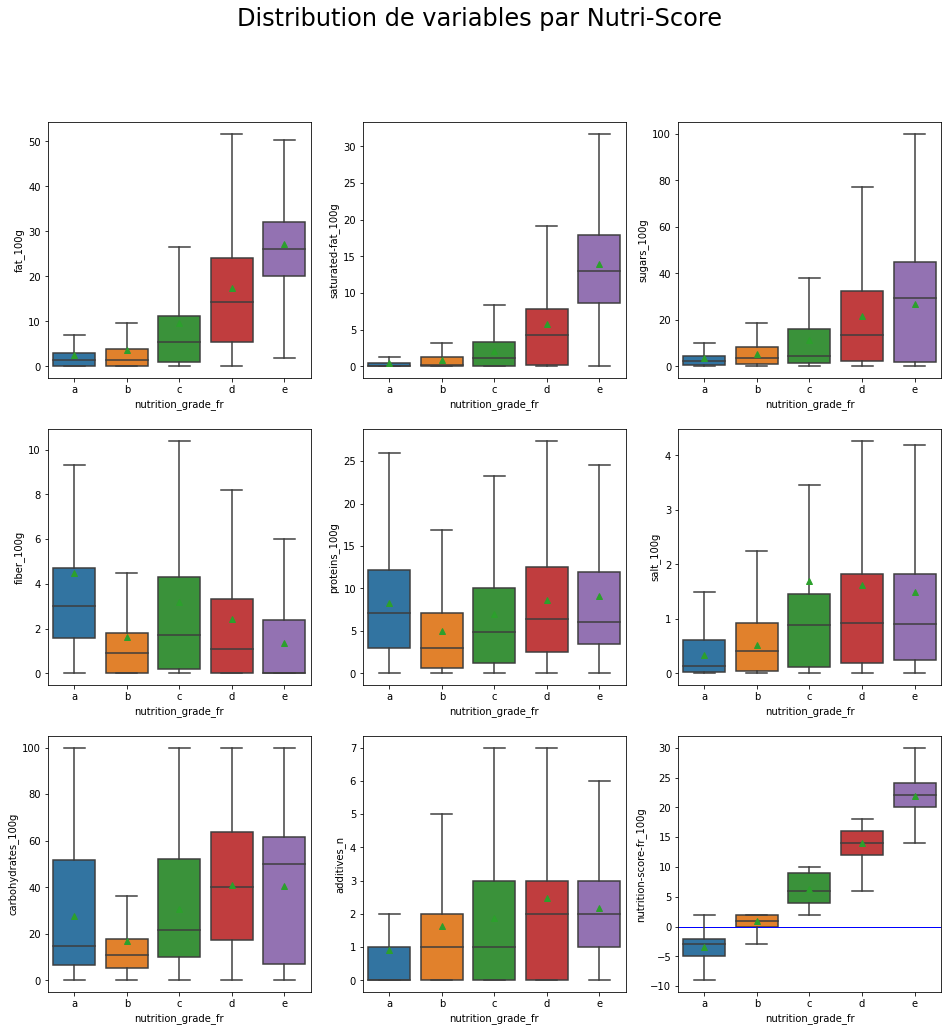

In [159]:
# Visualisation de substances nutritives en fonction du Nutri Score
nutriscore_by_nutriment_boxplot(
    dataframe=clean_data, 
    cat_column='nutrition_grade_fr', 
    num_column=nutri_cols, 
    order_values=NUTRI_GRADES
)

Rien d'inquiétant à signaler. 
Comparons le taux actuel des valeurs manquantes ainsi que les indicateurs statistiques.

In [160]:
taux_nan=clean_data.isna().sum()*100/clean_data.shape[0]
round(taux_nan.sort_values(),2)

code                        0.00
nutrition-score-fr_100g     0.00
sodium_100g                 0.00
salt_100g                   0.00
proteins_100g               0.00
fiber_100g                  0.00
sugars_100g                 0.00
carbohydrates_100g          0.00
saturated-fat_100g          0.00
fat_100g                    0.00
energy_100g                 0.00
nutrition_grade_fr          0.00
additives_n                 0.00
last_modified_datetime      0.00
url                         0.00
product_name                1.24
brands                      2.10
additives                  11.33
cat_2                      77.07
cat_1                      77.12
dtype: float64

In [161]:
round(clean_data.describe(),2).T

count     mean     std   min     25%      50%  \
additives_n              221116.0     1.91    2.40   0.0    0.00     1.00   
energy_100g              221116.0  1175.79  760.66   0.0  450.90  1191.00   
fat_100g                 221116.0    13.15   15.69   0.0    1.17     7.14   
saturated-fat_100g       221116.0     4.96    7.56   0.0    0.00     1.79   
carbohydrates_100g       221116.0    32.93   27.50   0.0    7.96    23.80   
sugars_100g              221116.0    15.00   19.81   0.0    1.30     5.00   
fiber_100g               221116.0     2.58    4.22   0.0    0.00     1.20   
proteins_100g            221116.0     7.77    8.06   0.0    1.90     5.70   
salt_100g                221116.0     1.23    3.94   0.0    0.10     0.65   
sodium_100g              221116.0     0.49    1.67   0.0    0.04     0.25   
nutrition-score-fr_100g  221116.0     9.16    9.06 -15.0    1.00    10.00   

                             75%     max  
additives_n                 3.00    31.0  
energy_100g              1715.00  3887.0  
fat_100g                   21.43   100.0  
saturated-fat_100g          7.14   100.0  
carbohydrates_100g         57.14   100.0  
sugars_100g                23.06   100.0  
fiber_100g                  3.30   100.0  
proteins_100g              10.71   100.0  
salt_100g                   1.36   100.0  
sodium_100g                 0.54    92.5  
nutrition-score-fr_100g    16.00    40.0

**Résultats**

Le résultat semble satisfaisant :

* les valeurs **min** sont correctes
* les valeurs **max** correspondent aux valeurs limites prédéfinies
* les quartiles semblent corrects
* les NaN des nutriments sont remplis

#### 3.4.9 Les doublons & valeurs vides - vérification finale.

Vérifions une dernière fois s'il reste des doublons :

In [162]:
df = clean_data.columns
for col in df :    
    print(col, "=>", show_duplicates(clean_data, col))

code => 0
url => 0
last_modified_datetime => 104381
product_name => 60629
brands => 181030
additives_n => 221085
additives => 62389
nutrition_grade_fr => 221111
energy_100g => 217507
fat_100g => 217860
saturated-fat_100g => 218962
carbohydrates_100g => 215887
sugars_100g => 217182
fiber_100g => 220144
proteins_100g => 218706
salt_100g => 216133
sodium_100g => 216372
nutrition-score-fr_100g => 221061
cat_1 => 221106
cat_2 => 221079


In [163]:
ft = "product_name"
find_duplicates(data_spf, ft)

code                                                url  \
76690     71580100732  http://world-fr.openfoodfacts.org/produit/0071...   
70846     70552406193  http://world-fr.openfoodfacts.org/produit/0070...   
113342    02114029726  http://world-fr.openfoodfacts.org/produit/0211...   
119670   631656560534  http://world-fr.openfoodfacts.org/produit/0631...   
119671   631656560541  http://world-fr.openfoodfacts.org/produit/0631...   
184100  2494593017787  http://world-fr.openfoodfacts.org/produit/2494...   
184101  2494593019613  http://world-fr.openfoodfacts.org/produit/2494...   
96266     78742006505  http://world-fr.openfoodfacts.org/produit/0078...   

       last_modified_datetime               product_name  \
76690    2017-03-10T09:54:04Z            1 % Lowfat Milk   
70846    2017-03-10T10:03:39Z            1 % Lowfat Milk   
113342   2017-03-10T09:37:52Z            1 % Lowfat Milk   
119670   2017-03-09T21:44:18Z        1 Clean Protein Bar   
119671   2017-03-09T21:44:22Z        1 Clean Protein Bar   
184100   2015-11-01T09:25:48Z                   1 Onglet   
184101   2016-11-16T14:09:01Z                   1 Onglet   
96266    2017-03-10T10:38:13Z  1% Low Fat Chocolate Milk   

                       brands  additives_n  \
76690            Umpqua Dairy          0.0   
70846             Winco Foods          1.0   
113342             Winn-Dixie          0.0   
119670   Mission,  Muscletech          0.0   
119671   Mission,  Muscletech          0.0   
184100                 Charal          0.0   
184101                 Charal          0.0   
96266   Wal-Mart Stores  Inc.          1.0   

                                                additives nutrition_grade_fr  \
76690    [ lowfat-milk -> en:lowfat-milk  ]  [ milk ->...                  a   
70846    [ lowfat-milk -> en:lowfat-milk  ]  [ milk ->...                  b   
113342   [ lowfat-milk -> en:lowfat-milk  ]  [ milk ->...                  a   
119670   [ protein-blend -> en:protein-blend  ]  [ ble...                  c   
119671   [ protein-blend -> en:protein-blend  ]  [ ble...                  c   
184100   [ viande-de-boeuf -> fr:viande-de-boeuf  ]  [...                  b   
184101   [ viande-bovine-a-griller-100 -> fr:viande-bo...                  a   
96266    [ low-fat-milk -> en:low-fat-milk  ]  [ fat-m...                  b   

        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
76690         176.0      1.04                0.62                4.58   
70846         314.0      1.04                0.62               12.08   
113342        192.0      1.04                0.62                5.00   
119670       1393.0     11.67                4.17               36.67   
119671       1393.0     11.67                4.17               36.67   
184100        656.0      9.00                4.80                0.00   
184101        641.0      8.60                3.90                0.00   
96266         259.0      1.04                0.62               10.00   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
76690          4.58         0.0           3.33   0.116840     0.046000   
70846         11.67         0.0           4.58   0.254000     0.100000   
113342         5.00         0.0           3.75   0.121920     0.048000   
119670         1.67        28.3          35.00   0.762000     0.300000   
119671         1.67        28.3          35.00   0.762000     0.300000   
184100         0.00         NaN          19.00   0.199898     0.078700   
184101         0.00         NaN          19.00   0.190000     0.074803   
96266          9.17         0.0           3.33   0.210820     0.083000   

        nutrition-score-fr_100g           cat_1 cat_2  
76690                      -1.0             NaN   NaN  
70846                       1.0             NaN   NaN  
113342                     -1.0             NaN   NaN  
119670                      6.0             NaN   NaN  
119671                      6.0             NaN   

Reste-il des lignes vides ?

In [164]:
# Identification de produits sans nom 
clean_data[clean_data.product_name.isnull()]

code                                                url  \
268026   4710801130153  http://world-fr.openfoodfacts.org/produit/4710...   
302024  80017200221209  http://world-fr.openfoodfacts.org/produit/8001...   
307914   8412166100074  http://world-fr.openfoodfacts.org/produit/8412...   
281142   5601312046967  http://world-fr.openfoodfacts.org/produit/5601...   
255124   3770000135046  http://world-fr.openfoodfacts.org/produit/3770...   
...                ...                                                ...   
298673   7622210430670  http://world-fr.openfoodfacts.org/produit/7622...   
258930   4008391213807  http://world-fr.openfoodfacts.org/produit/4008...   
258349   4006375006001  http://world-fr.openfoodfacts.org/produit/4006...   
282873   6007821703954  http://world-fr.openfoodfacts.org/produit/6007...   
176727   2000000045941  http://world-fr.openfoodfacts.org/produit/2000...   

       last_modified_datetime product_name        brands  additives_n  \
268026   2014-07-09T13:07:57Z          NaN           NaN          2.0   
302024   2014-12-27T18:46:53Z          NaN           NaN          2.0   
307914   2015-02-23T20:56:18Z          NaN           NaN          2.0   
281142   2015-03-14T18:05:36Z          NaN    Continente          0.0   
255124   2015-03-26T15:17:13Z          NaN           NaN          1.0   
...                       ...          ...           ...          ...   
298673   2017-04-20T17:50:53Z          NaN   Lu,Mondelez          2.0   
258930   2017-04-20T18:42:39Z          NaN  Seitenbacher          0.0   
258349   2017-04-20T18:50:31Z          NaN           NaN          2.0   
282873   2017-04-20T18:50:55Z          NaN           HIT          1.0   
176727   2017-04-20T19:21:36Z          NaN      Waitrose          0.0   

                                                additives nutrition_grade_fr  \
268026                                                NaN                  d   
302024   [ farina-di-grano-tenero-tipo-quot -> it:fari...                  e   
307914                                                NaN                  d   
281142   [ leite-gordo-e-acucar -> pt:leite-gordo-e-ac...                  e   
255124                                                NaN                  b   
...                                                   ...                ...   
298673                                                NaN                  e   
258930                                                NaN                  a   
258349                                                NaN                  e   
282873                                                NaN                  b   
176727   [ sea-bass -> en:sea-bass  ]  [ bass -> en:ba...                  b   

        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
268026       2150.0      24.2               20.00               65.80   
302024       1597.0      15.0                9.10               52.00   
307914       1838.0      22.4                7.54               53.41   
281142       1372.0       8.0                5.40               56.00   
255124        248.0       0.1                0.00               14.00   
...             ...       ...                 ...                 ...   
298673       1946.0      19.0                8.40               65.00   
258930        895.0       6.0                2.00               16.00   
258349       1371.0       7.8                5.30               56.50   
282873       1055.0      13.0                1.60                7.50   
176727        737.0      10.1                2.10                2.70   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
268026         16.7        3.33           7.50    0.00000     0.000000   
302024         33.0        0.00           7.00    0.42926     0.169000   
307914         23.2        1.43           5.92    0.42926     0.169000   
281142         56.0        0.00           6.90    0.23000     0.090551   
255124  

Suppression de valeurs nuelles et doublons dans les noms de produits :

In [165]:
clean_data = clean_data.sort_values("last_modified_datetime").drop_duplicates(subset="product_name")

Un dernier coup d'oeil sur les NaN :

In [166]:
rows = []

# Analyse de chaque colonne à la recherche des valeurs vides ou NaN
for c in clean_data.columns:
    row = {}
    row["Valeurs manquantes"] = clean_data[c].isna().sum()
    row["Valeurs nulles"] = (clean_data[c] == "").sum() * 100 / clean_data.shape[0]    
    rows.append(row)

# Création d'un DataFrame pour afficher les résultats
df_nan = pd.DataFrame(rows, index=clean_data.columns)
df_nan = df_nan.sort_values("Valeurs manquantes", ascending=False)
df_nan

Valeurs manquantes  Valeurs nulles
cat_1                                119190             0.0
cat_2                                119101             0.0
additives                             19979             0.0
brands                                 2026             0.0
product_name                              1             0.0
sugars_100g                               0             0.0
nutrition-score-fr_100g                   0             0.0
sodium_100g                               0             0.0
salt_100g                                 0             0.0
proteins_100g                             0             0.0
fiber_100g                                0             0.0
code                                      0             0.0
carbohydrates_100g                        0             0.0
url                                       0             0.0
fat_100g                                  0             0.0
energy_100g                               0             0.0
nutrition_grade_fr                        0             0.0
additives_n                               0             0.0
last_modified_datetime                    0             0.0
saturated-fat_100g                        0             0.0

In [167]:
clean_data.shape

(160487, 20)

#### 3.5 Conclusions suite au nettoyage

Pour résumer, la partie nettoyage a permis de réduire considérablement la volumétrie du dataset :


* Nb de lignes : 320 772 vs 160 487
* Nb de colonnes : 162 vs 20

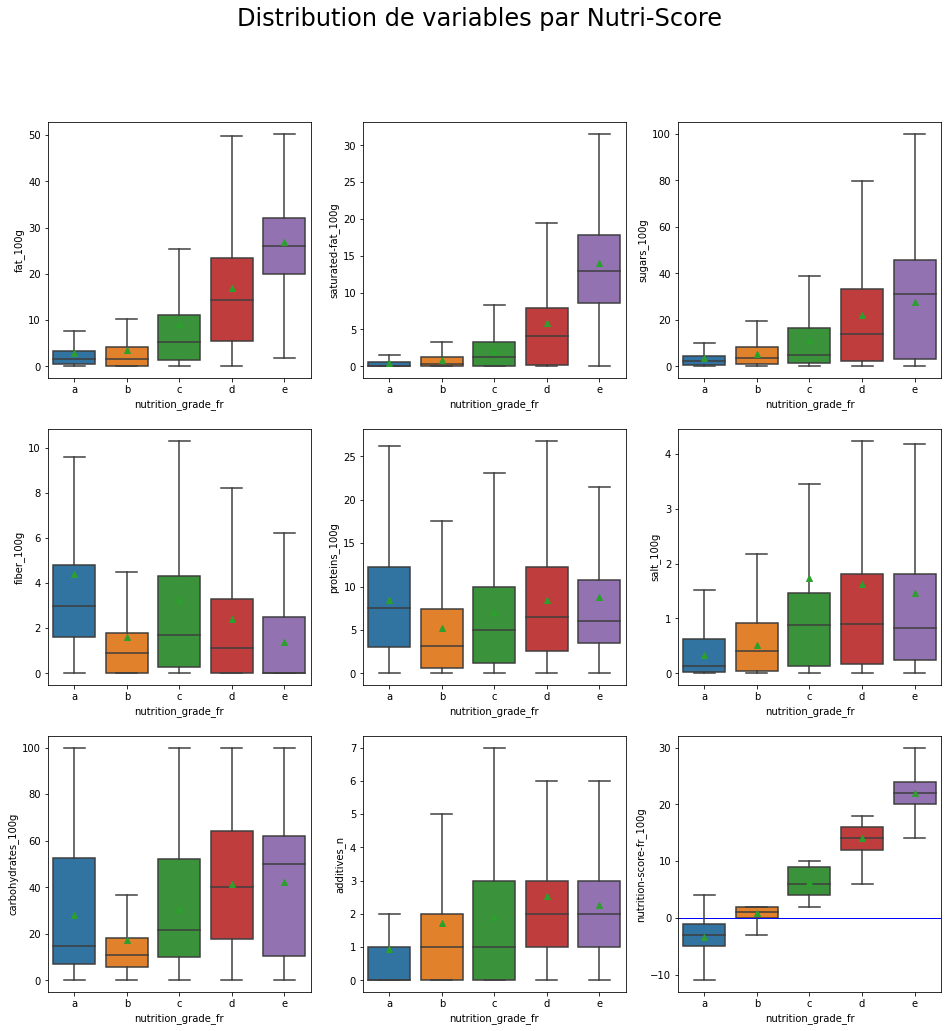

In [168]:
# Check suite à la suppression de doublons.

nutriscore_by_nutriment_boxplot(
    dataframe=clean_data, 
    cat_column='nutrition_grade_fr', 
    num_column=nutri_cols, 
    order_values=NUTRI_GRADES
)

# 4. Analyse exploratoire

In [169]:
nutrition_data=clean_data.copy()

In [170]:
nutrition_data.shape

(160487, 20)

## 4.1 Analyse uni-variée

Nous allons commencer par vérifier le nombre de modalités / valeurs par variable :

In [171]:
for key, value in nutrition_data.iteritems():
    print("{} ------> {}".format(key,len(nutrition_data[key].unique())))

code ------> 160487
url ------> 160487
last_modified_datetime ------> 98811
product_name ------> 160487
brands ------> 34992
additives_n ------> 31
additives ------> 124188
nutrition_grade_fr ------> 5
energy_100g ------> 3490
fat_100g ------> 3099
saturated-fat_100g ------> 2049
carbohydrates_100g ------> 4998
sugars_100g ------> 3752
fiber_100g ------> 930
proteins_100g ------> 2307
salt_100g ------> 4679
sodium_100g ------> 4446
nutrition-score-fr_100g ------> 54
cat_1 ------> 10
cat_2 ------> 37


### 4.1.1 Variables numériques

In [172]:
nutrition_data.describe().T

count         mean         std   min        25%  \
additives_n              160487.0     1.984049    2.500002   0.0    0.00000   
energy_100g              160487.0  1185.366122  748.272786   0.0  487.00000   
fat_100g                 160487.0    13.017441   15.109342   0.0    1.40000   
saturated-fat_100g       160487.0     5.056625    7.623199   0.0    0.00000   
carbohydrates_100g       160487.0    33.664582   27.471481   0.0    8.85000   
sugars_100g              160487.0    15.454338   19.988121   0.0    1.37000   
fiber_100g               160487.0     2.571996    4.199601   0.0    0.00000   
proteins_100g            160487.0     7.728320    7.951085   0.0    2.08000   
salt_100g                160487.0     1.251340    4.056943   0.0    0.10000   
sodium_100g              160487.0     0.499285    1.705397   0.0    0.03937   
nutrition-score-fr_100g  160487.0     9.325646    9.031951 -14.0    1.00000   

                              50%          75%     max  
additives_n                 1.000     3.000000    31.0  
energy_100g              1197.000  1732.000000  3887.0  
fat_100g                    7.400    21.430000   100.0  
saturated-fat_100g          1.800     7.140000   100.0  
carbohydrates_100g         25.800    57.140000   100.0  
sugars_100g                 5.450    24.440000   100.0  
fiber_100g                  1.200     3.300000   100.0  
proteins_100g               5.800    10.710000   100.0  
salt_100g                   0.635     1.358900   100.0  
sodium_100g                 0.250     0.535433    83.0  
nutrition-score-fr_100g    10.000    16.000000    40.0

Tout d'abord, examinons la distribution de toutes les variables numériques : 

**Variables continues**

In [173]:
numeric_var=nutrition_data.select_dtypes(include=np.number)

=> Distribution de la variable "additives_n"
=> Skewness : 2.4485966550027016


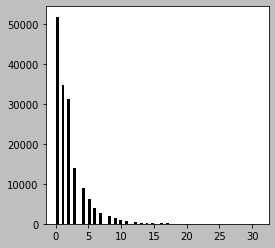

=> Distribution de la variable "energy_100g"
=> Skewness : 0.26443921716424584


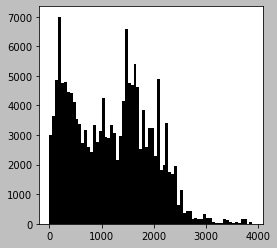

=> Distribution de la variable "fat_100g"
=> Skewness : 1.8503721588117348


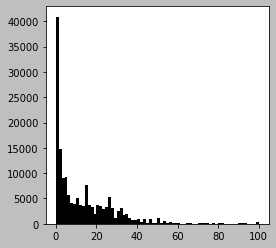

=> Distribution de la variable "saturated-fat_100g"
=> Skewness : 3.1869334413710724


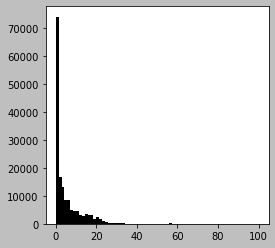

=> Distribution de la variable "carbohydrates_100g"
=> Skewness : 0.4435766696686065


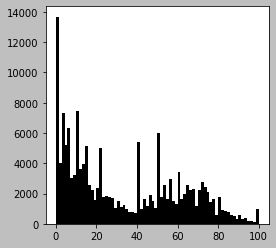

=> Distribution de la variable "sugars_100g"
=> Skewness : 1.5931370790765764


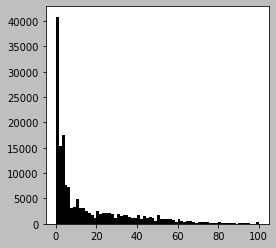

=> Distribution de la variable "fiber_100g"
=> Skewness : 5.221079630956295


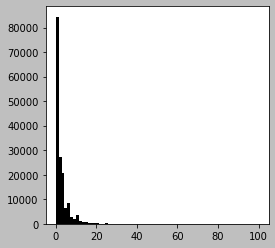

=> Distribution de la variable "proteins_100g"
=> Skewness : 2.134619203191663


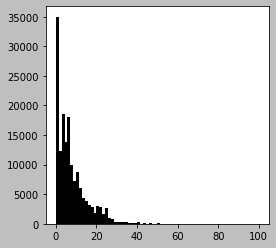

=> Distribution de la variable "salt_100g"
=> Skewness : 14.90397838751328


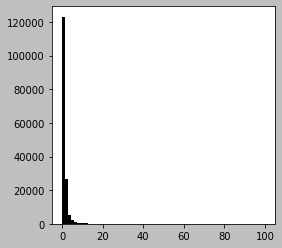

=> Distribution de la variable "sodium_100g"
=> Skewness : 16.4077565414019


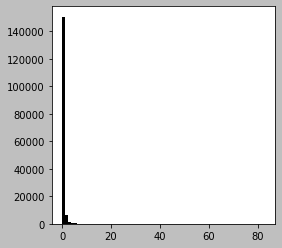

=> Distribution de la variable "nutrition-score-fr_100g"
=> Skewness : 0.1138014539747525


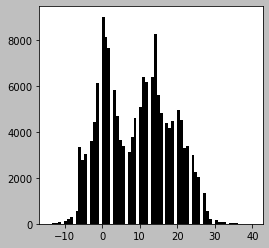

In [174]:
for col in numeric_var :
    print(f"=> Distribution de la variable \"{col}\"")
    print("=> Skewness :", numeric_var[col].skew())
    plt.style.use("grayscale")
    plt.figure(figsize=(4,4))
    plt.hist(nutrition_data[col],bins=70)
    plt.show()

La seule variable qui semblerait s'approcher de la distribution normale c'est le `nutrition-score-fr_100g`.

Nous remarquons que les autres distributions sont très étalées à droite. Cela peut signifier que leur présence dans les aliments la plus fréquente est proche de 0. C'est le cas des variables `saturated-fat_100g`, `fiber_100g`, `salt_100g` est surtout `sodium_100g` - très souvent, les aliments n'en contiennent pas.


**Variables discrètes**

Ensuite, nous allons visualiser de façon graphique la répartition des valeurs de variables discrètes suivantes : `additives_n` et `nutrition-score-fr_100g`.

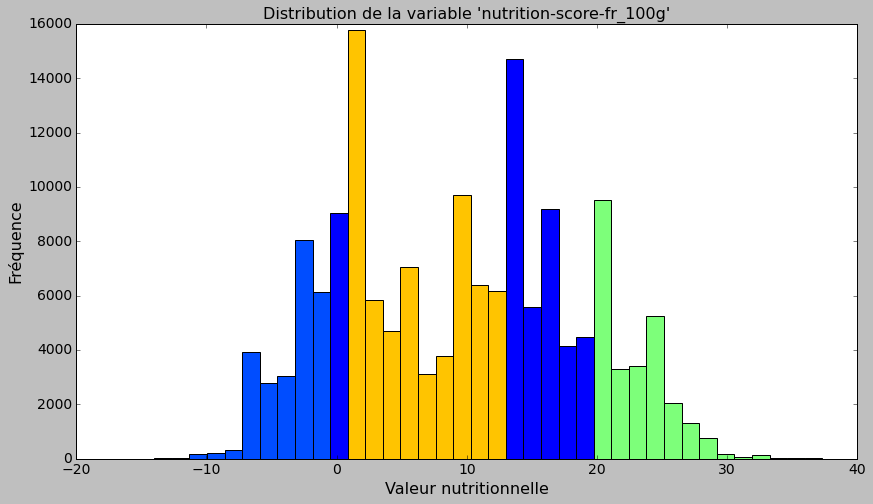

In [175]:
# Histogramme représentant la distribution de la variable 'nutrition-score-fr_100g'

plt.figure(figsize=(14,8))
plt.style.use("classic")
N, bins, patches = plt.hist(nutrition_data["nutrition-score-fr_100g"],40)

# Définition du code couleur
cmap = plt.get_cmap('jet')

low = cmap(0.5)
medium = cmap(0.2)
high = cmap(0.7)

for i in range(-15,0):
    patches[i].set_facecolor(low)
for i in range(1,10):
    patches[i].set_facecolor(medium)
for i in range(11,20):
    patches[i].set_facecolor(high)

plt.xlabel("Valeur nutritionnelle", fontsize=16)  
plt.ylabel("Fréquence", fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.title("Distribution de la variable 'nutrition-score-fr_100g'", fontsize=16)
plt.show()

Le graphique nous permet de comprendre que les scores de nutrition les plus fréquents sont ceux à 1, 13, 10 et 20.

A présent observons la distribution de la variable `additives_n` :

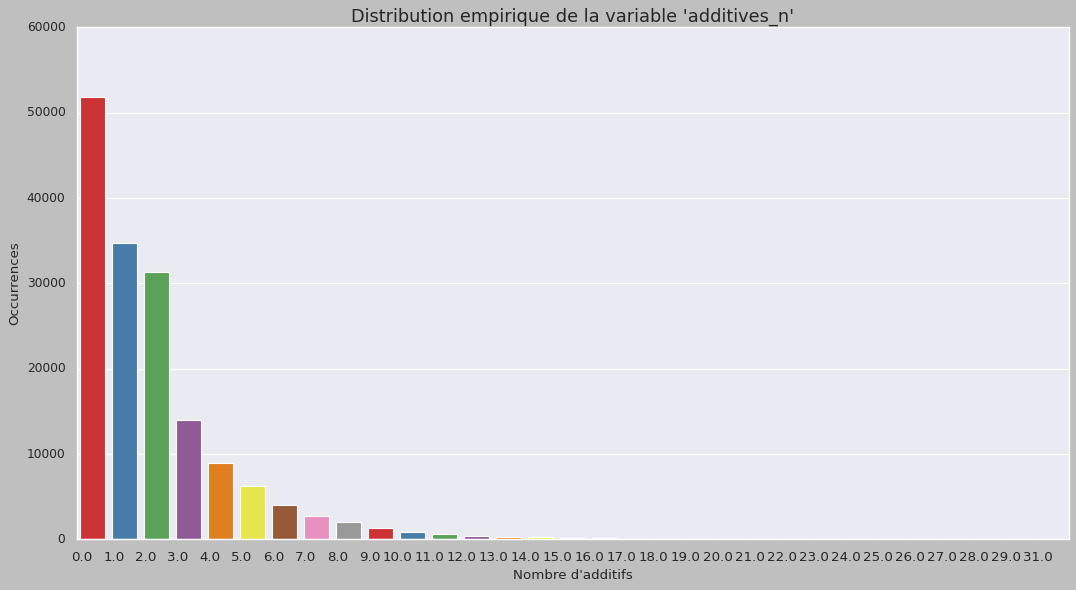

In [176]:
plt.figure(figsize=(16,8))
plt.style.use("fivethirtyeight")
sns.set_theme(style="darkgrid")
g = sns.countplot(
                x='additives_n',
                data=nutrition_data,
                palette='Set1')
g.set_xticklabels(
    g.get_xticklabels(), 
    #rotation=20, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
)
plt.ylabel('Occurrences')
plt.xlabel('Nombre d\'additifs')
plt.title("Distribution empirique de la variable 'additives_n'",fontsize=16)
plt.show()

La plupart des aliments ne contiennent aucun additif. Viennent ensuite les aliments qui en continennent 1 ou 2. Ceci est plutôt une bonne nouvelle.

### 4.1.2 Variables catégorielles

Observons les indicateurs statistiques des variables de type qualitatif :

In [177]:
nutrition_data.select_dtypes(exclude=np.number).describe(include=['object']).T

count  unique  \
code                    160487  160487   
url                     160487  160487   
last_modified_datetime  160487   98811   
product_name            160486  160486   
brands                  158461   34991   
additives               140508  124187   
nutrition_grade_fr      160487       5   
cat_1                    41297       9   
cat_2                    41386      36   

                                                                      top  \
code                                                        3229820781136   
url                     http://world-fr.openfoodfacts.org/produit/3229...   
last_modified_datetime                               2015-08-09T17:35:48Z   
product_name              Poudre cristallisée à base de bouleau - Xylitol   
brands                                                          Carrefour   
additives                [ semoule-de-ble-dur-de-qualite-superieure ->...   
nutrition_grade_fr                                                      d   
cat_1                                                       Sugary snacks   
cat_2                                                      One dish meals   

                         freq  
code                        1  
url                         1  
last_modified_datetime     21  
product_name                1  
brands                   1849  
additives                 123  
nutrition_grade_fr      45802  
cat_1                    8550  
cat_2                    3931

**Les niveaux de Nutri-Score. Variable 'nutrition_grade_fr'.**

Nous allons explorer la variable `nutrition_grade_fr`.
Dans le tableau nous allons afficher les informations concernant l'effectif, les modalités et la fréquence :

In [178]:
visualize_modal (nutrition_data, "nutrition_grade_fr")

nutrition_grade_fr      n         f
0                  d  45802  0.285394
1                  c  33731  0.210179
2                  e  31788  0.198072
3                  a  24699  0.153900
4                  b  24467  0.152455

Ci-dessous une visualisation graphique de la variable `nutrition_grade_fr`:

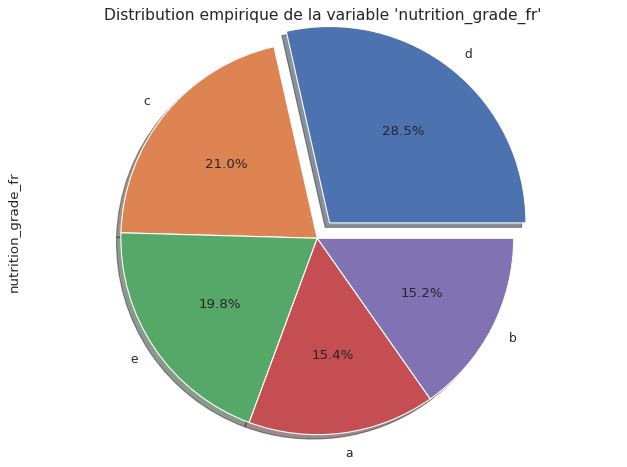

In [179]:
explode=[0.1,0,0,0,0]
nutrition_data["nutrition_grade_fr"].value_counts(normalize=True).plot(kind='pie',explode=explode,shadow=True,autopct='%1.1f%%')
plt.axis('equal') 
plt.title("Distribution empirique de la variable 'nutrition_grade_fr'",fontsize=14)
plt.tight_layout()
plt.show()

**Conclusion**

Le niveau D semble le plus représenté avec 28,5% des produits.

**Les marques. La variable 'brands'**

Même opération pour les marques. Examinons les marques les plus fréquentes. Pour cela nous ferons une extraction de données que nous afficherons ensuite à l'aide d'un barplot.

In [180]:
visualize_modal (nutrition_data, "brands")

brands     n         f
0                                 Carrefour  1849  0.011521
1                                    Auchan  1396  0.008699
2                                         U  1359  0.008468
3                              Leader Price  1051  0.006549
4                                    Casino   976  0.006081
...                                     ...   ...       ...
34986            Pita Bread & Lebanese Pita     1  0.000006
34987                 Farmer's Table Grains     1  0.000006
34988                            Castelinno     1  0.000006
34989  Fabrica De Galletas La Moderna  S.A.     1  0.000006
34990                       le bio de manon     1  0.000006

[34991 rows x 3 columns]

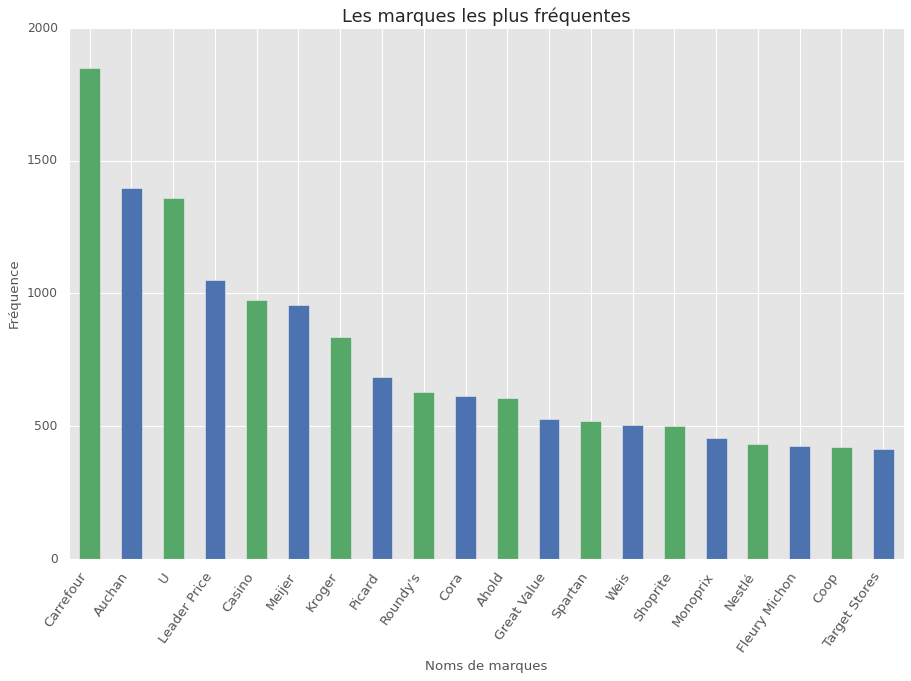

In [181]:
top_brands=nutrition_data.groupby('brands')['code'].count().sort_values(ascending=False).iloc[:20]
plt.style.use("ggplot")
color = ['g', 'b']*5
top_brands.plot(kind='bar', stacked=True, color=color, legend=False, figsize=(12, 8))
plt.title("Les marques les plus fréquentes", fontsize=16)
plt.xticks(rotation=55, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='large')
plt.xlabel('Noms de marques')
plt.ylabel('Fréquence')
plt.show()

**Conclusion**

Les 5 premières marques sont des fournisseurs français.

**Message d'erreur...**

A la création du graphique, un message d'erreur indiquant un problème de format dans le nom de la marque `P$$T` est survenu.

Nous allons corriger cette erreur à l'aide de la fonction `replace` et ensuite relancer notre countplot.  

In [182]:
nutrition_data.loc[nutrition_data.brands=='P$$T...'].head(8)

code                                                url  \
1943  11110020024  http://world-fr.openfoodfacts.org/produit/0011...   
1891  11110018625  http://world-fr.openfoodfacts.org/produit/0011...   
1892  11110018632  http://world-fr.openfoodfacts.org/produit/0011...   
1901  11110018724  http://world-fr.openfoodfacts.org/produit/0011...   
1900  11110018717  http://world-fr.openfoodfacts.org/produit/0011...   
4341  11110872210  http://world-fr.openfoodfacts.org/produit/0011...   
1898  11110018694  http://world-fr.openfoodfacts.org/produit/0011...   
1897  11110018687  http://world-fr.openfoodfacts.org/produit/0011...   

     last_modified_datetime                              product_name  \
1943   2017-03-09T12:24:12Z  P$$T..., Flavored Pasta & Sauce, Chicken   
1891   2017-03-09T14:07:37Z          P$$T..., Duplex Sandwich Cookies   
1892   2017-03-09T14:07:37Z        P$$T..., Assorted Sandwich Cookies   
1901   2017-03-09T14:07:38Z           P$$T..., Chocolate Chip Cookies   
1900   2017-03-09T14:07:39Z             P$$T..., Iced Oatmeal Cookies   
4341   2017-03-09T14:07:40Z   P$$T..., Soft Baked Dutch Cocoa Cookies   
1898   2017-03-09T14:07:40Z                  P$$T..., Oatmeal Cookies   
1897   2017-03-09T14:07:40Z                    P$$T..., Sugar Cookies   

       brands  additives_n                                          additives  \
1943  P$$T...         10.0   [ enriched-macaroni-product -> en:enriched-ma...   
1891  P$$T...          5.0   [ enriched-bleached-wheat-flour -> en:enriche...   
1892  P$$T...          6.0   [ enriched-bleached-wheat-flour -> en:enriche...   
1901  P$$T...          5.0   [ enriched-flour -> en:enriched-flour  ]  [ f...   
1900  P$$T...          4.0   [ enriched-flour -> en:enriched-flour  ]  [ f...   
4341  P$$T...          3.0   [ enriched-bleached-wheat-flour -> en:enriche...   
1898  P$$T...          4.0   [ enriched-flour -> en:enriched-flour  ]  [ f...   
1897  P$$T...          5.0   [ enriched-flour -> en:enriched-flour  ]  [ f...   

     nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
1943                  c       1464.0      3.33                0.00   
1891                  d       2029.0     18.18                4.55   
1892                  d       2029.0     18.18                4.55   
1901                  d       1795.0     17.86                5.36   
1900                  d       1941.0     17.86                5.36   
4341                  e       1841.0     16.00                8.00   
1898                  d       1795.0     17.86                5.36   
1897                  e       1795.0     17.86                5.36   

      carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
1943               73.33         1.67         5.0          13.33    2.45618   
1891               72.73        33.33         3.0           3.03    0.84582   
1892               72.73        33.33         3.0           3.03    0.84582   
1901               60.71        21.43         0.0           3.57    0.90678   
1900               64.29        21.43         3.6           7.14    0.99822   
4341               72.00        36.00         0.0           4.00    0.86360   
1898               57.14        21.43         3.6           7.14    0.99822   
1897               60.71        25.00         0.0           3.57    0.99822   

      sodium_100g  nutrition-score-fr_100g cat_1 cat_2  
1943        0.967                      9.0   NaN   NaN  
1891        0.333                     16.0   NaN   NaN  
1892        0.333                     16.0   NaN   NaN  
1901        0.357                     17.0   NaN   NaN  
1900        0.393                     13.0   NaN   NaN  
4341        0.340                     22.0   NaN   NaN  
1898        0.393                     13.0   NaN   NaN  
1897        0.393                     19.0   NaN   NaN

In [183]:
nutrition_data=nutrition_data.replace(to_replace=r'^P\$\$T', value='Psst', regex=True)
#Au passage, nous allons glisser un autre correctif :
nutrition_data=nutrition_data.replace(to_replace=r'herdhey\'s', value='Hershey\'s', regex=True)

In [184]:
# Relancer la fonction qui supprime les noms de marques introduites en tant que noms de produits
check_product_names(nutrition_data, "product_name")

176023            Giant
275777        Carrefour
209081           Auchan
218797           Picard
292012           Nestlé
193525    Fleury Michon
263198         Alnatura
200352           Casino
216024     Leader Price
242560    Marque Repère
Name: product_name, dtype: object

**Les catégories de produits. Variable 'cat_1'**

Explorons les catégories des produits. Quels sont les produits les plus fréquents ?

In [185]:
top_cat=nutrition_data.groupby('cat_1')['code'].count().sort_values(ascending=False)
top_cat

cat_1
Sugary snacks              8550
Milk and dairy products    5810
Cereals and potatoes       5458
Composite foods            4891
Fish meat eggs             4402
Beverages                  4393
Fruits and vegetables      3182
Fat and sauces             2706
Salty snacks               1905
Name: code, dtype: int64

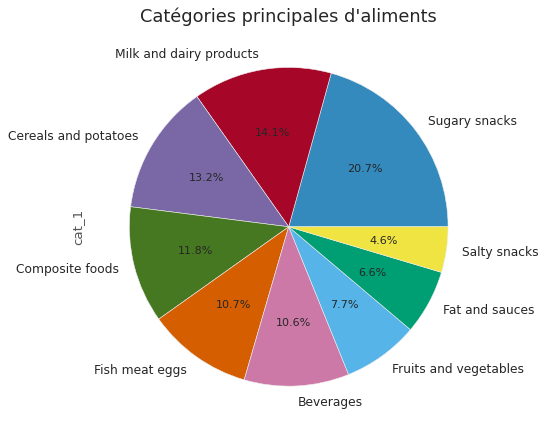

In [186]:
#plt.figure(figsize=(8,8))
plt.style.use("bmh")
nutrition_data.cat_1.value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Catégories principales d'aliments", fontsize=16)
plt.show()

**Conclusion**

La catégorie la plus représentée sont les snacks sucrés - environ 21% des produits.
Il est à noter que la catégorie la moins représentée sont les snacks salés, leur nombre est de 1905 produits (versus 8550 snacks sucrés).

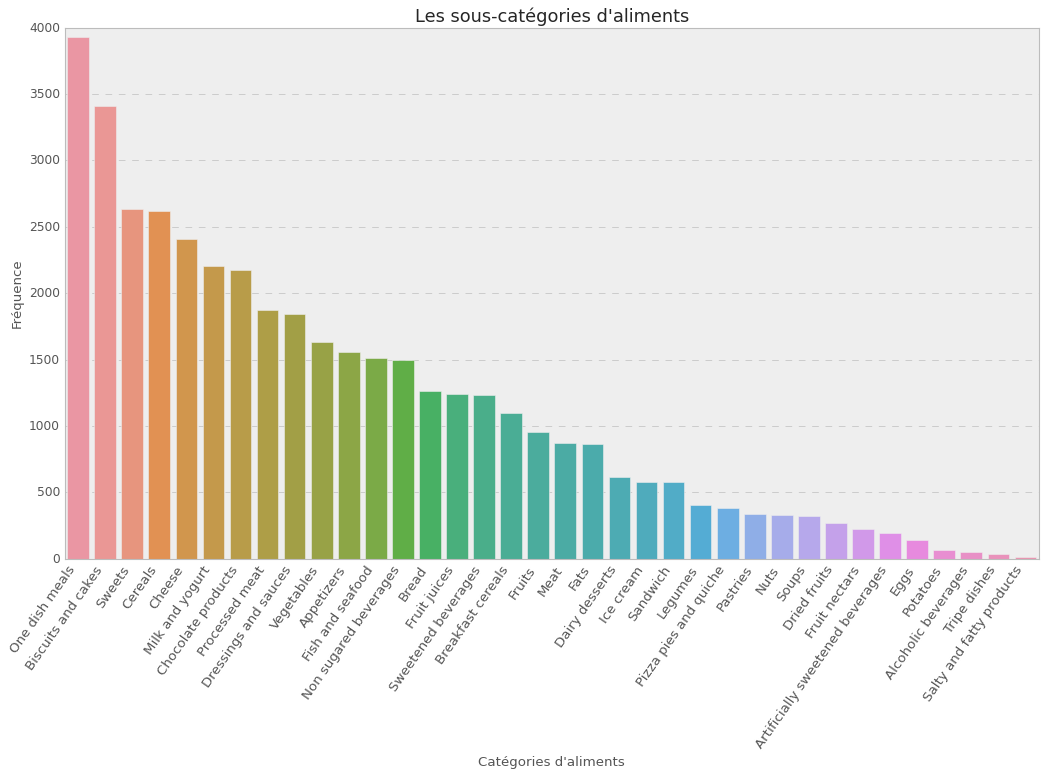

In [187]:
by_cat=nutrition_data['cat_2'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(x=by_cat.index,
            y=by_cat.values)

plt.title("Les sous-catégories d\'aliments", fontsize=16)
plt.xticks(rotation=55, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='large')
plt.xlabel('Catégories d\'aliments')
plt.ylabel('Fréquence')
plt.show()

**Conclusion**

La sous-catégorie la plus représentée sont les petits plats tout faits. Chose que nous n'avons pas vue sur le camembert (seulement en 4ème position).

Sinon, sans surprise, dans les produits les plus nombreux (ceux dépassant 2000 items) se trouvent les sous-catégories correspondant au 3 premières catégories du graphique précédent.

Très peu d'items dans les sous-catégories suivantes : oeufs, pommes de terre, boissons alcoolisées, aliments à base d'intestins (tripes, boudins etc) et popcorn.

In [188]:
nutrition_data[(nutrition_data['cat_2']=="One dish meals")].head()

code                                                url  \
189792  3036810350087  http://world-fr.openfoodfacts.org/produit/3036...   
200247  3222472465768  http://world-fr.openfoodfacts.org/produit/3222...   
187200  3011360023797  http://world-fr.openfoodfacts.org/produit/3011...   
276023  5400111143637  http://world-fr.openfoodfacts.org/produit/5400...   
206792  3250391461691  http://world-fr.openfoodfacts.org/produit/3250...   

       last_modified_datetime                        product_name  \
189792   2012-08-06T19:24:33Z  Velouté de légumes Liebig PurSoup'   
200247   2012-08-06T19:28:10Z                     Velouté légumes   
187200   2012-09-16T17:44:39Z      Douceurs d'épinards au boursin   
276023   2012-09-29T14:10:56Z                 Légumes et croûtons   
206792   2012-11-03T16:29:11Z              P'tites Ailes barbecue   

                             brands  additives_n  \
189792                       Liebig          1.0   
200247                       casino          0.0   
187200                        knorr          2.0   
276023                     Delhaize          6.0   
206792  Volaé,Sélection Intermarché          1.0   

                                                additives nutrition_grade_fr  \
189792   [ eau -> fr:eau  ]  [ legumes -> fr:legumes  ...                  c   
200247   [ eau -> fr:eau  ]  [ legumes-35 -> fr:legume...                  c   
187200   [ eau -> fr:eau  ]  [ legumes-27 -> fr:legume...                  c   
276023   [ sirop-de-glucose-deshydrate -> fr:sirop-de-...                  c   
206792   [ ailes-de-poulet-79 -> fr:ailes-de-poulet-79...                  d   

        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
189792        176.0       2.0                 1.1                 5.3   
200247        160.0       0.9                 0.4                 6.3   
187200        280.0       5.0                 3.5                 3.5   
276023        152.0       1.0                 0.2                 6.3   
206792        853.0      11.0                 5.1                 4.6   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
189792          2.4         1.0            0.7     0.7874         0.31   
200247          1.6         0.7            0.8     0.7620         0.30   
187200          0.9         0.7            2.0     0.7112         0.28   
276023          3.6         0.3            0.4     1.0160         0.40   
206792          2.3         1.1           21.7     1.4732         0.58   

        nutrition-score-fr_100g            cat_1           cat_2  
189792                      3.0  Composite foods  One dish meals  
200247                      3.0  Composite foods  One dish meals  
187200                      5.0  Composite foods  One dish meals  
276023                      4.0  Composite foods  One dish meals  
206792                     12.0  Composite foods  One dish meals

## 4.2 Analyse bi-variée

A présent, nous allons comparer les variables entre elles afin d'identifier d'éventuelles corrélations.

### 4.2.1 Variables numériques

Dans un premier temps comparons les variables qui sembleraient concordées :

* le sel et le sodium
* les graisses vs l'apport énergétique
* Nutrition Score vs l'apport énergétique

Ensuite, nous analyserons la corrélation entre les sucres et les protéines.

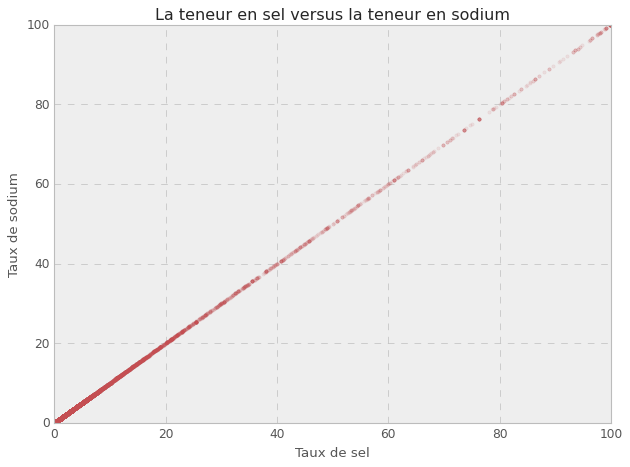

In [189]:
# Visualisation de la covariance des deux variables
plt.plot(nutrition_data["salt_100g"],nutrition_data["salt_100g"],'.',c="r", alpha=0.1)
plt.title("La teneur en sel versus la teneur en sodium")
plt.ylabel("Taux de sodium")
plt.xlabel("Taux de sel")
plt.show()

Nous voyons que les deux variables sont parfaitement corrélées ! La courbe est tellement homogène qu'elle ressemble à une ligne droite. Nous pouvons en déduire que la corrélation entre le sel et le sodium est positive et très forte.

Par la suite, nous allons visualiser les relations - à priori - moins étroites :

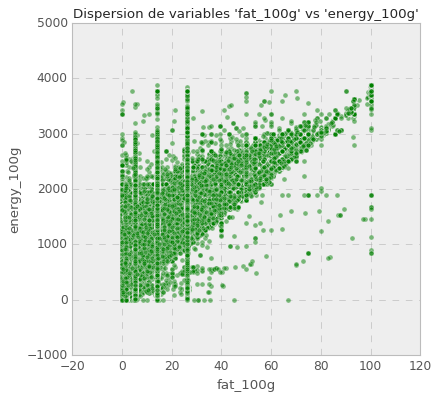

In [190]:
value_dispersion (df=nutrition_data, ft1="fat_100g", ft2="energy_100g")

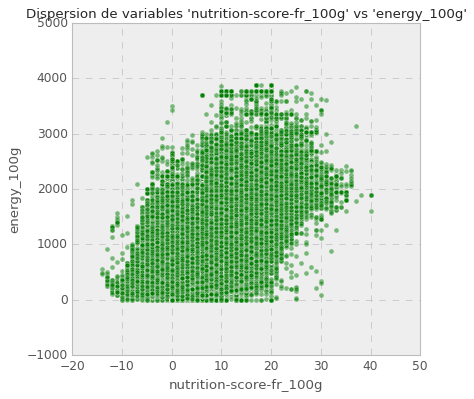

In [191]:
value_dispersion (df=nutrition_data, ft1="nutrition-score-fr_100g", ft2="energy_100g")

**Conclusion**


Les paires de variables semblent être corrélées : quand les valeurs de l'une des variables augmentent, les valeurs de l'autre variable suivent.

Examinons à présent la courbe qui va se dessiner pour définir la relation entre les variables suivantes :
* taux de sel vs taux d'apport énergétique
* taux de sucres vs taux de protéines

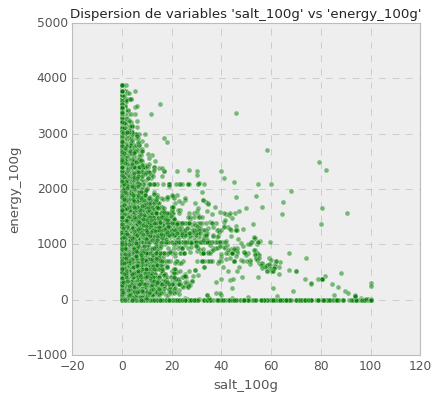

In [192]:
value_dispersion (df=nutrition_data, ft1="salt_100g", ft2="energy_100g")

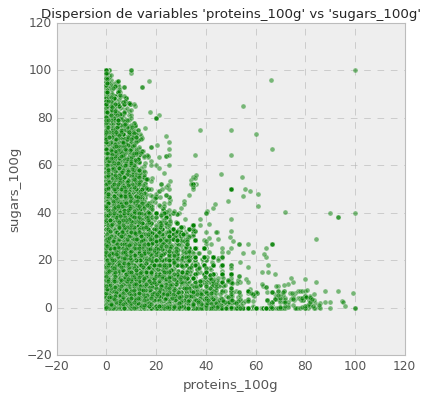

In [193]:
value_dispersion (df=nutrition_data, ft1="proteins_100g", ft2="sugars_100g")

**Conclusion**

Aucune tendance ne se dégage. Etant donné la dispersion des points, nous pouvons constater qu'aucune relation n'existe entre les deux dernières paires de variables.

### 4.2.2 Variables catégorielles vs numériques

**Les graisses versus le Nutri-Score**

Essayons de comparer la variable `nutrition_grade_fr` avec `fat_100g` :

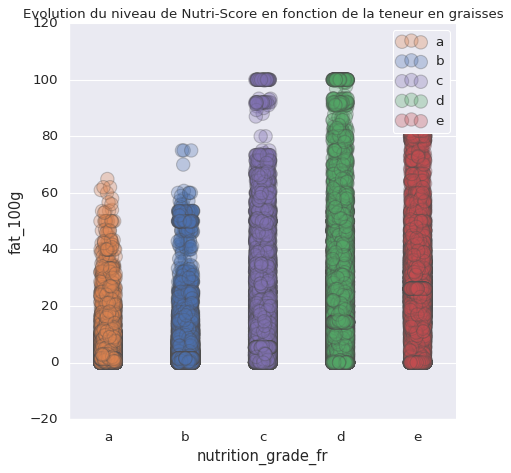

In [194]:
sns.set(style='darkgrid', font_scale=1.1)
nutrigrades_order=NUTRI_GRADES

g=sns.catplot(y='fat_100g', x='nutrition_grade_fr', 
              hue='nutrition_grade_fr', 
              order=nutrigrades_order,
              alpha=0.3,
              s=12,
              linewidth=1,
              height=6,
              kind="strip",
              data=nutrition_data)
plt.title("Evolution du niveau de Nutri-Score en fonction de la teneur en graisses", fontsize=12)
plt.legend(labels=nutrigrades_order)
plt.show()

Le graphique montre une forte corrélation entre la teneur en graisses et le niveau de Nutri-Score. La tendance est décroissante : moins de graisses il y a, plus la note est élevée.

**Répartition du nombre d'additifs par type de produits.**

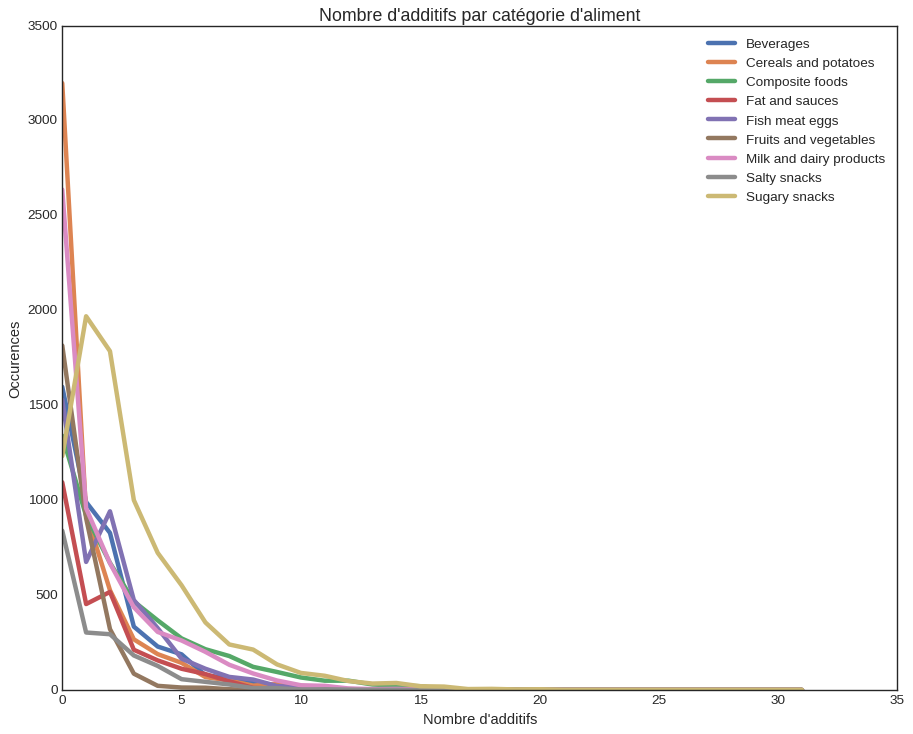

In [195]:
plt.style.use("seaborn-white")
pd.crosstab(nutrition_data['additives_n'],nutrition_data['cat_1']).plot.line(figsize=(12,10), 
                                                                             lw=4, 
                                                                             stacked=False)

plt.xticks(rotation=0)
plt.title("Nombre d'additifs par catégorie d'aliment", fontsize=16)
plt.legend()
plt.ylabel('Occurences')
plt.xlabel('Nombre d\'additifs')
plt.show()

Plusieurs observations venant du rendu ci-dessus :
* globalement le nombre d'additifs n'est pas très élevé
* la plupart des aliments en contiennent entre 0 et 5
* les aliments qui contiennent un nombre d'additifs allant jusqu'à 30 sont les snacks sucrés

Comparons les résultats affichés sur le graphique avec les chiffres :

In [196]:
pd.crosstab(nutrition_data['additives_n'],nutrition_data['cat_1'])

cat_1        Beverages  Cereals and potatoes  Composite foods  Fat and sauces  \
additives_n                                                                     
0.0               1598                  3199             1340            1095   
1.0                991                   928              918             453   
2.0                828                   526              670             517   
3.0                334                   267              467             212   
4.0                229                   189              367             156   
5.0                188                   143              272             112   
6.0                 77                    68              215              84   
7.0                 63                    50              179              46   
8.0                 43                    23              122              11   
9.0                 23                    31               95               7   
10.0                12                    16               66               6   
11.0                 4                     4               49               0   
12.0                 3                     3               49               5   
13.0                 0                     4               29               2   
14.0                 0                     4               23               0   
15.0                 0                     1               20               0   
16.0                 0                     0                5               0   
17.0                 0                     2                3               0   
18.0                 0                     0                1               0   
19.0                 0                     0                1               0   
20.0                 0                     0                0               0   
21.0                 0                     0                0               0   
31.0                 0                     0                0               0   

cat_1        Fish meat eggs  Fruits and vegetables  Milk and dairy products  \
additives_n                                                                   
0.0                    1530                   1816                     2638   
1.0                     675                    906                      958   
2.0                     942                    321                      668   
3.0                     474                     86                      436   
4.0                     326                     22                      306   
5.0                     165                     13                      261   
6.0                     112                     12                      201   
7.0                      69                      4                      133   
8.0                      55                      1                       87   
9.0                      21                      0                       50   
10.0                     14                      1                       25   
11.0                     10                      0                       22   
12.0                      2                      0                        8   
13.0                      4                      0                        5   
14.0                      0                      0                        6   
15.0                      2                      0                        4   
16.0                      1                      0                        0   
17.0                      0                      0                        2   
18.0                      0                      0                        0   
19.0                      0                      0                        0   
20.0                      0                      0                        0   
21.0                      0                      0                        0   
31.0                      0                      0                        0   

Le tableau croisant les deux modalités semble confirmer nos hypothèses. De plus :
* Sans surprise, les aliments qui contiennent le plus d'additifs sont :
    * Composite foods
    * Sugary snacks
    
* Très peu de produits alimentaires contenant plus de 10 additifs.
* Six snacks sucrés contenants 20 et plus additifs, les voilà : 

In [197]:
nutrition_data[(nutrition_data['additives_n']>19) & (nutrition_data['cat_1']=='Sugary snacks')]

code                                                url  \
184731       26026503  http://world-fr.openfoodfacts.org/produit/2602...   
298538  7622210320261  http://world-fr.openfoodfacts.org/produit/7622...   
184345  2600280009649  http://world-fr.openfoodfacts.org/produit/2600...   
217364  3263859921019  http://world-fr.openfoodfacts.org/produit/3263...   
314933  8713600285846  http://world-fr.openfoodfacts.org/produit/8713...   
296831  7616700201239  http://world-fr.openfoodfacts.org/produit/7616...   

       last_modified_datetime                          product_name  \
184731   2014-08-19T11:36:02Z                   Confiserie assortie   
298538   2015-02-24T02:14:46Z  Napolitain signature chocolat orange   
184345   2016-05-01T14:05:02Z                            Confiserie   
217364   2016-07-13T20:16:40Z     Eclairs au Café & parfum Chocolat   
314933   2016-07-30T06:43:23Z                 Take away Candy Sushi   
296831   2017-03-21T19:46:53Z        Tourte Suédoise aux Framboises   

              brands  additives_n  \
184731   Petit furet         21.0   
298538            LU         20.0   
184345   sans marque         31.0   
217364  Leader Price         20.0   
314933   Look-o-look         20.0   
296831        Migros         20.0   

                                                additives nutrition_grade_fr  \
184731   [ sucre -> fr:sucre  ]  [ sirop-de-glucose ->...                  d   
298538   [ sucre -> fr:sucre  ]  [ huile-de-palme -> f...                  e   
184345   [ ingredients -> fr:ingredients  ]  [ sirops-...                  d   
217364   [ eclair-au-cafe -> fr:eclair-au-cafe  ]  [ e...                  d   
314933   [ sucre -> fr:sucre  ]  [ sirop-de-glucose ->...                  d   
296831   [ massepain-24 -> fr:massepain-24  ]  [ masse...                  d   

        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
184731       1555.0       3.7                 3.5                80.0   
298538       1895.0      24.0                11.0                56.0   
184345       1702.0       6.9                 4.0                83.2   
217364       1253.0      12.5                 6.4                41.0   
314933       1457.0       0.9                 0.6                81.0   
296831       1315.0      12.0                 7.0                46.0   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
184731         64.0         0.9            2.5    0.07620     0.030000   
298538         40.0         2.2            3.9    0.44958     0.177000   
184345         83.2         1.1            1.9    0.16000     0.062992   
217364         30.0         1.1            4.5    0.40000     0.157480   
314933         61.0         1.1            3.3    0.19000     0.074803   
296831         35.0         0.5            5.0    0.21000     0.082677   

        nutrition-score-fr_100g          cat_1               cat_2  
184731                     16.0  Sugary snacks              Sweets  
298538                     21.0  Sugary snacks  Biscuits and cakes  
184345                     18.0  Sugary snacks              Sweets  
217364                     16.0  Sugary snacks  Biscuits and cakes  
314933                     14.0  Sugary snacks              Sweets  
296831                     16.0  Sugary snacks  Biscuits and cakes

**La valeur du Nutri-Score versus le niveau attribué**

Essayons d'explorer les variables `nutrition_grade_fr` et `nutrition-score-fr_100g`. Dans un premier temps une vue tableau :

In [198]:
pd.pivot_table(nutrition_data, index='nutrition_grade_fr', values='nutrition-score-fr_100g', aggfunc='median')

nutrition-score-fr_100g
nutrition_grade_fr                         
a                                      -3.0
b                                       1.0
c                                       6.0
d                                      14.0
e                                      22.0

Les valeurs semblent conformément réparties en fonction de la valeur nutritionnelle. Regardons les valeurs un peu plus en détail :

In [199]:
Y = "nutrition_grade_fr"
X = "nutrition-score-fr_100g"

contingence_tab = nutrition_data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contingence_tab.T

nutrition-score-fr_100g  -14.0  -13.0  -12.0  -11.0  -10.0   -9.0   -8.0  \
nutrition_grade_fr                                                         
a                          3.0   17.0   38.0   69.0  118.0  228.0  317.0   
b                          NaN    NaN    NaN    NaN    2.0    NaN    1.0   
c                          NaN    NaN    NaN    NaN    NaN    NaN    NaN   
d                          NaN    NaN    NaN    NaN    NaN    NaN    NaN   
e                          NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Total                      3.0   17.0   38.0   69.0  120.0  228.0  318.0   

nutrition-score-fr_100g   -7.0    -6.0    -5.0  ...  31.0  32.0  33.0  34.0  \
nutrition_grade_fr                              ...                           
a                        566.0  3363.0  2775.0  ...   NaN   NaN   NaN   NaN   
b                          NaN     6.0    12.0  ...   NaN   NaN   NaN   NaN   
c                          NaN     NaN     NaN  ...   NaN   NaN   NaN   NaN   
d                          NaN     NaN     NaN  ...   NaN   NaN   NaN   NaN   
e                          NaN     NaN     NaN  ...  64.0  57.0  71.0  15.0   
Total                    566.0  3369.0  2787.0  ...  64.0  57.0  71.0  15.0   

nutrition-score-fr_100g  35.0  36.0  37.0  38.0  40.0     Total  
nutrition_grade_fr                                               
a                         NaN   NaN   NaN   NaN   NaN   24699.0  
b                         NaN   NaN   NaN   NaN   NaN   24467.0  
c                         NaN   NaN   NaN   NaN   NaN   33731.0  
d                         NaN   NaN   NaN   NaN   NaN   45802.0  
e                        28.0  14.0   2.0   1.0   4.0   31788.0  
Total                    28.0  14.0   2.0   1.0   4.0  160487.0  

[6 rows x 55 columns]

Nous constatons un grand nombre de NaN. Essayons de visualiser la relation entre les deux variables par moyen d'un pairplot :

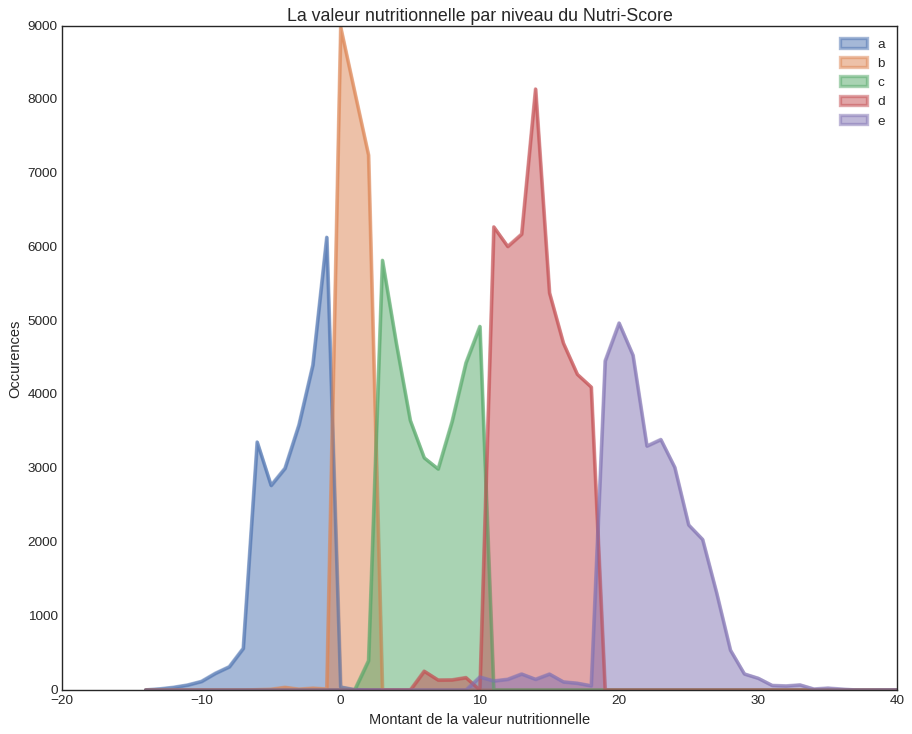

In [200]:
pd.crosstab(nutrition_data['nutrition-score-fr_100g'],nutrition_data['nutrition_grade_fr']).plot.area(figsize=(12,10), 
                                                                             lw=3, 
                                                                             stacked=False)
plt.title("La valeur nutritionnelle par niveau du Nutri-Score", fontsize=16)
plt.legend()
plt.ylabel('Occurences')
plt.xlabel('Montant de la valeur nutritionnelle')
plt.show()

Les valeurs nutritionnelles semblent être réparties conformément à la définition du calcul du Nutri-Score :

* A : une valeur comprise entre –15 et –2, 
* B : de –1 à +3, 
* C : de +4 à +11, 
* D : de +12 à +16
* E : de +17 à +408. 


### 4.2.3 Variables catégorielles

**Le niveau de Nutri-Score versus le type d'aliment**

Vérifions la relation entre le niveau du Nutri-Score et la catégorie de produit alimentaire. 
Un barplot nous aidera à visualiser cette relation.

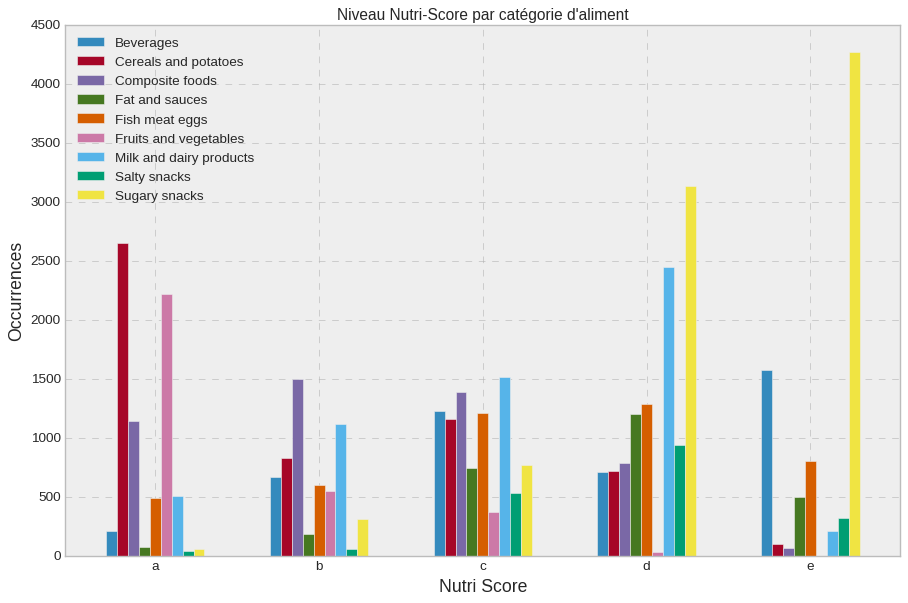

In [201]:
plt.style.use("bmh")
pd.crosstab(nutrition_data['nutrition_grade_fr'],nutrition_data['cat_1']).plot(kind='bar', width=.6,figsize=(12,8))
plt.xticks(rotation=0)
plt.title("Niveau Nutri-Score par catégorie d'aliment", fontsize=14)
plt.legend(loc='best')
plt.ylabel('Occurrences')
plt.xlabel('Nutri Score')
plt.show()

**Conclusions :**

La répartition des aliments par niveau de Nutri-Score est conforme aux attentes :

1. Nutri-Score A :
    * 'Cereals and potatoes'
    * 'Fruits and vegetables'
    
    
2. Nutri-Score D :
    * 'Sugary snacks'
    * 'Milk and dairy products'
    
    
3. Nutri-Score E :
    * 'Sugary snacks'
    * 'Beverages'

On observe également une tendance parfaitement croissante pour les barres jaunes ('Snacks sucrés') et parfaitement décroissante pour les barres roses ('Fruits & légumes').

Ci-dessous une vérification de notre hypothèse - un graphique présentant les sous-catégories d'aliments cette-fois et leur niveau de Nutri-Score.

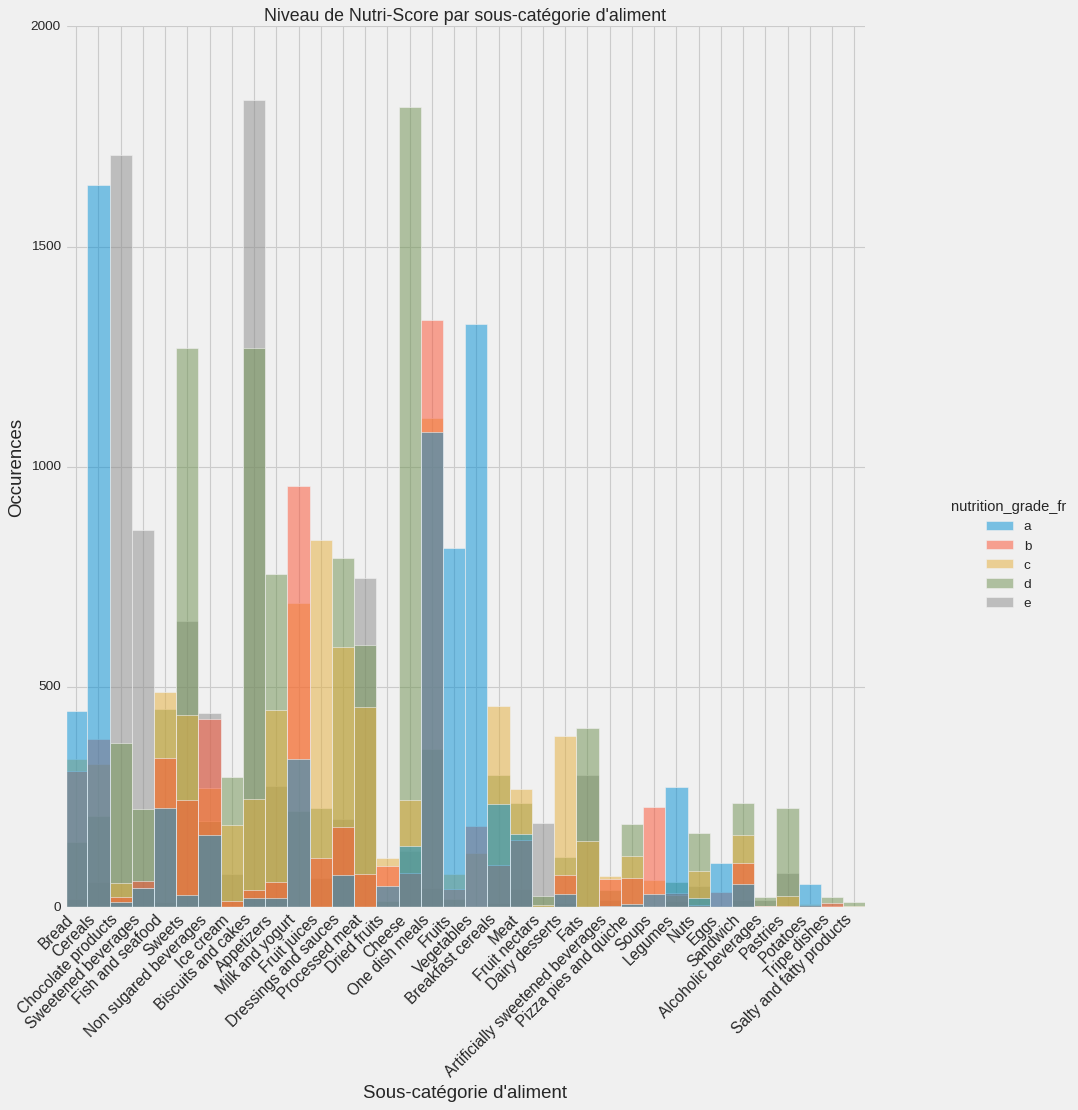

In [202]:
plt.style.use("fivethirtyeight")
sns.displot(nutrition_data, x="cat_2", hue="nutrition_grade_fr", hue_order=nutrigrades_order, height=12)
plt.xticks(rotation=45, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='medium')
plt.title("Niveau de Nutri-Score par sous-catégorie d'aliment", fontsize=16)
plt.ylabel('Occurences')
plt.xlabel('Sous-catégorie d\'aliment')
plt.show()

Le graphique permet de distinguer les principales sous-catégories d'aliments faisant partie des niveaux de Nutri-Score respectifs. Cette classification correspond à celle des grandes catégories de produits.

1. Nutri-Score A :
    * 'Cereals'
    * 'Fruits
    * 'Vegetables'
    * 'Legumes'
    * 'Potatoes'
    * 'Eggs'


2. Nutri-Score B :
    * 'Milk and yogurt'
    * 'Soups'
    * 'Non sugared beverages'


3. Nutri-Score C :
    * 'Fruit juices'
    * 'Dairy deserts'


4. Nutri-Score D :
    * 'Cheese'
    * 'Sweets'
    * 'Biscuits and cakes'
    * 'Pastries'
    * 'Nuts'
    * 'Fats'


5. Nutri-Score E :
    * 'Chocolate products'
    * 'Sweetended Beverages'
    * 'Fruit nectars'

**Le niveau de Nutri-Score versus les substances nutritives**

Nous allons maintenant répondre à la question suivante : comment sont réparties les substances nutritives par rapport aux niveaux de Nutri-Score ?

Un premier coup d'oeil grâce à une table :

In [203]:
nutri_cols_pos=["proteins_100g","fiber_100g"]
nutri_cols_neg=["fat_100g","saturated-fat_100g","sugars_100g","carbohydrates_100g","salt_100g","additives_n"]

In [204]:
pd.pivot_table(nutrition_data, index='nutrition_grade_fr', values=nutri_cols_neg, aggfunc='median').T

nutrition_grade_fr      a        b      c      d      e
additives_n          0.00   1.0000   1.00   2.00   2.00
carbohydrates_100g  14.54  10.8300  21.69  40.00  50.00
fat_100g             1.50   1.5000   5.34  14.29  26.10
salt_100g            0.13   0.4064   0.88   0.90   0.83
saturated-fat_100g   0.10   0.3000   1.33   4.12  13.00
sugars_100g          2.40   3.5400   4.70  14.00  31.03

Nous observons deux tendances : 
* Croissante : 
    * Caractérise les substances nutritives à **favoriser** : 
        * une forte teneur au niveau A
        * une tendance décroissante vers le niveau E
* Déroissante :
    * Caractérise les substances nutritives à **limiter** : 
        * une faible teneur au niveau A
        * une tendance croissante vers le niveau E
        
        
Nous remarquons cependant une certaine incohérence parmi les niveaux Nutri-Scores suivants : 
* salt_100g => niveau E
* carbohydrates_100g => niveau A
* saturated-fat_100g => niveau D

Vérifions les produits contenant du sel et classés dans la catégorie E :

In [205]:
by_nutri_score=nutrition_data[nutrition_data['nutrition_grade_fr']=='e']
pd.pivot_table(by_nutri_score, index=['product_name'], values="salt_100g", aggfunc='median').head(20)

salt_100g
product_name                                                 
 Beeren schokoliert                                   0.30000
 Biscuit Tablette Chocolat au Lait bio                0.53000
 Chunky                                               0.19000
 Crac noisettes                                       1.80000
 Fantaisie au cacao fourré de crème (noisette, ...    0.49000
 Frey Chocolat au Lait Mini/assortis                  0.11000
 Galettes bretonnes                                   0.95250
 Ginger drink                                         0.02000
 Les Ficelles aux Tomates et Fines Herbes             2.00000
 Lindt & Sprüngli Teddy                               0.20000
 Mango mix                                            0.00000
 McVitie's Digestive                                  1.52400
 Tablette Les Grandes Lait 34% Noisettes              0.08000
 Vacherin fribourgeois au lait cru                    1.60000
 la madeleine au beurre frais                         0.93000
 saucisse de Toulouse bio                             2.05000
!, Chocolate Bear Crunch Popcorn                      0.79248
!, Chocolate Gems                                     0.12192
!, Halloween Mix Whole Wheat Cookies                  0.82550
!, Malted Milk Balls                                  0.09652

La catégorie E regroupe les valeurs très différentes :
* d'un côté un produit *Mango mix* à **0.00000g de sel**
* de l'autre côté *saucisse de Toulouse bio* à	**2.05000g de sel**
    
Il pourrait s'agir de valeurs atypiques ou encore d'erreurs à l'attribution de niveaux de Nutri-Score.

## 5. Analyse multi-variée.

Dans cette partie de l'analyse nous allons explorer les données dans l'objectif d'identifier des corrélations entre les variables.

### 5.1 Variables quantitatives. Covariance. Coefficient de corrélation de Pearson.

Nous allons procéder à une analyse linéaire de corrélations. Ceci nous permettra d'identifier les variables quantitatives très corrélées (r=1), anticorrélées (r=-1) ainsi que celles sans aucune corrélation (r=0).

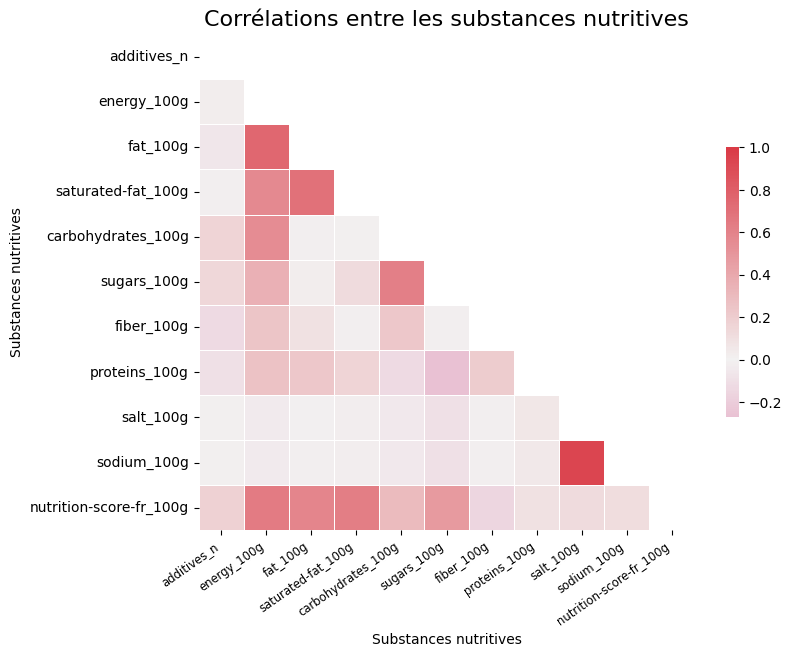

In [206]:
plt.style.use("default")
# Compute the correlation matrix
corr_matrix = nutrition_data[['additives_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
                       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
                       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']].corr()

# Generate the mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8,7))

# Generate a custom diverging colormap
cmap= sns.diverging_palette(350, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, 
            vmax=1.0, center=0, 
            square=True, linewidths=.5, 
            cbar_kws={"shrink" : .5})

plt.xlabel('Substances nutritives')
plt.ylabel('Substances nutritives')
plt.title("Corrélations entre les substances nutritives", fontsize=16)
plt.xticks(rotation=35, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='small')
plt.show()

**Conclusions**

Plusieurs conclusions à l'issue de la heatmap ci-dessus :

1. Certaines substances sont **fortement corrélées** :
    * le sel et le sodium (très proche des 100%)
    * le sucre et les glucides


2. **Le Nutri Score**  est lié aux graisses, aux graisses saturées, aux glucides, au sucre et à l'énergie (corrélation à plus de 50%)


3. **L'énergie** semble avoir un rapport très proche avec les graisses, les graisses saturées, les glucides et le sucre (environ 70%).


4. Certaines substances nutritives **ne sont pas du tout liées** aux autres (le sel, le sodium).

    
5. Certaines substances nutritives sont **anticorrélées** : les sucres et les protéines (en dessous de 0%).

Essayons d'estimer les corrélations à l'aide du test de Pearson. Le résultat **r** nous indiquera la force ainsi que la direction de corrélation des variables.

In [207]:
def test_pearson (df, ft1, ft2) :
    print(st.pearsonr(df[ft1],df[ft2]))

In [208]:
test_pearson (nutrition_data, "salt_100g", "salt_100g")

(1.0, 0.0)


In [209]:
test_pearson (nutrition_data, "fat_100g", "energy_100g")

(0.7471809493783989, 0.0)


In [210]:
test_pearson (nutrition_data, "proteins_100g", "sugars_100g")

(-0.26986373059420665, 0.0)


**Conclusions**

1. L'indicateur **r > 0** => cela signifie que la relation entre les variables est positive.
2. L'indicateur **r est supérieur à 0.5** => la corrélation entre les variables est assez forte.
3. L'indicateur **r < 0** => la relation entre les variables est négative.
3. P-value est de **0.0** =>
* si la p-value < 0.5 - la corrélation est significative d'un point de vue statistique
* si la p-value > 0.5 - la corrélation n'est pas significative d'un point de vue statistique

Ci-dessous une matrice de covariance et de corrélations de toutes les features quantitatives du jeu de données :

In [211]:
#Covariance : estime si les variables sont positivement ou négativement corrélées
round(nutrition_data.cov(),2)

additives_n  energy_100g  fat_100g  \
additives_n                     6.25        57.04     -2.33   
energy_100g                    57.04    559912.16   8447.56   
fat_100g                       -2.33      8447.56    228.29   
saturated-fat_100g             -0.40      3217.47     80.66   
carbohydrates_100g             11.26     11324.87     -8.98   
sugars_100g                     7.31      5261.79      7.64   
fiber_100g                     -1.33       784.06      5.82   
proteins_100g                  -1.84      1545.90     27.79   
salt_100g                       0.12      -120.22     -0.73   
sodium_100g                     0.04       -51.24     -0.33   
nutrition-score-fr_100g         4.02      4312.38     80.77   

                         saturated-fat_100g  carbohydrates_100g  sugars_100g  \
additives_n                           -0.40               11.26         7.31   
energy_100g                         3217.47            11324.87      5261.79   
fat_100g                              80.66               -8.98         7.64   
saturated-fat_100g                    58.11                2.84        18.98   
carbohydrates_100g                     2.84              754.68       341.48   
sugars_100g                           18.98              341.48       399.52   
fiber_100g                            -0.44               26.17        -1.16   
proteins_100g                          9.82              -26.72       -42.89   
salt_100g                             -0.79               -5.46        -8.03   
sodium_100g                           -0.33               -2.21        -3.17   
nutrition-score-fr_100g               43.46               75.07        86.97   

                         fiber_100g  proteins_100g  salt_100g  sodium_100g  \
additives_n                   -1.33          -1.84       0.12         0.04   
energy_100g                  784.06        1545.90    -120.22       -51.24   
fat_100g                       5.82          27.79      -0.73        -0.33   
saturated-fat_100g            -0.44           9.82      -0.79        -0.33   
carbohydrates_100g            26.17         -26.72      -5.46        -2.21   
sugars_100g                   -1.16         -42.89      -8.03        -3.17   
fiber_100g                    17.64           6.77      -0.26        -0.12   
proteins_100g                  6.77          63.22       1.87         0.70   
salt_100g                     -0.26           1.87      16.46         6.48   
sodium_100g                   -0.12           0.70       6.48         2.91   
nutrition-score-fr_100g       -5.88           6.72       4.33         1.75   

                         nutrition-score-fr_100g  
additives_n                                 4.02  
energy_100g                              4312.38  
fat_100g                                   80.77  
saturated-fat_100g                         43.46  
carbohydrates_100g                         75.07  
sugars_100g                                86.97  
fiber_100g                                 -5.88  
proteins_100g                               6.72  
salt_100g                                   4.33  
sodium_100g                                 1.75  
nutrition-score-fr_100g                    81.58

In [212]:
# Coefficient de corrélation : estime la force de relation entre deux variables
round(nutrition_data.corr(method='pearson'),2)

additives_n  energy_100g  fat_100g  \
additives_n                     1.00         0.03     -0.06   
energy_100g                     0.03         1.00      0.75   
fat_100g                       -0.06         0.75      1.00   
saturated-fat_100g             -0.02         0.56      0.70   
carbohydrates_100g              0.16         0.55     -0.02   
sugars_100g                     0.15         0.35      0.03   
fiber_100g                     -0.13         0.25      0.09   
proteins_100g                  -0.09         0.26      0.23   
salt_100g                       0.01        -0.04     -0.01   
sodium_100g                     0.01        -0.04     -0.01   
nutrition-score-fr_100g         0.18         0.64      0.59   

                         saturated-fat_100g  carbohydrates_100g  sugars_100g  \
additives_n                           -0.02                0.16         0.15   
energy_100g                            0.56                0.55         0.35   
fat_100g                               0.70               -0.02         0.03   
saturated-fat_100g                     1.00                0.01         0.12   
carbohydrates_100g                     0.01                1.00         0.62   
sugars_100g                            0.12                0.62         1.00   
fiber_100g                            -0.01                0.23        -0.01   
proteins_100g                          0.16               -0.12        -0.27   
salt_100g                             -0.03               -0.05        -0.10   
sodium_100g                           -0.03               -0.05        -0.09   
nutrition-score-fr_100g                0.63                0.30         0.48   

                         fiber_100g  proteins_100g  salt_100g  sodium_100g  \
additives_n                   -0.13          -0.09       0.01         0.01   
energy_100g                    0.25           0.26      -0.04        -0.04   
fat_100g                       0.09           0.23      -0.01        -0.01   
saturated-fat_100g            -0.01           0.16      -0.03        -0.03   
carbohydrates_100g             0.23          -0.12      -0.05        -0.05   
sugars_100g                   -0.01          -0.27      -0.10        -0.09   
fiber_100g                     1.00           0.20      -0.02        -0.02   
proteins_100g                  0.20           1.00       0.06         0.05   
salt_100g                     -0.02           0.06       1.00         0.94   
sodium_100g                   -0.02           0.05       0.94         1.00   
nutrition-score-fr_100g       -0.15           0.09       0.12         0.11   

                         nutrition-score-fr_100g  
additives_n                                 0.18  
energy_100g                                 0.64  
fat_100g                                    0.59  
saturated-fat_100g                          0.63  
carbohydrates_100g                          0.30  
sugars_100g                                 0.48  
fiber_100g                                 -0.15  
proteins_100g                               0.09  
salt_100g                                   0.12  
sodium_100g                                 0.11  
nutrition-score-fr_100g                     1.00

### 5.2 Variables mixtes. ANOVA.

Représentons une variable quantitative et une variable qualitative. 


Commençons par une visualisation de corrélation entre l'une des substances nutritives et le Nutri Score.
Par la suite, nous allons observer la corrélation entre chacune des substances nutritives et le niveau de Nutri-Score. 

**Apport énergétique vs catégories de produits**

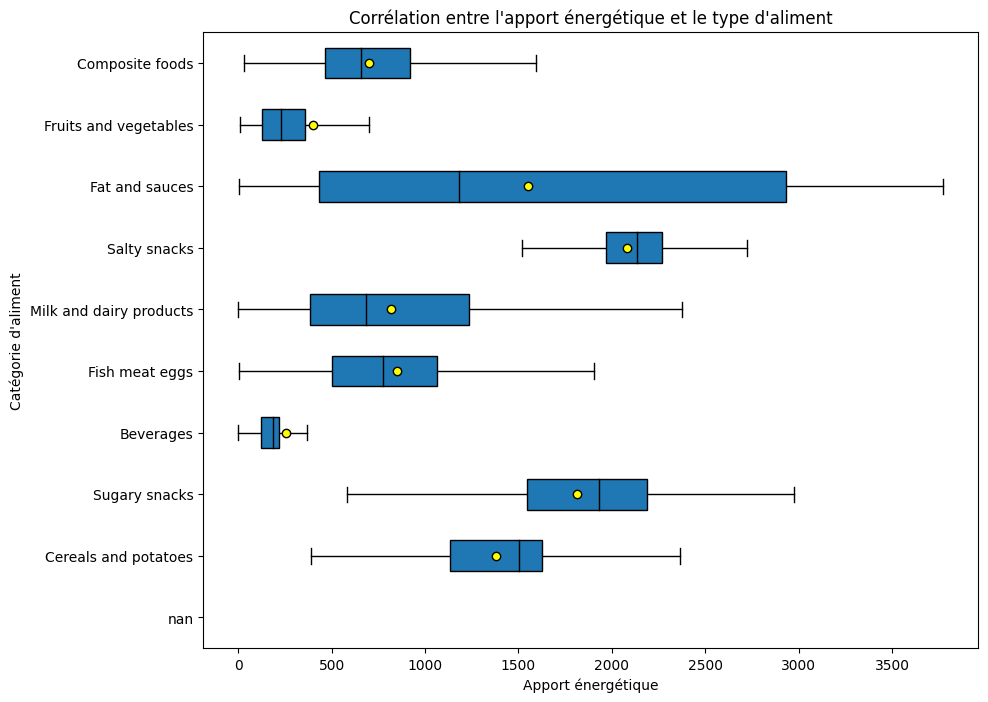

In [213]:
# Définition des variables
X = "cat_1" # qualitative
Y = "energy_100g" # quantitative

# Création de l'échantillon
sous_echantillon = nutrition_data[nutrition_data["energy_100g"] > 0]
modalites = sous_echantillon[X].unique()
# Variable à remplir par les modalités du sous-échantillon
groupes = []

for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques   
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'yellow'}

#Affichage graphique
fig=plt.figure(figsize=(10,8)) 

plt.boxplot(groupes, 
            labels=modalites, 
            showfliers=False, 
            medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title("Corrélation entre l'apport énergétique et le type d'aliment", fontsize=12)
plt.ylabel('Catégorie d\'aliment')
plt.xlabel('Apport énergétique')

plt.show()

On voit ici que l'apport énergétique est différent d'une catégorie à l'autre: 
* Les `Fats and sauces` et les snacks (sucrés comme salés) sont une grande source d'énergie
* Les `Fruits and vegetables` et les `Beverages` sont une faible source d'énergie

### ANOVA

**Substances nutritives vs niveaux de Nutri-Score.**

Cette fois-ci, nous allons passer en revue toutes les substances nutritives. Nous allons vérifier leur contribution au Nutri Score.

Un test de la variance (ANOVA) permettra de quantifier la relation entre les variables numériques (substances nutritives) et les catégories (niveaux de Nutri-Score).

**Hypothèse**

Deux hypothèses sont possibles :

* Hypothèse nulle H0 : 
    * il n'existe pas de contribution de substances nutritives au calcul du Nutri-Score
    * même relation entre les moyennes η1=η2=η3=η4=η5=η6
* Hypothèse alternative H1 : 
    * il existe une contribution d'une substance nutritive au calcul du Nutri-Score
    * les moyennes ne sont pas égales

A présent, testons nos hypothèses. 

**Evaluation du modèle.**

Le rapport de corrélation attendu sera compris compris entre 0 et 1.

* Si η2=0 , cela signifie que les moyennes par classes sont toutes égales. Il n’y a donc pas a priori de relation entre les variables choisies. 

* Au contraire, si η2=1 , cela signifie que les moyennes par classes sont très différentes, il existe donc a priori une relation entre nos variables.

Si c'est le cas, cela signifie que la variable `nutrition_grade_fr` et les substances nutritives sont fortement corrélées.

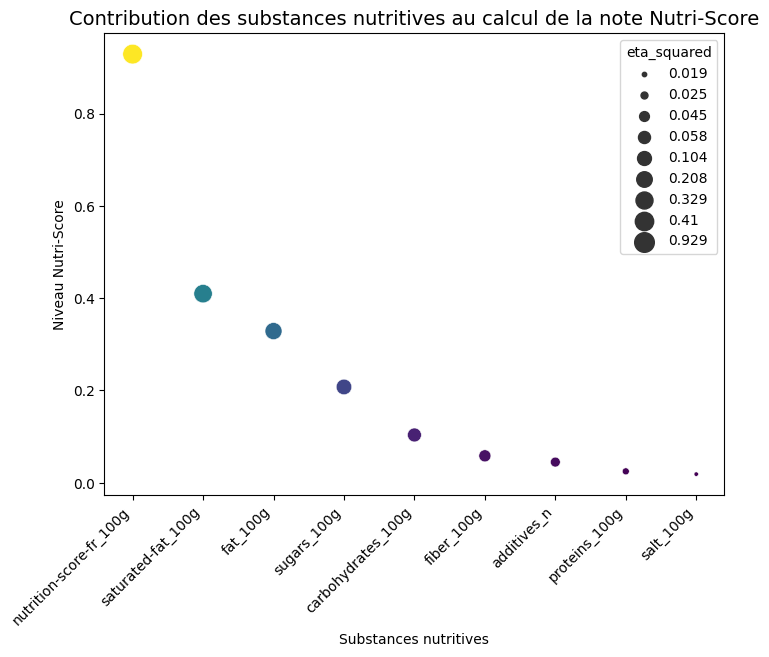

In [214]:
# Fonction pour calculer l'eta carré - le produit de la somme des carrés interclasse et celle totale
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

# Prise en compte des variables numériques & catégorielles
anova=pd.DataFrame(columns=['eta_squared'])
for col in nutri_cols:
    anova.loc[col] = eta_squared(nutrition_data['nutrition_grade_fr'],nutrition_data[col])

# Tri dans les variables
sorted_anova = anova.sort_values(by='eta_squared', ascending=False)

# Affichage graphique
plt.style.use('default')
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=sorted_anova.index,
    y=sorted_anova['eta_squared'],
    size=round(sorted_anova['eta_squared'],3),
    sizes=[10,25,50,75,100,125,150,175,200],
    marker="o",
    c=sorted_anova['eta_squared']
    #style=sorted_anova['eta_squared']
)
plt.xticks(rotation=45, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='medium')
plt.title("Contribution des substances nutritives au calcul de la note Nutri-Score", fontsize=14)
plt.ylabel("Niveau Nutri-Score")
plt.xlabel("Substances nutritives")
plt.show()

**Conclusions :**

On obtient plusieurs résultats. La significativité d'une relation étant fixée à 0.5%, voici les conclusions :


1. **η2 > 0,5%** => rejet de l'hypothèse H0 :
    * seulement une feature dépasse le seuil de 0,5% :
        * les valeurs nutritionnelles influencent fortement les niveaux de Nutri-Score
    * les graisses saturés semblent également avoir une influence (0,4%)
    * il existe donc a priori une relation entre ces variables
    
    
2. **η2 < 0,5%** => validation de l'hypothèse H0 :
    * toutes les autres features se positionnent en dessous de 0,3%
    * a priori pas de relation entre ces variables choisies
    * on peut constater que le sel n'a quasiment aucune contribution au calcul du Nutri-Score

### 5.3 Variables qualitatives. CHI-2.

Observons à présent la relation entre la catégorie d'aliment et le niveau de Nutri-Score. A nouveau, nous allons émettre deux hypothèses :


* Hypothèse nulle H0 : 
    * il n'existe aucune contribution de la catégorie d'aliment au Nutri-Score
* Hypothèse alternative H1 : 
    * une catégorie d'aliment contribue au Nutri-Score


Un test χ2 d'indépendance nous permettra de définir la relation entre les deux variables catégorielles.

Dans un premier temps nous allons mettre en place un tableau de contingence qui nous permettra de détecter facilement les cases qui sont source de non-indépendance. Ensuite, nous allons reprendre le tableau dans le test CHI-2 et visualiser les résultat à l'aide d'une heatmap :

In [215]:
Y = "nutrition_grade_fr"
X = "cat_2"

cont = nutrition_data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
# Calcul de la somme totale des valeurs de la matrice
k = cont.size - sum(cont.shape) + cont.ndim - 1
k

180

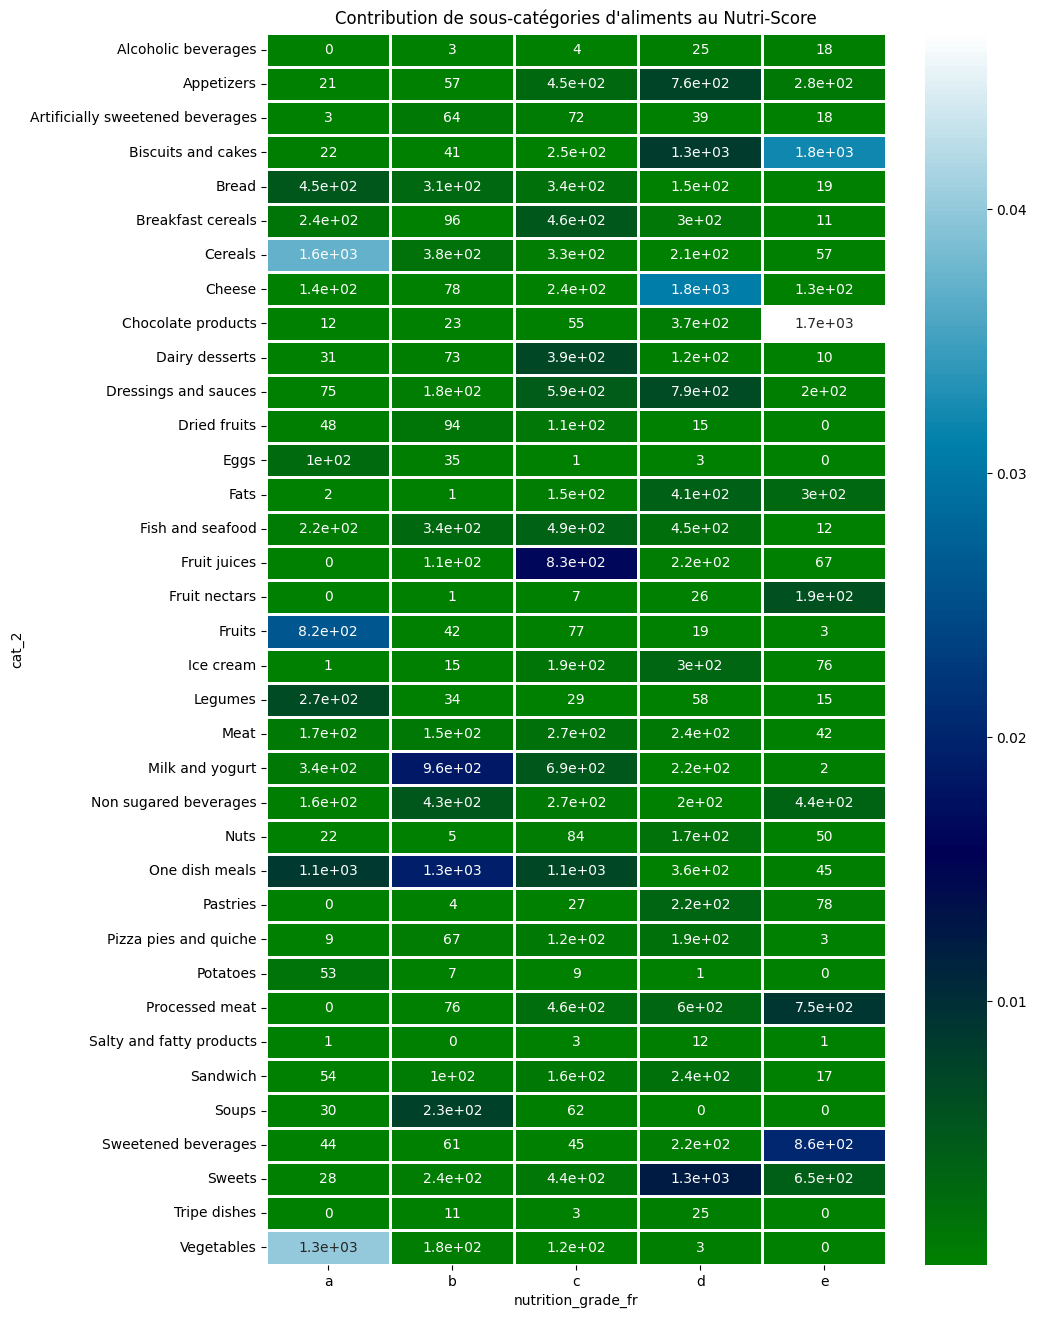

In [216]:
plt.figure(figsize=(10,16))
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(nutrition_data)
indep = tx.dot(ty) / n

c = cont.fillna(0).astype(int) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],
            annot=c.iloc[:-1,:-1],
            cmap='ocean',
            linewidth=1)
plt.title("Contribution de sous-catégories d'aliments au Nutri-Score")
plt.show()

**Conclusions**

Le test CHI-2 semble confirmer les relations détectées plus haut (cf le displot intitulé `Niveau de Nutri-Score par sous-catégorie d'aliment`). Néanmoins, quelques nouvelles informations ressortent, nous allons donc compléter les résultats précédents par de nouvelles sous-catégories d'aliments :


1. Nutri-Score A :
    * ajout de 'One dish meals'


2. Nutri-Score B :
    * ajout de 'One dish meals'


3. Nutri-Score C : RAS


2. Nutri-Score D :
    * ajout de 'Appetizers'


3. Nutri-Score E :
    * ajout de 'Biscuits and cakes'
    * ajout de 'Processed meat'

**Remarque**

Il est étonnant de voir des `Fruits` et `Legumes` classés en E ! Faisons une extraction pour vérifier de quels items il s'agit :

In [217]:
nutrition_data[(nutrition_data["cat_2"] == "Fruits") & (nutrition_data["nutrition_grade_fr"] == "e")]

code                                                url  \
307784  8411493001290  http://world-fr.openfoodfacts.org/produit/8411...   
311408  8480017006301  http://world-fr.openfoodfacts.org/produit/8480...   
301115  8000500034743  http://world-fr.openfoodfacts.org/produit/8000...   

       last_modified_datetime                      product_name  \
307784   2016-12-19T15:11:07Z    Frutas de Aragón con chocolate   
311408   2016-12-21T21:19:37Z  Bombones rellenos Cereza & Licor   
301115   2017-02-21T12:22:46Z                Bombones Mon Chéri   

                                                   brands  additives_n  \
307784                                               Caro          4.0   
311408  Dia,//Propiedad de://,Dia - Distribuidora Inte...          2.0   
301115  Mon Chéri,Ferrero,//Propiedad de://,Ferrero S....          2.0   

                                                additives nutrition_grade_fr  \
307784   [ frutas-confitadas-en-proporcion-variable ->...                  e   
311408   [ azucar -> es:azucar  ]  [ pasta-de-cacao ->...                  e   
301115   [ chocolate-negro-49 -> es:chocolate-negro-49...                  e   

        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
307784      1668.48     13.09                8.09               64.52   
311408      1830.00     20.00               13.00               60.00   
301115      1902.00     20.30               13.20               52.80   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
307784        51.05        4.15           3.18      4.300     1.692913   
311408        47.00        0.00           4.10      1.800     0.708661   
301115        48.30        0.00           3.00      0.005     0.001969   

        nutrition-score-fr_100g                  cat_1   cat_2  
307784                     21.0  Fruits and vegetables  Fruits  
311408                     25.0  Fruits and vegetables  Fruits  
301115                     19.0  Fruits and vegetables  Fruits

Il s'agit de fruits confits ou bonbons de chocolat fourrés cerise et liqueur.

In [218]:
nutrition_data[(nutrition_data["cat_2"] == "Legumes") & (nutrition_data["nutrition_grade_fr"] == "e")]

code                                                url  \
319113  9300633919061  http://world-fr.openfoodfacts.org/produit/9300...   
320209  9344081000506  http://world-fr.openfoodfacts.org/produit/9344...   
311290  8480000670151  http://world-fr.openfoodfacts.org/produit/8480...   
270383  5000354903540  http://world-fr.openfoodfacts.org/produit/5000...   
265817  4316268413367  http://world-fr.openfoodfacts.org/produit/4316...   
265818  4316268413374  http://world-fr.openfoodfacts.org/produit/4316...   
197544  3175681845060  http://world-fr.openfoodfacts.org/produit/3175...   
261952  4039057400262  http://world-fr.openfoodfacts.org/produit/4039...   
183137            231  http://world-fr.openfoodfacts.org/produit/231/...   
116342     5070026371  http://world-fr.openfoodfacts.org/produit/0507...   
274998  5060391620404  http://world-fr.openfoodfacts.org/produit/5060...   
266365  4388844021389  http://world-fr.openfoodfacts.org/produit/4388...   
29113     34000400126  http://world-fr.openfoodfacts.org/produit/0034...   
34614     37600105064  http://world-fr.openfoodfacts.org/produit/0037...   
226327  3336971502029  http://world-fr.openfoodfacts.org/produit/3336...   

       last_modified_datetime  \
319113   2015-02-28T05:08:32Z   
320209   2015-03-02T01:49:31Z   
311290   2015-09-19T15:19:25Z   
270383   2015-11-24T11:15:19Z   
265817   2015-12-05T12:26:56Z   
265818   2015-12-11T11:08:59Z   
197544   2015-12-12T21:44:07Z   
261952   2016-03-22T14:57:20Z   
183137   2016-04-28T02:59:29Z   
116342   2016-09-18T18:06:11Z   
274998   2016-09-30T12:21:25Z   
266365   2017-01-09T16:33:58Z   
29113    2017-03-04T14:19:29Z   
34614    2017-03-09T13:25:48Z   
226327   2017-03-27T10:46:33Z   

                                             product_name  \
319113                              Crunchy Peanut Butter   
320209  Ridiculously Delicious Peanut Butter Super Smooth   
311290                                 Crema de cacahuete   
270383                               Peanut Butter Spread   
265817                               Erdnuss Creme Creamy   
265818                              Erdnuss Creme Crunchy   
197544                                  Lécithine de soja   
261952                                      Erdnuss Creme   
183137             Bramwells American Style Peanut Butter   
116342                   Паста Арахисовая Мягкая (Creamy)   
274998               Sun-pat crunchy beurre de cacahuètes   
266365                               Erdnussbutter creamy   
29113                        Beurre De Cacahuètes Crémeux   
34614                        Natural creamy peanut butter   
226327  Pâte à tartiner onctueuse Curly cacahuète - Vi...   

                                                   brands  additives_n  \
319113                           Woolworths Select,Select          1.0   
320209  The Forage Company,The Ridiculously Delicious ...          0.0   
311290                             Hacendado,Antiu Xixona          0.0   
270383                                            Sun-Pat          2.0   
265817                                     American Style          0.0   
265818                                     American Style          0.0   
197544                                             Gerblé          1.0   
261952                                         BioGourmet          0.0   
183137                                     Bramwells,Aldi          0.0   
116342                                             Hy-Top          0.0   
274998                                            Sun-pat          1.0   
266365                                           REWE Bio          0.0   
29113                                             Reese s          0.0   
34614                          Skippy,  Hormel Foods  Llc          0.0   
226327                                         Curly,Vico          0.0   

                                                additives nutrition_grade_fr  \
319113   [ freshly-roasted-pe

Sous le terme de `legumes` se cachent les pâtes à tartiner (beurre de cacahuètes)...

### 6.4 ACP

Dans ce chapitre nous allons étudier les corrélations à travers la variance. L'objectif est de simplifier les observations tout en conservant un maximum d’informations.

L'ACP va se dérouler en plusieurs étapes :

1. Calcul des **pourcentage d’inertie totale** associé à chaque composante principale 
    * par moyen du diagramme des éboulis des valeurs propres


2. **Projection des individus sur les plans factoriels** en 2D
    * mise en place les **cercles de corrélations**
    * interprétation des résultats


3. Estimation de corrélations entre les variables analysées
    * en recourant à une **matrice de corrélation**

In [219]:
from sklearn import decomposition
from sklearn import preprocessing

In [220]:
# selection des colonnes à prendre en compte dans l'ACP
cols = [

    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
    
    'additives_n',
    'nutrition-score-fr_100g'
]

# Variables catégorielles
    #'cat_1',
    #'additives',
    #'nutrition_grade_fr'

### 6.4.1 Eboulis des valeurs propres

In [221]:
# On ne conserve que les individus ayant toutes les valeurs
acp_df = nutrition_data.dropna(subset=cols)
X = acp_df[cols].values
names = acp_df["code"].to_numpy()
features = cols

# On transforme nos variables en variables centrées réduites
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

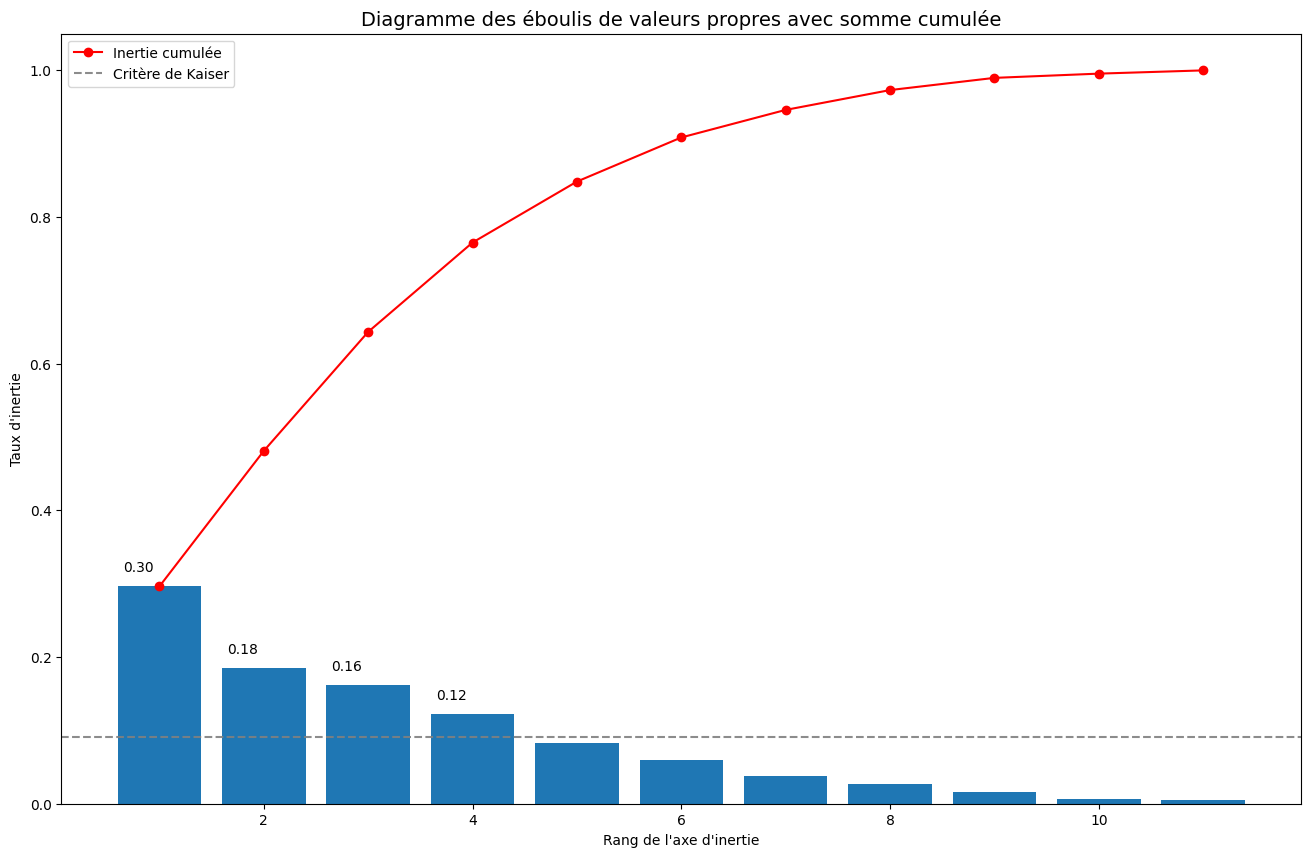

In [222]:
# On réalise une PCA
pca = decomposition.PCA(n_components=len(features), random_state=0)
pca.fit(X_scaled)

# On récupère le ratio de l'inertie de chaque axe d'inertie
evrs = pca.explained_variance_ratio_

# On crée et on affiche le diagramme des éboulis de valeurs propres
fig, ax = plt.subplots(figsize=(16,10))

ax.set_title("Diagramme des éboulis de valeurs propres avec somme cumulée", fontsize=14)
ax.set_xlabel("Rang de l'axe d'inertie")
ax.set_ylabel("Taux d'inertie")

ax.bar(np.arange(len(evrs)) + 1, evrs)
l1 = ax.plot(np.arange(len(evrs)) + 1, evrs.cumsum(), c="red", marker='o', label="Inertie cumulée")[0]

# Ligne représentant le critère de Kaiser
k = 1 / len(features)
l2 = ax.axhline(k, color="grey", ls="--", alpha=0.9, label="Critère de Kaiser")

# On ajoute le taux d'inertie
for i, evr in enumerate(evrs):
    if evr > k:
        ax.text(i + 0.65, evr + .02, f"{evr:0.2f}")
        
plt.legend(handles=[l1, l2], loc='upper left')
plt.show()

Comment choisir nos axes d'inertie ? Grâce aux plusieurs critères :

1. **Les pourcentages d’inertie**
* Fournissent l'information sur la « structure » de nos données.
* Plus les données auront une structure, mieux on pourra les résumer en ne gardant que les premiers axes principaux d’inertie.

2. **Un critère “absolu” de Kaiser**
* ne retenir que les axes dont les valeurs propres sont supérieures à 1
* se référer à la ligne grise

3. **Un critère “relatif” des éboulis**
* retenir les valeurs propres qui “dominent” les autres
* se référer à la courbe rouge qui représente la somme cumulée des inerties

L'ACP a pour but d'expliquer la plus grande proportion possible de la variance par le plus petit nombre de composantes principales.

Les 4 premières composantes renvoient au plus grand pourcentage de la variation totale des données. Les composantes suivantes ont un taux d'inertie trop faible (en dessous du critère de Kaiser).

### 6.4.2 Les plans factoriels & cercles de corrélations.

Continuons notre analyse en observant nos variables (axes d'inertie F1, F2, F3, F4) projetées sur le 1er plan factoriel (F2, F1).

In [223]:
def pca_plot_var(pcs, x_idx, y_idx, circle=False):
    # On affiche le cercle de corrélation de chaque plan factoriel
    fig, ax = plt.subplots(figsize=(14, 14))

    for j, (x, y) in enumerate(zip(pcs[x_idx, :], pcs[y_idx, :])):
        ax.plot([0, x], [0, y], color="violet", alpha=0.9)
        plt.text(x, y, cols[j], fontsize=14)

    if circle:
        ax.add_patch(plt.Circle((0, 0), 1, color="grey", alpha=0.7, fill=False))
    
    ax.axhline(0, color="grey", ls="--", alpha=0.5)
    ax.axvline(0, color="grey", ls="--", alpha=0.5)

    ax.set_title(f"Le plan factoriel (F{x_idx + 1}, F{y_idx + 1})")
    ax.set_xlabel(f"F{x_idx + 1} ({evrs[x_idx] * 100: 0.1f}%)")
    ax.set_ylabel(f"F{y_idx + 1} ({evrs[y_idx] * 100: 0.1f}%)")
    
    ax.set_aspect("equal")

    plt.show()

pcs = pca.components_
X_projected = pca.transform(X_scaled)

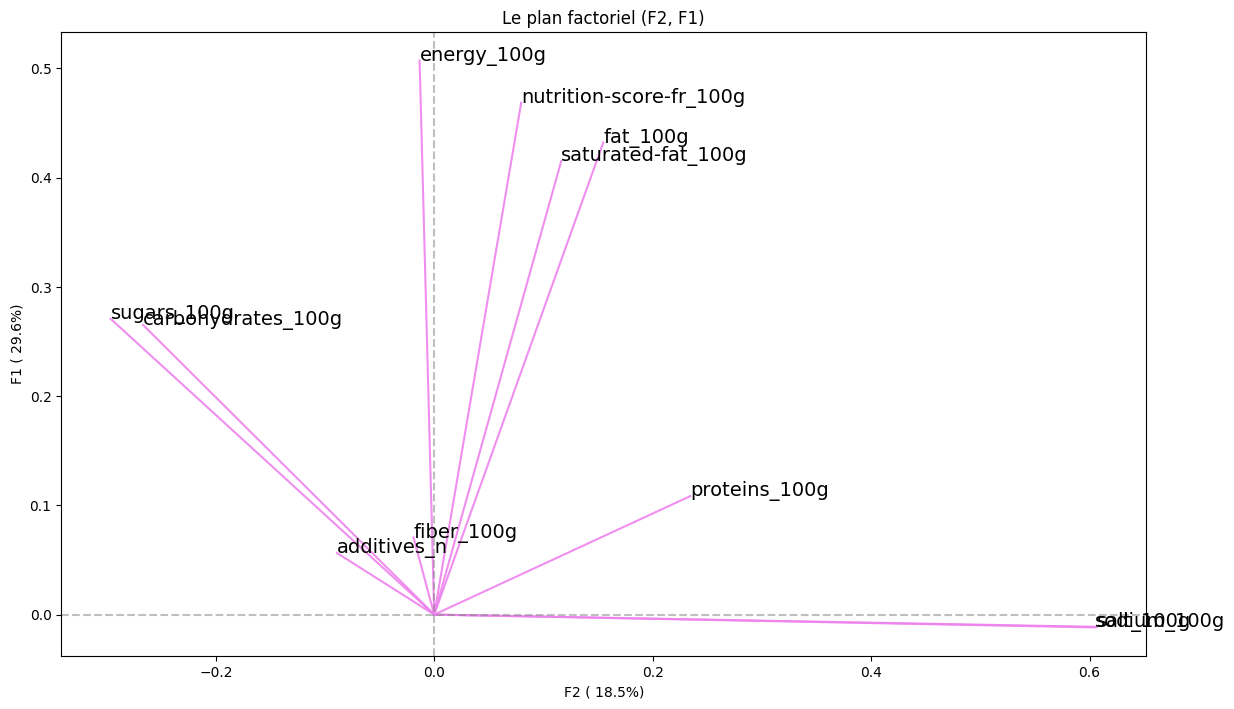

In [224]:
pca_plot_var(pcs, 1, 0)

Comment interpréter le résultat ?

La **corrélation de chaque point sur un axe** exprime la qualité de représentation du point sur l’axe. 
* Elle prend des valeurs entre 0 (pas corrélé du tout) et 1 (fortement corrélé). 
* Si cette valeur est proche de 1, alors le point est bien représenté sur l’axe.

Les points situés près du centre sont donc généralement mal représentés par le plan factoriel. Leur interprétation ne peut donc pas être effectuée avec confiance.

**Conclusions**

1. **Inertie totale du premier plan factoriel :**
    * 18.5 % de l’inertie totale sont associés à F1, et 29.6 % à F2. 
    * Au total, le premier plan factoriel représente 48.1% de l’inertie totale. 


2. **Composante principale F2 :**
    * Deux variables corrélées positivement :
        * salt_100g
        * sodium_100g
    * Deux variables corrélées négativement : 
        * sugars_100g
        * carbohydrates_100g

    
3. **Composante principale F1 :**
    * Plusieurs variables corrélées positivement :
        * energy_100g
        * fat_100g
        * saturated-fat_100g
        * nutrition-score-fr_100g
        
    * Aucune variable corrélée négativement.


4. **Interprétation du cercle des corrélations :**

Nous avons identifié trois tendances permettant de définir de nouvelles catégories d'analyse :
   * la composante principale F2 : peut correspondre à la salinité (le sel & le sodium)
   * la composante principale F1 : peut correspondre à l'apport énergétique (les variables corrélées indiquant le taux de graisses, graisses saturées et d'énergie)
   * entre la F2 et F1 pourrait se dessiner la glucométrie (les variables indiquant la teneur en sucres & glucides dans les aliments).

Faisons pivoter les axes des facteurs autour du point d’origine pour mieux redistribuer la variance que l’on cherche à expliquer. Voyons la projection des variables initiales sur le plan factoriel (F4, F3) :

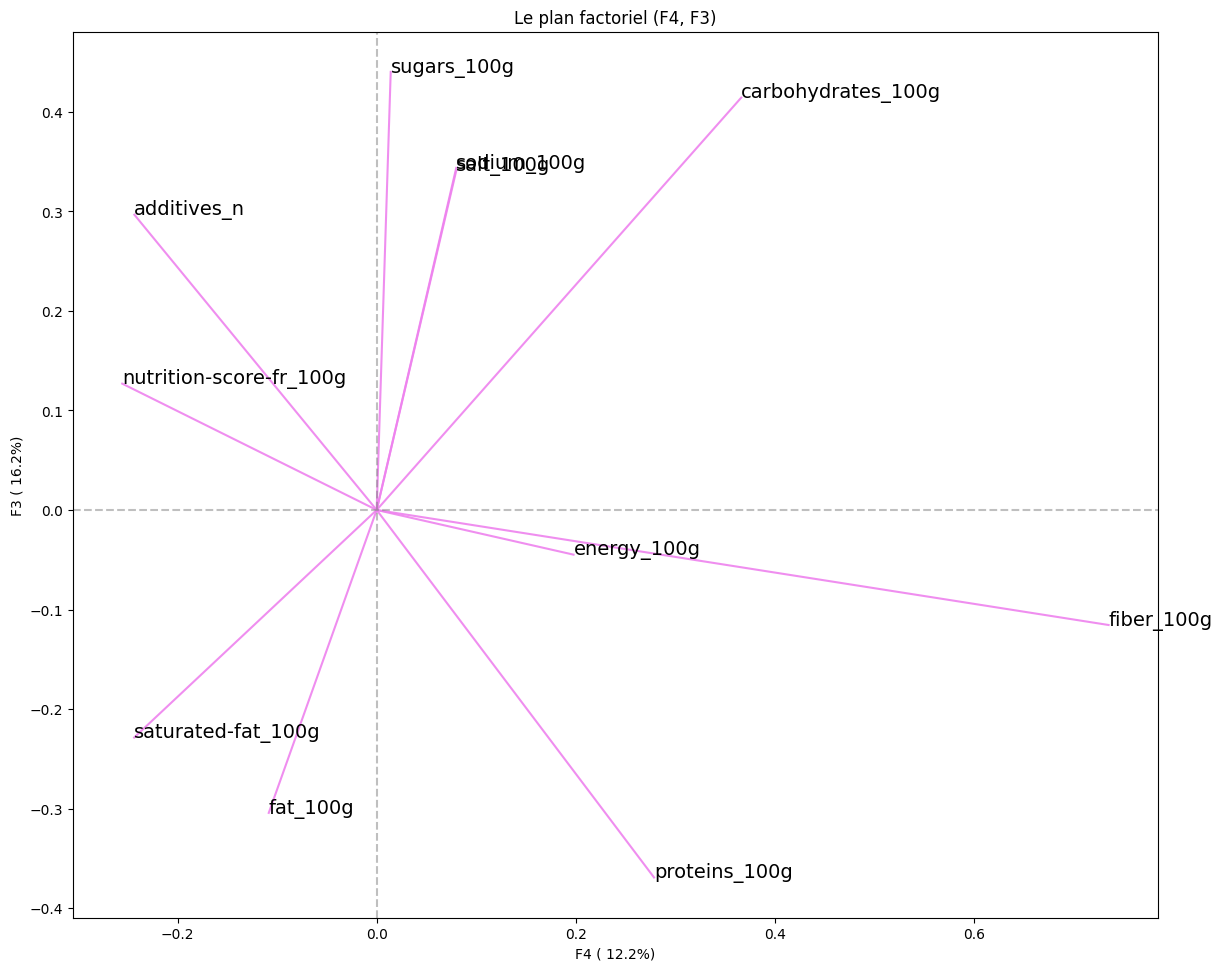

In [225]:
pca_plot_var(pcs, 3, 2)

**Conclusions**

1. **Inertie totale du second plan factoriel :**
    * 12.2 % de l’inertie totale sont associés à F4, et 16,2 % à F3. 
    * Au total, le second plan factoriel représente 28.4% de l’inertie totale. 


2. **Composante principale F4 :**
    * Des variables corrélées positivement :
        * fiber_100g
        * energy_100g
    * Aucune variable corrélée négativement.
    
    
3. **Composante principale F3 :**
    * Des variables corrélées positivement :
        * sugars_100g
        * sodium & salt
    * Des variables corrélées négativement : 
        * fat_100g


4. **Interprétation du cercle des corrélations :**

    * F3 augmente avec les sucres et le sel et diminue avec les graisses. F3 semble représenter les produits salés sans graisses.

    * F4 augmente avec les fibres et l'énergie et diminue un peu avec les valeurs de Nutri-Score. F4 pourrait représenter les produits se caractérisant par une teneur élevée en fibres.

### 6.4.4 Matrice des corrélations

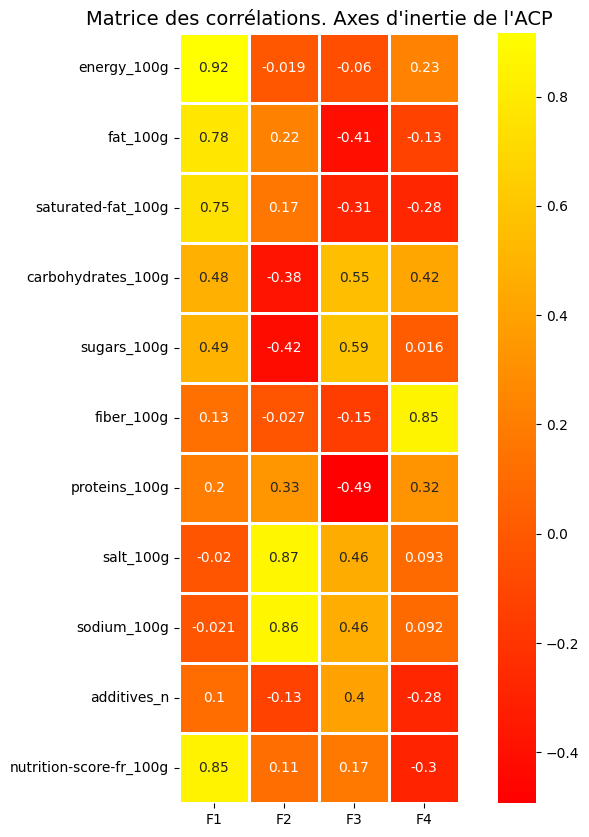

In [226]:
df_matrix = acp_df[cols].copy()
for i in range(4):
    df_matrix[f"F{i + 1}"] = X_projected[:, i]

corrMatrix = df_matrix.corr()

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrMatrix.iloc[:-4, -4:], 
            cmap="autumn",
            annot=True, ax=ax,
            square=True,
            cbar_kws={'fraction' : 0.1}, # shrink colour bar
            linewidth=1) # space between cells)

ax.set_title("Matrice des corrélations. Axes d'inertie de l'ACP", fontsize=14)

plt.show()

La matrice des corrélations confirme nos idées de regroupement.
Les nouvelles variables F1, F2, F3 et F4 sont des combinaisons linéaires des variables initiales. 


Essayons de projeter les individus afin de confirmer nos hypothèses. La projection s'effectuera sur un groupe de 100 produits projetés sur les 3 premiers axes d'inerties F1, F2 et F3 :

In [227]:
import plotly.express as px

In [228]:
X_projected = pca.transform(X_scaled)

# On crée un DataFrame avec nos individus, en leur ajoutant les variables F1, F2 et F3
df_3d = pd.DataFrame(X_projected[:, :3], columns=[f"F{i + 1}" for i in range(3)])
df_3d["nutrition_grade_fr"] = nutrition_data["nutrition_grade_fr"].values
df_3d["cat_1"] = nutrition_data["cat_1"].values
df_3d = df_3d.dropna()

# On prend 100 produits au hasard pour chaque Nutri-Score (trop lourd d'afficher tous les individus)
df_3d = df_3d.groupby(
    ["nutrition_grade_fr", "cat_1"],
    group_keys=False
).apply(lambda x: x.sample(min(len(x), 100)))

# Affichage en 3D
fig = px.scatter_3d(
    df_3d,
    x="F1",
    y="F2",
    z="F3",
    color="cat_1",
    title=f"Représentation d'un échantillon des individus projetés sur (F1, F2, F3)"
)
fig.show()

La figure 3D permet d'identifier des groupes homogènes et à l’inverse des observations atypiques :

Groupes de produits homogènes : 
* Les poissons, viandes et oeufs
* Les boissons
* Les snacks salés
* Les snacks sucrés
* Les produits laitiers

Des observations atypiques :
* Composite foods

Quels produits sont bien représentés par les composantes principales ?
* F1 : les `Fat and sauces` et les `Snacks sucrés` 
    * correspondent à l'apport énergétique défini par les variables de départ (telles que le taux de matières grasses et d'énergie)
* F2 : les `Composite foods`
    * la variable synthétique F2 représente la salinité, on peut donc conclure que les plats composés tout faits contiennent un niveau élevé de sel 

Les nouvelles variables synthétiques créées grâce aux axes d'inertie semblent très pertinents dans l'analyse du jeu de données.